In [1]:
%reload_ext mocodo

Mocodo 4.0.10 loaded.


In [2]:
from IPython import display
from pathlib import Path
import os
if Path.cwd().name != "mocodo_notebook":
    Path("mocodo_notebook").mkdir(parents=True, exist_ok=True)
    os.chdir("mocodo_notebook")

![](https://cdn.rawgit.com/laowantong/mocodo/master/logos/banner.svg)

# Introduction

Mocodo est un logiciel d'aide à l'enseignement et à l'apprentissage des [bases de données relationnelles](https://fr.wikipedia.org/wiki/Base_de_données_relationnelle).

- En entrée, il prend un [MCD](https://fr.wikipedia.org/wiki/Modèle_entité-association) (modèle conceptuel de données) décrit dans un langage dédié minimaliste.
- En sortie, il produit un diagramme entité-association et, à la demande, un [MLD](https://fr.wikipedia.org/wiki/Merise_(informatique)#MLD_:_modèle_logique_des_données) (schéma relationnel, sous forme graphique ou textuelle), un [DDL](https://fr.wikipedia.org/wiki/Langage_de_définition_de_données) (requêtes SQL de création de la base), un [diagramme de classes UML](https://fr.wikipedia.org/wiki/Diagramme_de_classes), etc.
- En bonus, il est capable de réarranger automatiquement votre MCD de façon esthétique, et de lui appliquer des opérations de réécriture qui vont du mondain (typographie) à l'académique (décomposition d'associations), en passant par le merveilleux (inférence de types, génération d'exercices et d'exemples).

Vous pouvez utiliser Mocodo :

- à distance, sans rien installer, avec [Mocodo _online_](https://www.mocodo.net) ;
- en local, comme n'importe quel programme Python ;
- dans un document [Jupyter Notebook](https://jupyter.org) (à l'instar de cette documentation).

## Tracé du modèle conceptuel

Ci-dessous, un exemple d'utilisation sous Jupyter Notebook. L'appel du programme est en première ligne ; le texte-source proprement dit, lignes suivantes. En sortie, le diagramme conceptuel, égayé au passage par l'option `--colors` :

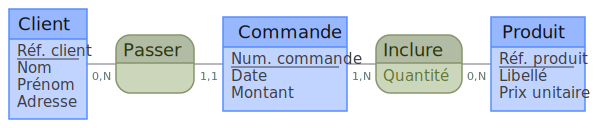

In [11]:
%%mocodo --colors ocean
Client: Réf. client [VARCHAR(8)], Nom [VARCHAR(255)], Prénom [VARCHAR(255)], Adresse [VARCHAR(255)]
Passer, 0N Client, 11 Commande
Commande: Num. commande [VARCHAR(8)], Date [DATE], Montant [DECIMAL(10,2)]
Inclure, 1N Commande, 0N Produit: Quantité [INTEGER]
Produit: Réf. produit [VARCHAR(8)], Libellé [VARCHAR(50)], Prix unitaire [DECIMAL(10,2)]

## Opérations de conversion

L'appel précédent a automatiquement enregistré le texte-source sous le nom de `sandbox.mcd`. Renommons-le `ccp.mcd` pour y avoir accès tout au long de ce document.

In [12]:
Path("sandbox.mcd").rename("ccp.mcd");

On peut le récupérer avec `--input` pour lui appliquer diverses opérations. Ainsi, l'appel suivant génère et affiche son MLD, son diagramme relationnel et son DDL :

In [13]:
%mocodo --input ccp --transform mld diagram ddl --colors mondrian


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_mld.md
</tt>
</span>
</div>


- **Client** (<ins>Réf. client</ins>, Nom, Prénom, Adresse)
- **Commande** (<ins>Num. commande</ins>, Date, Montant, _#Réf. client_)
- **Inclure** (<ins>_#Num. commande_</ins>, <ins>_#Réf. produit_</ins>, Quantité)
- **Produit** (<ins>Réf. produit</ins>, Libellé, Prix unitaire)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_mld.svg
</tt>
</span>
</div>



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE Client (
  PRIMARY KEY (Ref_client),
  Ref_client VARCHAR(8) NOT NULL,
  Nom        VARCHAR(255),
  Prenom     VARCHAR(255),
  Adresse    VARCHAR(255)
);

CREATE TABLE Commande (
  PRIMARY KEY (Num_commande),
  Num_commande VARCHAR(8) NOT NULL,
  Date         DATE,
  Montant      DECIMAL(10,2),
  Ref_client   VARCHAR(8) NOT NULL
);

CREATE TABLE Inclure (
  PRIMARY KEY (Num_commande, Ref_produit),
  Num_commande VARCHAR(8) NOT NULL,
  Ref_produit  VARCHAR(8) NOT NULL,
  Quantite     INTEGER
);

CREATE TABLE Produit (
  PRIMARY KEY (Ref_produit),
  Ref_produit   VARCHAR(8) NOT NULL,
  Libelle       VARCHAR(50),
  Prix_unitaire DECIMAL(10,2)
);

ALTER TABLE Commande ADD FOREIGN KEY (Ref_client) REFERENCES Client (Ref_client);

ALTER TABLE Inclure ADD FOREIGN KEY (Ref_produit) REFERENCES Produit (Ref_produit);
ALTER TABLE Inclure ADD FOREIGN KEY (Num_commande) REFERENCES Commande (Num_commande);

```

Dans la suite, pour épargner la frappe, les options `--input` et `--transform` seront respectivement abrégées en `-i` et `-t`.

Les opérations de conversion ne se limitent pas forcément au schéma relationnel. En voici une qui extrait un dictionnaire des données, par défaut sous la forme d'un tableau Markdown à trois colonnes :

In [14]:
%mocodo -i ccp -t data_dict


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_data_dict_3.md
</tt>
</span>
</div>


| Entité ou association | Libellé de l'attribut | Type          |
|:----------------------|:----------------------|:--------------|
| Client                | Adresse               | VARCHAR(255)  |
| "                     | Nom                   | VARCHAR(255)  |
| "                     | Prénom                | VARCHAR(255)  |
| "                     | Réf. client           | VARCHAR(8)    |
| Commande              | Date                  | DATE          |
| "                     | Montant               | DECIMAL(10,2) |
| "                     | Num. commande         | VARCHAR(8)    |
| Inclure               | Quantité              | INTEGER       |
| Produit               | Libellé               | VARCHAR(50)   |
| "                     | Prix unitaire         | DECIMAL(10,2) |
| "                     | Réf. produit          | VARCHAR(8)    |


Une autre qui transcrit le MCD dans la notation _crow's foot_ (`crow`) pour [Mermaid](http://mermaid.js.org) (`mmd`) :

In [15]:
%mocodo -i ccp -t crow:mmd


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_erd_crow.mmd
</tt>
</span>
</div>


```mmd
erDiagram
  Client {
    VARCHAR(8) Ref_client PK
    VARCHAR(255) Nom
    VARCHAR(255) Prenom
    VARCHAR(255) Adresse
  }
  Commande {
    VARCHAR(8) Num_commande PK
    DATE Date
    DECIMAL(10-2) Montant
  }
  Inclure {
    INTEGER Quantite PK
  }
  Produit {
    VARCHAR(8) Ref_produit PK
    VARCHAR(50) Libelle
    DECIMAL(10-2) Prix_unitaire
  }
  Client ||--o{ Commande: Passer
  Inclure }|..|| Commande: DF
  Inclure }o..|| Produit: DF

```

Le rendu des diagrammes décrits dans des langages-tiers (comme Mermaid) n'est pas directement pris en charge, mais peut être délégué (`--defer`) de façon transparente au service web approprié. Dans ce cas, c'est la sortie graphique qui est affichée :

In [16]:
%mocodo -i ccp -t crow:mmd --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_erd_crow.svg
</tt>
</span>
</div>


## Opérations de réécriture

Une **réécriture** transforme un MCD Mocodo en un autre MCD Mocodo (au contraire d'une **conversion**, qui produit un animal d'une espèce différente).

Heureusement, l'utilisateur n'a pas à réfléchir si la transformation qu'il souhaite appliquer est une réécriture ou une conversion : dans les deux cas, il invoque `-t` (c'est-à-dire `--transform`), et Mocodo se débrouille.

En guise de premier exemple de réécriture, mettons les noms des entités et associations (`boxes`) en majuscules, et les libellés (`labels`) en ASCII et _snake case_ :

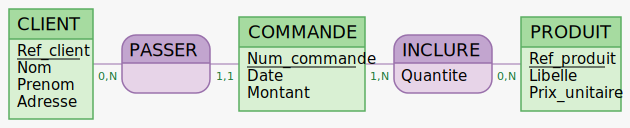


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp.mcd
</tt>
</span>
</div>


%%mocodo --colors brewer+3
CLIENT: Ref_client [VARCHAR(8)], Nom [VARCHAR(255)], Prenom [VARCHAR(255)], Adresse [VARCHAR(255)]
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num_commande [VARCHAR(8)], Date [DATE], Montant [DECIMAL(10,2)]
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantite [INTEGER]
PRODUIT: Ref_produit [VARCHAR(8)], Libelle [VARCHAR(50)], Prix_unitaire [DECIMAL(10,2)]


In [17]:
%mocodo -i ccp -t upper:boxes ascii:labels snake:labels --colors brewer+3

Remarquez que l'exécution d'une réécriture affiche, au-dessous du diagramme, le code-source résultant. Celui-ci est précédé de la commande magique originale, _privée de l'option `-i` et de toute opération de réécriture_. Ces dispositions permettent de continuer à travailler directement dessus si on le copie-colle dans une autre cellule.

Plusieurs opérations de réécriture de nature sémantique sont également offertes. Par exemple, on peut décomposer un MCD quelconque en un MCD équivalent, mais n'employant que des dépendances fonctionnelles et des entités faibles :

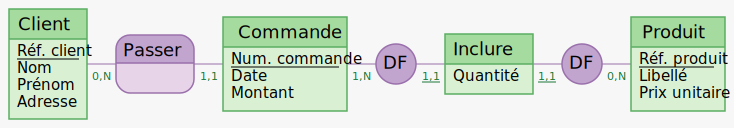


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp.mcd
</tt>
</span>
</div>


%%mocodo --seed=3 --colors brewer+3
Client: Réf. client [VARCHAR(8)], Nom [VARCHAR(255)], Prénom [VARCHAR(255)], Adresse [VARCHAR(255)]
Passer, 0N Client, 11 Commande
Commande: Num. commande [VARCHAR(8)], Date [DATE], Montant [DECIMAL(10,2)]
DF, _11 Inclure, 1N Commande
Inclure: _Quantité [INTEGER]
DF, _11 Inclure, 0N Produit
Produit: Réf. produit [VARCHAR(8)], Libellé [VARCHAR(50)], Prix unitaire [DECIMAL(10,2)]


In [18]:
%mocodo -i ccp -t explode:weak,arity=2 arrange:wide --seed=3 --colors brewer+3

Notez l'argument `arrange:wide`. Il a procédé à une réorganisation aléatoire des boîtes, ce que l'insertion de deux nouvelles associations de dépendance fonctionnelles avait rendu nécessaire. Quant à l'option `--seed=3`, elle garantit que le résultat sera le même à chaque exécution.

Après cet aperçu de quelques-unes des fonctionnalités de Mocodo, entrons dans les détails.

# Installation et lancement du programme

Comme nous l'avons dit, vous pouvez utiliser Mocodo sans rien installer. Il vous suffit d'aller sur [mocodo.net](https://www.mocodo.net) et de commencer à taper votre MCD. Appuyez à tout moment sur le ventilateur pour rafraîchir les diagrammes conceptuel et relationnel. Quand le résultat vous convient, appuyez sur le bouton de téléchargement pour récupérer une archive ZIP contenant tous les fichiers d'entrée et de sortie spécifiés.

Mocodo _online_ est conçu pour une utilisation occasionnelle et/ou interactive, et son interface vise avant tout à la simplicité. Vous n'avez donc accès qu'aux options essentielles du programme. Si vous en voulez davantage, tant en termes de paramétrage que de calcul ou de fonctionnalités, nous vous conseillons d'installer Mocodo sur votre machine.

## Installation minimale

Mocodo est un programme écrit en [Python 3](https://www.python.org). Si vous êtes sous macOS ou Linux, il est déjà installé. Dans le cas contraire, vous devrez peut-être [le faire](https://www.python.org/downloads/).

Une fois Python présent sur votre machine, tapez sous un terminal:

        python -m pip install mocodo

Puis testez-le :

        mocodo

Invoqué sous cette forme, Mocodo récupère le texte d'entrée du MCD dans le répertoire courant sous le nom de `sandbox.mcd`. Si ce fichier n'existe pas, il y sera automatiquement créé avec un MCD d'exemple. Par la suite, vous n'aurez qu'à le garder ouvert sous un éditeur de texte, afin de le modifier à votre fantaisie avant de relancer la commande.

Si votre système se plaint que cette commande n'existe pas, localisez le fichier `mocodo` et ajoutez à votre `PATH` le chemin du répertoire contenant:
- [sous Linux ou macOS](http://www.commentcamarche.net/faq/3585-bash-la-variable-d-environnement-path#v-ajouter-un-repertoire-a-la-variable-path) ;
- [sous Windows](http://sametmax.com/ajouter-un-chemin-a-la-variable-denvironnement-path-sous-windows/).

## Installation complète (recommandé)

- Installez la [distribution Anaconda](https://www.anaconda.com/download), qui contient Python 3, Jupyter Notebook et bien plus encore.
- La ligne donnée précédemment installe en fait, en plus de Mocodo, sa « commande magique » pour [Jupyter Notebook](https://jupyter.org). Nous l'avons déjà invoquée plusieurs fois dans ce document :

        python -m pip install mocodo

- Mocodo fonctionne parfaitement sans dépendances. Cependant, si vous souhaitez générer des figures en PDF ou en PNG :

        python -m pip install cairosvg

- Si vous souhaitez pouvoir copier directement le résultat d'une réécriture dans le presse-papier :

        python -m pip pyperclip

Pour mettre la « commande magique » `mocodo` à disposition d'un _notebook_ donné, évaluez dans celui-ci la cellule suivante:

    %reload_ext mocodo

Techniquement, `%load_ext mocodo` suffit, mais cette forme vous épargnera un message d'erreur si vous réévaluez ultérieurement la cellule.

Pour tester la commande :

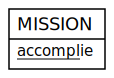

In [19]:
%%mocodo
MISSION: accomplie

Pour charger automatiquement `mocodo` à chaque ouverture d'un notebook (ce qui dispense d'évaluer `%load_ext mocodo`) :

- exécutez sous un terminal :

			ipython profile create
	
- éditez le fichier créé (p. ex.: `~/.ipython/profile_default/ipython_config.py`) en remplaçant la ligne suivante :

			# c.TerminalIPythonApp.extensions = []

  par celle-ci :

			c.InteractiveShellApp.extensions = ["mocodo"]

# Syntaxe de description d'un MCD

## Notions élémentaires

### Entités, associations, attributs, identifiants, cardinalités

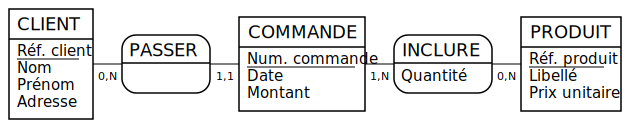

In [20]:
%%mocodo
CLIENT: Réf. client, Nom, Prénom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num. commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité
PRODUIT: Réf. produit, Libellé, Prix unitaire

Passons en revue les principes de la syntaxe. Ils ne devraient pas poser trop de problèmes.

**La première ligne** ne fait pas partie de la définition du MCD. Sous Jupyter Notebook, elle dénote l'appel à une « commande magique », qui lance Mocodo sur le reste de la cellule. En dehors d'un notebook, vous n'en avez pas besoin, et toute ligne commençant par un pourcentage (`%`) sera considérée comme un commentaire.

**Une entité** est définie par :

$$
\overbrace{\texttt{COMMANDE}}^{\text{son nom}}
\quad
\overbrace{\texttt{:}}^{\text{deux-points}}
\quad
\overbrace{\texttt{Num. commande, Date, Montant}}^{\text{ses attributs séparés par des virgules}}
$$ 

Notez que le premier attribut d'une entité est considéré par défaut comme son identifiant, et donc souligné.

**Une association** est définie par :

$$
\overbrace{\texttt{INCLURE}}^{\text{son nom}}
\quad
\overbrace{\texttt{,}}^{\text{une virgule}}
\quad
\overbrace{
    \underbrace{\texttt{1N}}_{\text{cardinalités}}
    \underbrace{\texttt{COMMANDE}}_{\text{entité}}
    \quad
    ,
    \quad
    \underbrace{\texttt{0N}}_{\text{cardinalités}}
    \underbrace{\texttt{PRODUIT}}_{\text{entité}}
}^{\text{ses pattes séparées par des virgules}}
\quad
\overbrace{\texttt{:}}^{\text{deux-points}}
\quad
\overbrace{\texttt{Quantité}}^{\text{ses attributs séparés par des virgules}}
$$ 

Notez que pour les associations sans attributs (comme PASSER), le deux-points est facultatif.

**Astuce.** Si vous recopiez un MCD ou que vous l'avez bien en tête, commencez par les associations et, à tout moment, faites apparaître les entités manquantes (double clic sur le lapin magique sous Mocodo online). Elles auront comme identifiant le nom de l'entité en minuscules, par défaut précédé de « id. » (sauf pour les entités DATE). Vous n'aurez plus qu'à remplir les autres attributs :

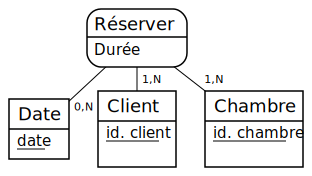


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo 
Réserver, 1N Client, 1N Chambre, 0N Date: Durée

Date: date
Client: id. client, 
Chambre: id. chambre, 


In [21]:
%%mocodo -t guess:entities
Réserver, 1N Client, 1N Chambre, 0N Date: Durée

### Dépendances fonctionnelles entre entités

Lorsque l'une des cardinalités maximales d'une association binaire est 1 (ou quelquefois 0), on désigne cette association sous le nom de **dépendance fonctionnelle**. On la figure souvent par un cercle portant le symbole DF : cela évite de se creuser la tête pour trouver un nom à une association qui (_spoiler_) disparaîtra corps et biens au moment du passage au relationnel.

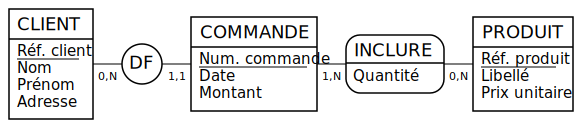

In [22]:
%%mocodo
CLIENT: Réf. client, Nom, Prénom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num. commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité
PRODUIT: Réf. produit, Libellé, Prix unitaire

### Associations réflexives

Quelquefois appelées **circulaires**, **unaires** ou **récursives**, elles associent une entité à elle-même. Voici par exemple une représentation des filiations patrilinéaires (le 01 permet d'« arrêter » la remontée des ancêtres) :

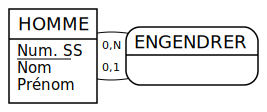

In [24]:
%%mocodo
HOMME: Num. SS, Nom, Prénom
ENGENDRER, 0N HOMME, 01 HOMME

### Identifiants composites

Préfixez d'un tiret bas (`_`) les second, troisième, etc. attributs pour les inclure dans l'identifiant.

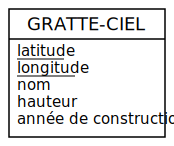

In [25]:
%%mocodo
GRATTE-CIEL: latitude, _longitude, nom, hauteur, année de construction

### Flèches sur les pattes

Suffixez d'un chevron (`<` ou `>`) les cardinalités de la patte concernée. La direction indiquée se lit en partant de l'association et en allant vers l'entité.

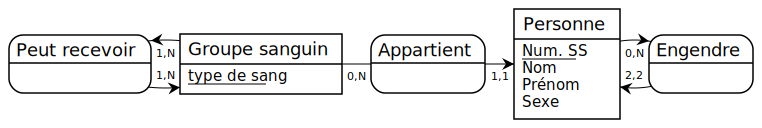

In [26]:
%%mocodo
Peut recevoir, 1N> Groupe sanguin, 1N< Groupe sanguin
Groupe sanguin: type de sang
Appartient, 11> Personne, 0N Groupe sanguin
Personne: Num. SS, Nom, Prénom, Sexe
Engendre, 0N< Personne, 22> Personne

### Types de données

Comme on l'a vu dans l'introduction, chaque attribut peut être assorti d'un type entre crochets, qui servira lors de la conversion en SQL. À partir de la version 4.0, Mocodo est capable de deviner le type des attributs usuels :

In [27]:
%%mocodo -t guess:types --select source
CLIENT: Réf. client, Nom, Prénom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num. commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité
PRODUIT: Réf. produit, Libellé, Prix unitaire


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo --select source
CLIENT: Réf. client [VARCHAR(8)], Nom [VARCHAR(255)], Prénom [VARCHAR(255)], Adresse [VARCHAR(30)]
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num. commande [VARCHAR(8)], Date [DATE], Montant [DECIMAL(10,2)]
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité [INTEGER]
PRODUIT: Réf. produit [VARCHAR(8)], Libellé [VARCHAR(50)], Prix unitaire [DECIMAL(10,2)]


### Tracé d'un MCD : principes

Mocodo combine les avantages de l'approche _diagram as code_ (comme PlantUML, Mermaid ou Graphviz), avec la liberté de positionnement offerte par les logiciels WYSIWYG (_what you see is what you get_).

Sa grande originalité est de se baser sur l'ordre et la séparation des lignes de la description pour définir une mise en page qui se révèle suffisante dans la majorité des cas.

#### Le pont aux ânes du langage Mocodo

Premier principe : les boîtes (entités et associations) définies sur des **lignes consécutives** sont tracées sur **une seule rangée**.

Si l'on écrit les définitions sur des lignes consécutives, on se retrouve donc vite avec des chevauchements qui ne sautent pas forcément aux yeux :

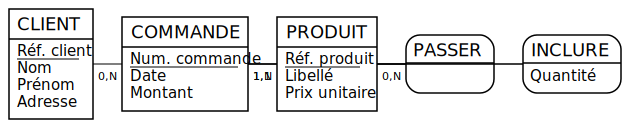

In [28]:
%%mocodo
CLIENT: Réf. client, Nom, Prénom, Adresse
COMMANDE: Num. commande, Date, Montant
PRODUIT: Réf. produit, Libellé, Prix unitaire
PASSER, 0N CLIENT, 11 COMMANDE
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité

L'option `--detect_overlaps` (active par défaut sous Mocodo online) signale le problème et donne la solution :

In [29]:
%mocodo -i sandbox --detect_overlaps

Mocodo Err.29 - Mauvaise disposition des boîtes :
  - La patte « INCLURE — COMMANDE » chevauche « PRODUIT ».
  - La patte « INCLURE — PRODUIT » chevauche « PASSER ».
  - La patte « PASSER — CLIENT » chevauche « COMMANDE ».
  - Les pattes  « PASSER — COMMANDE » et « INCLURE — COMMANDE » se chevauchent.
Pour corriger cela, réordonnez et/ou sautez des lignes dans le texte-source, soit à la
main, soit à l'aide de l'option -t arrange (tablette de chocolat sous Mocodo online).


**Limitation.** Seuls les chevauchements mettant en jeu des pattes horizontales ou verticales sont détectés.

#### MCD sur plusieurs lignes

Deuxième principe : pour commencer une nouvelle rangée, il faut sauter une ligne :

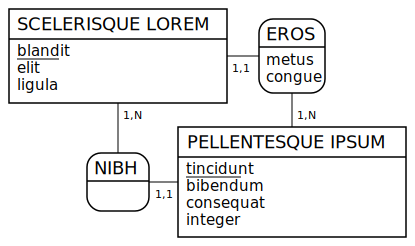

In [30]:
%%mocodo
SCELERISQUE LOREM: blandit, elit, ligula
EROS, 11 SCELERISQUE LOREM, 1N PELLENTESQUE IPSUM: metus, congue

NIBH, 1N SCELERISQUE LOREM, 11 PELLENTESQUE IPSUM
PELLENTESQUE IPSUM: tincidunt, bibendum, consequat, integer

Les centres des boîtes sont placés aux intersections d'une grille invisible. Ils sont donc alignés aussi bien horizontalement que verticalement. De plus, dans un but esthétique, le dessin fait l'objet d'une compression dans les deux dimensions. Par exemple, ci-dessus, un espace horizontal négatif a été créé entre le bord droit de l'entité de gauche et le bord gauche de l'entité de droite.

#### Mise en miroir

Mocodo permet de calculer facilement les symétriques d'un MCD :

- verticalement : `-t flip:v` ;
- horizontalement : `-t flip:h` ;
- selon la seconde diagonale (transposition) : `-t flip:d`.
- selon la première diagonale (transposition) : `-t flip:vhd`.

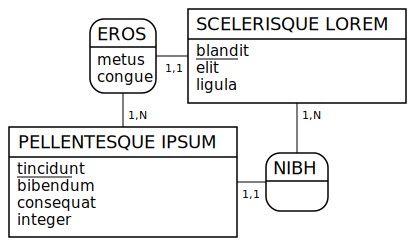

In [31]:
%mocodo -i sandbox --select mcd -t flip:h

**Corrections de la version 4.0.**
- Les sens de « horizontal » et « vertical » sont permutés pour être plus conformes à l'intuition.
- La documentation parlait de première diagonale, c'était la seconde, et vice-versa.

**Astuce.** Transposez le MCD  temporairement pour réaliser plus facilement certaines opérations d'édition en colonne, en particulier sous Mocodo online.

#### Insertion d'espacements

Mocodo centre les rangées qui contiennent moins de boîtes que les autres. Ce comportement n'est pas toujours idéal :

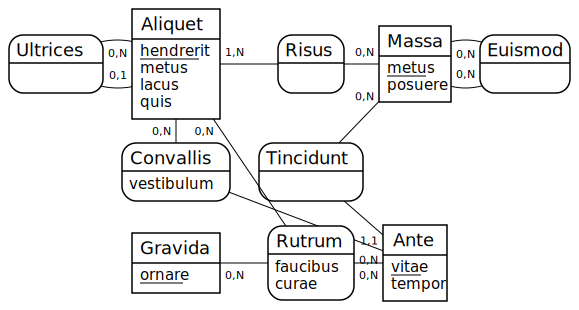

In [32]:
%%mocodo 
Ultrices, 01 Aliquet, 0N Aliquet
Aliquet: hendrerit, metus, lacus, quis
Risus, 1N Aliquet, 0N Massa
Massa: metus, posuere
Euismod, 0N Massa, 0N Massa

Convallis, 0N Aliquet, 0N Ante: vestibulum
Tincidunt, 11 Ante, 0N Massa

Gravida: ornare
Rutrum, 0N Gravida, 0N Ante, 0N Aliquet: faucibus, curae
Ante: vitae, tempor

L'utilisateur peut alors spécifier les espacements qu'il désire en complétant les rangées par des boîtes invisibles dont le seul rôle est de « pousser » les autres à l'emplacement voulu. Cela se fait en insérant manuellement des lignes réduites au caractère deux-points :

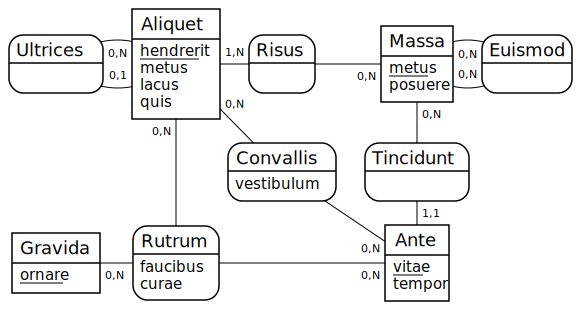

In [33]:
%%mocodo
Ultrices, 01 Aliquet, 0N Aliquet
Aliquet: hendrerit, metus, lacus, quis
Risus, 1N Aliquet, 0N Massa
Massa: metus, posuere
Euismod, 0N Massa, 0N Massa

:
:
Convallis, 0N Aliquet, 0N Ante: vestibulum
Tincidunt, 11 Ante, 0N Massa

Gravida: ornare
Rutrum, 0N Gravida, 0N Ante, 0N Aliquet: faucibus, curae
:
Ante: vitae, tempor

#### Réarrangement automatique

Cependant, en général, ces manipulations sont inutiles : Mocodo est capable de calculer tout seul des plongements à la fois compacts et esthétiques. Voici une compilation des réarrangements automatiques du MCD précédent produits par :
```
%mocodo -i sandbox -t arrange --seed 1
%mocodo -i sandbox -t arrange --seed 2
%mocodo -i sandbox -t arrange --seed 3
%mocodo -i sandbox -t arrange --seed 4
```

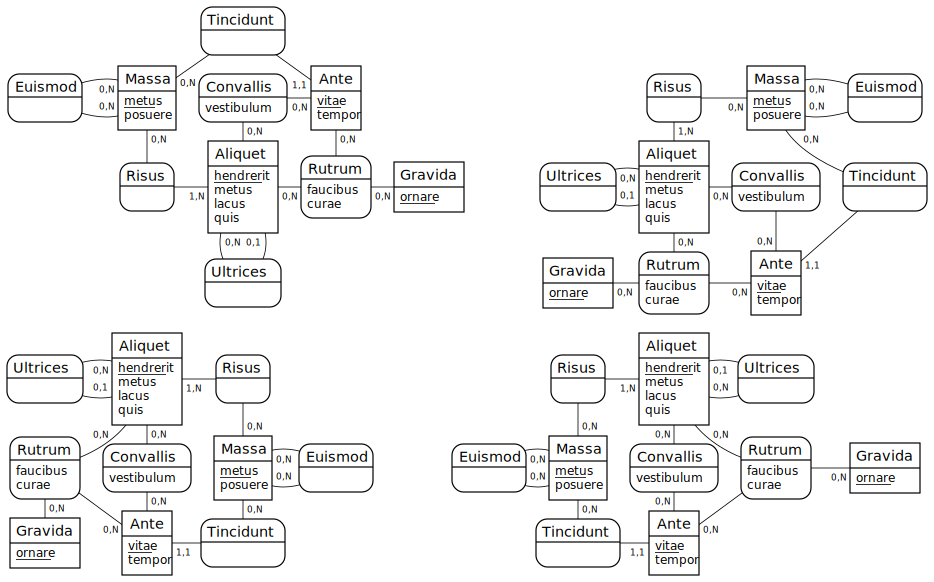

In [34]:
%mocodo -i ../examples/four_random_layouts --scale 0.8

## Extensions du modèle

### Entité faible (ou identification relative)

Préfixez d'un tiret bas (`_`) une cardinalité 11 pour indiquer que l'entité distinguée est faible.

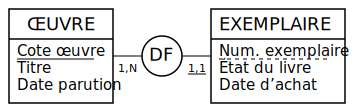

In [35]:
%%mocodo
ŒUVRE: Cote œuvre, Titre, Date parution
DF, 1N ŒUVRE, _11 EXEMPLAIRE
EXEMPLAIRE: Num. exemplaire, État du livre, Date d'achat

Dans le diagramme, les identifiants (ou plutôt, discriminateurs) d'une telle entité seront soulignés en pointillés, tandis que le 11 sera par défaut souligné d'un trait plein.

Notez qu'un discriminateur n'est pas toujours obligatoire :

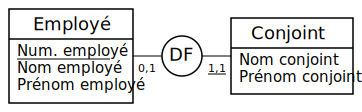

In [36]:
%%mocodo 
Employé: Num. employé, Nom employé, Prénom employé
Df, _11 Conjoint, 01 Employé
Conjoint: _Nom conjoint, Prénom conjoint

Son absence implique cependant que l'occurrence de l'entité forte qui « renforce » une occurrence de l'entité faible ne peut en renforcer une autre : d'où la cardinalité maximale 1 sur la patte distinguant EMPLOYÉ.

Mocodo rejettera donc la version « polygame » du MCD précédent (avec 0N à la place de 01) :

In [37]:
%%mocodo
Employé: Num. employé, Nom employé, Prénom employé
Df, _11 Conjoint, 0N Employé
Conjoint: _Nom conjoint, Prénom conjoint

Mocodo Err.50 - L'entité faible « CONJOINT » devrait avoir un discriminateur.


### Héritage (généralisation / spécialisation)

L'héritage permet de regrouper dans une entité, dite « mère », les attributs communs à plusieurs autres entités, dites « filles », qui se distinguent les unes des autres par des attributs spécifiques.

Pour définir une spécialisation, insérez une ligne spécifiant :


$$
\overbrace{\texttt{/}\,\texttt{XT}\,\texttt{\\}}^{\text{sa nature entre barres obliques}}
\qquad
\overbrace{\texttt{<}\,\texttt{-}}^{\text{son type de flèche}}
\qquad
\overbrace{\texttt{mère}}^{\text{une entité}}
\qquad
\overbrace{\texttt{,}}^{\text{une virgule}}
\qquad
\overbrace{\texttt{fille 1, fille 2, fille 3}}^{\text{des entités séparées par des virgules}}
\qquad
\overbrace{\texttt{: discriminateur}}^{\text{optionnellement, un attribut}}
$$ 

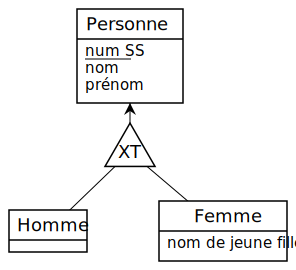

In [38]:
%%mocodo
Personne: num SS, nom, prénom

/XT\ Personne <- Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Inscrivez dans le triangle les symboles de votre choix pour prendre une part active aux guerres culturelles de notre temps :

| Totalité | Exclusion | Symboles | Exemple de population | Toute personne est : |
|----------|-----------|:------:-:|:---------:|:--------|
| oui        | oui         | `/XT\`  | <big>♂♂♂♂♂♂♂<br>♀♀♀♀♀♀♀♀♀♀</big> | - soit un homme<br>- soit une femme |
| non        | oui         | `/X\`   | <big>♂♂♂♂♂♂♂♂<br>♀♀♀♀♀♀<br>○○○○</big> | - soit un homme<br>- soit une femme<br>- soit aucun des deux |
| oui        | non         | `/T\`   | <big>♂♂♂♂♂♂<br>♀♀♀♀♀♀♀♀<br>⚥⚥⚥⚥</big> | - soit un homme<br>- soit une femme<br>- soit les deux à la fois |
| non        | non         | `/\`    | <big>♂♂♂♂♂<br>♀♀♀♀♀♀<br>○○○○<br>⚥⚥⚥⚥</big> | - soit un homme<br>- soit une femme<br>- soit aucun des deux<br>- soit les deux à la fois |

### Contrainte inter-associations

Pour définir une telle contrainte, ajoutez n'importe où une ligne spécifiant :

$$
\overbrace{\texttt{(}\,\texttt{FOO}\,\texttt{)}}^{\text{son nom entre parenthèses}}
\quad
\overbrace{
    \texttt{-}\,\texttt{>}
    \texttt{boîte 1,}
    \quad
    \texttt{.}\,\texttt{.}
    \texttt{boîte 2,}
    \quad
    \texttt{-}\,\texttt{-}
    \texttt{boîte 3,}
    \quad
    \texttt{boîte 4}
}^{\text{les types de liens et les boîtes qu'elle met en jeu, séparés par des virgules}}
\quad
\overbrace{\texttt{:}\,\,\texttt{horizontale, verticale}}^{\text{optionnellement, ses coordonnées}}
$$ 

**Précisions.**
- Comme leur nom ne l'indique pas, ces contraintes peuvent aussi bien porter sur des entités que des associations.
- Le nom d'une contrainte peut être formé de zéro à trois symboles quelconques.
- Un lien est soit vide (trait invisible), soit formé d'un ou plusieurs symboles `-` (trait plein) ou `.` (trait pointillé), optionnellement précédés d'un symbole `<` (flèche vers la contrainte) et/ou suivis d'un symbole `>` (flèche vers la boîte).
- Au contraire des boîtes (entités et associations), les contraintes ne sont pas... contraintes par la grille sous-jacente : la mise en page du MCD n'en tient absolument pas compte. Celui de l'exemple ci-dessous a donc dû être « aéré » avec des `:` pour leur faire de la place.
- Les clauses de définition des contraintes peuvent apparaître n'importe où. Notez cependant que tout réarrangement automatique les enverra systématiquement à la fin du texte-source.
- Chaque coordonnée du centre de la contrainte peut être exprimée sous la forme :
  - d'une référence à une boîte sur laquelle l'aligner horizontalement ou verticalement (respectivement) ;
  - d'un pourcentage de la largeur ou de la hauteur (respectivement) du MCD.
- En l'absence de coordonnées, la contrainte est placée au barycentre des boîtes qu'elle relie.


Voici un exemple concret, adapté de la Fig. 7.37 de _Merise, deuxième génération_ (Dominique Nanci et Bernard Espinasse, 4e éd., 2001) :

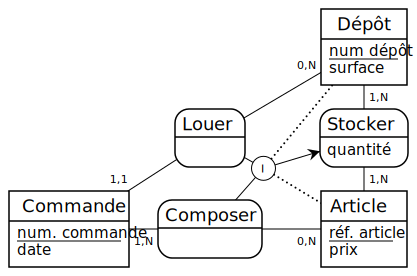

- **Article** (<ins>réf. article</ins>, prix)
- **Commande** (<ins>num. commande</ins>, date, _#num dépôt_)
- **Composer** (<ins>_#num. commande_</ins>, <ins>_#réf. article_</ins>)
- **Dépôt** (<ins>num dépôt</ins>, surface)
- **Stocker** (<ins>_#num dépôt_</ins>, <ins>_#réf. article_</ins>, quantité)


In [39]:
%%mocodo -t
:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
:
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer, Commande

Notez que pour Mocodo, ces contraintes sont purement décoratives : le passage au niveau relationnel ou physique n'en tient pas compte.

### Agrégat (ou pseudo-entité)

Dans le MCD ci-dessous, le petit rond et l'enveloppe pointillée indiquent qu'une réservation d'une chambre donnée à une date donnée ne peut être faite que par un seul client :

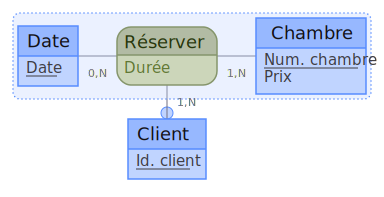

In [40]:
%%mocodo --colors ocean # changement de palette pour faire apparaître un fond semi-transparent 
Date: Date
Réserver, /1N Client, 1N Chambre, 0N Date: Durée
Chambre: Num. chambre, Prix

Client: Id. client

La syntaxe est minimale : une simple barre oblique `/` avant la cardinalité de l'entité-cible.

S'il y a au maximum deux entités à agréger, et que l'angle formé par l'association et les entités est plat ou rectangle, une enveloppe de points matérialise la pseudo-entité.

Sinon, pour des raisons de simplicité du code et de clarté du diagramme, l'enveloppe n'est pas affichée. Cependant, le petit rond subsiste et le reste des traitements est bien sûr inchangé.

**Remarques.**
- La représentation traditionnelle demanderait à insérer une association DF entre CLIENT et RÉSERVER. Mais permettre l'association d'une entité et d'une association demanderait à apporter au code de Mocodo des changements conséquents, pour un bénéfice qui ne nous saute pas forcément aux yeux.
- Les agrégats sur association binaire sont soit inutiles (sur une DF), soit impossibles (sur une non-DF, ils reviennent à permettre à une même occurrence d'entité de renforcer plusieurs occurrences d'une entité faible sans discriminateur). Mocodo les interdit dans les deux cas.

### CIF à unicité complète

La notion d'agrégation n'a pas très bonne presse dans les milieux autorisés. Ceux-ci lui préfèrent généralement celle (équivalente) de contrainte d'intégrité fonctionnelle à unicité complète. Pour rentrer dans leurs bonnes grâces (et désactiver du même coup la visualisation de l'enveloppe et du petit rond), il suffit d'expliciter la contrainte correspondante dans le MCD précédent. Mocodo peut le faire pour vous :

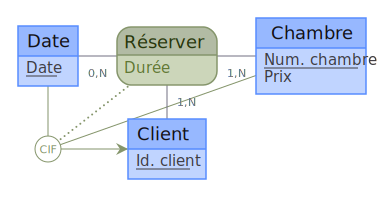


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo --seed=12 --colors ocean
Date: Date
Réserver, /1N Client, 1N Chambre, 0N Date: Durée
Chambre: Num. chambre, Prix

-INVISIBLE_1, XX Client, XX Client
Client: Id. client
:

(CIF) ..Réserver, ->Client, --Chambre, --Date: INVISIBLE_1, INVISIBLE_1


In [41]:
%mocodo -i sandbox -t create:cifs arrange --seed=12 --colors ocean

Remarquez que la visibilité de la CIF est assurée par le positionnement de celle-ci sur une boîte invisible introduite à cet effet : si vous rectifiez ce positionnement, vous pouvez bien sûr supprimer cette boîte.

[Vous avez également le droit](https://www.developpez.net/forums/d2099422/general-developpement/alm/outils/looping/cif-depliees-compactees/) d'alléger la visualisation des CIFs _complètes_ en transformant les traits pleins `"--"` des entités émettrices en traits invisibles `""`. Là encore, Mocodo peut le faire pour vous :

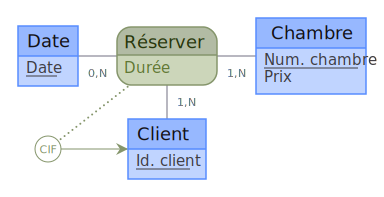


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo --seed=12 --colors ocean
Date: Date
Réserver, /1N Client, 1N Chambre, 0N Date: Durée
Chambre: Num. chambre, Prix

-INVISIBLE_1, XX Client, XX Client
Client: Id. client
:

(CIF) ..Réserver, ->Client, Chambre, Date: INVISIBLE_1, INVISIBLE_1


In [42]:
%mocodo -i sandbox -t create:cifs=light arrange --seed=12 --colors ocean

**Limitation.** Au niveau fonctionnel, c'est toujours la barre oblique qui conditionne le traitement des CIF. Par conséquent, les CIF à unicité _incomplète_ ne sont prises en charge qu'au niveau visuel.

# Conversion d'un MCD

## Passage au relationnel

Il se fait en deux étapes:
- la création d'une représentation **interne** complète du MLD ;
- la traduction de celle-ci en une représentation **externe** dans le ou les formats de sortie souhaités.

Pour construire la **représentation interne**, l'algorithme de base réalise la séquence d'opérations suivante :

1. Pour chaque entité, une relation (table) de même nom et de mêmes attributs est créée. Le ou les identifiants de l'entité constituent la clé primaire de la relation.
2. Toute relation issue d'une entité faible est renforcée, c'est-à-dire que la clé primaire de l'entité qu'elle détermine fonctionnellement vient s'adjoindre à sa clé primaire, au besoin de façon récursive.
3. Les associations sont traitées ainsi :
  1. si toutes les pattes de l'association portent la cardinalité maximale N, une relation de même nom et de mêmes attributs est créée. Sa clé primaire est constituée de l'ensemble des clés primaires des relations issues des entités mises en jeu ;
  2. dans le cas contraire, c'est-à-dire si l'une des pattes de l'association porte la cardinalité (1,1), ou à défaut (0,1), l'entité distinguée se voit adjoindre :
    1. en tant que clés étrangères, l'ensemble des clés primaires des autres entités mises en jeu;
    2. en tant que simples attributs, l'ensemble des attributs de l'association.

**Remarque.** Un couple de cardinalités non standard, c'est-à-dire distinct de (0,1), (1,1), (0,N) et (1,N), est traité comme (0,1) si son deuxième symbole est un 1, et comme (0,N) sinon. Cela couvre en particulier les cas (\*, 1), (\*,N), (?,?) et (X,X).

Pour construire la **représentation externe**, Mocodo formate la représentation interne à l'aide d'un gabarit. Près d'une centaine de gabarits sont fournis, qui permettent de produire quatre grandes catégories de résultats :
1. le schéma relationnel dans toutes les combinaisons de formats (HTML, Markdown, texte brut, $\LaTeX$) et d'options (avec ou sans explications, avec ou sans _boilerplate_, avec ou sans visualisation des contraintes d'unicité et d'optionalité) ;
2. le diagramme relationnel au format Mocodo, avec ou sans visualisation des contraintes d'unicité et d'optionalité, ou dans des formats externes, comme DBML ou D2.
3. le DDL en SQL ANSI et dans les principaux dialectes (Microsoft SQL Server, MySQL, Oracle DB, PostgreSQL, SQLite), avec ou sans _boilerplate_ de création de la base ;
4. le graphe des dépendances.

### Niveau logique

#### Schéma relationnel

La transformation `-t mld` opère la conversion d'un MCD (modèle conceptuel de données) en un MLD (modèle logique de données), autrement appelé **schéma relationnel** :

In [43]:
%mocodo -i ccp -t mld


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_mld.md
</tt>
</span>
</div>


- **Client** (<ins>Réf. client</ins>, Nom, Prénom, Adresse)
- **Commande** (<ins>Num. commande</ins>, Date, Montant, _#Réf. client_)
- **Inclure** (<ins>_#Num. commande_</ins>, <ins>_#Réf. produit_</ins>, Quantité)
- **Produit** (<ins>Réf. produit</ins>, Libellé, Prix unitaire)


Sous Jupyter Notebook, comme pour toutes les opérations de conversion, le tracé du MCD est omis par défaut. Dans le cas très fréquent où l'on a besoin de visualiser simultanément le MCD et le MLD, on peut invoquer l'option `-t` sans arguments (ou encore `--mld`) :

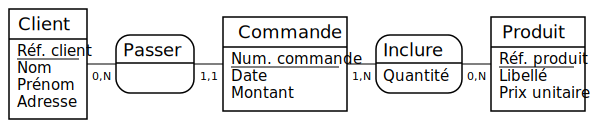

- **Client** (<ins>Réf. client</ins>, Nom, Prénom, Adresse)
- **Commande** (<ins>Num. commande</ins>, Date, Montant, _#Réf. client_)
- **Inclure** (<ins>_#Num. commande_</ins>, <ins>_#Réf. produit_</ins>, Quantité)
- **Produit** (<ins>Réf. produit</ins>, Libellé, Prix unitaire)


In [44]:
%mocodo -i ccp -t

#### Diagramme relationnel

La plupart des SGBD offrent une représentation hybride (graphique / texte) de la base sous la forme de tables liées par des flèches. Nous l'appelons **diagramme relationnel**. Sous Mocodo :

In [45]:
%mocodo -i ccp --colors mondrian -t diagram


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_mld.svg
</tt>
</span>
</div>


Le nom du fichier généré avant rendu graphique se termine par `_mld.mcd`. L'extension `.mcd` signifie que Mocodo peut le prendre comme texte-source (bien que ce ne soit pas un schéma conceptuel). Examinons son contenu :

In [46]:
display.Code("ccp_mld.mcd", language="text")

%%mocodo
:
Client: Réf. client, Nom, Prénom, Adresse
:
Commande: Num. commande, Date, Montant, #Réf. client > Client > Réf. client
:
Inclure: #Num. commande > Commande > Num. commande, _#Réf. produit > Produit > Réf. produit, Quantité
:
Produit: Réf. produit, Libellé, Prix unitaire
:

La syntaxe d'un MLD est effectivement la même que celle d'un MCD, à ceci près que les associations sont remplacées par des liens allant de l'attribut `a1` de l'entité `E1` à l'attribut `a2` de l'entité `E2`, et notés : `E1: ... a1 > E2 > a2`.

Les relations sont placées dans le même ordre que les boîtes du MCD d'origine. Vous devrez quelquefois les réarranger (automatiquement ou manuellement) pour obtenir un résultat plus esthétique. Notez que des boîtes invisibles ont été automatiquement insérées une colonne sur deux afin de laisser de la place aux flèches.

**Limitation.** Les clés étrangères composites sont actuellement représentées comme si elles étaient séparées (autant de flèches que de parties).

**Nouveautés de la version 4.0.**
- Ce qui se notait `E1: ... a1->E2->a2` se note maintenant `E1: ... a1 > E2 > a2`.
- Sous Jupyter Notebook, un seule étape suffit pour visualiser le diagramme relationnel.
- Le nom du fichier intermédiaire se termine par `_mld.mcd` au lieu de `.mld`. L'ancienne extension est abandonnée.

### Niveau physique : DDL

#### SQL

La principale raison de vivre d'un MCD est de se métamorphoser _in fine_ en une chatoyante base de données relationnelles. Cela se fait au moyen d'un sous-ensemble du langage SQL appelé DDL (_Data Definition Language_). Sous Mocodo :

In [47]:
%mocodo -i ccp -t sql


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE Client (
  PRIMARY KEY (Ref_client),
  Ref_client VARCHAR(8) NOT NULL,
  Nom        VARCHAR(255),
  Prenom     VARCHAR(255),
  Adresse    VARCHAR(255)
);

CREATE TABLE Commande (
  PRIMARY KEY (Num_commande),
  Num_commande VARCHAR(8) NOT NULL,
  Date         DATE,
  Montant      DECIMAL(10,2),
  Ref_client   VARCHAR(8) NOT NULL
);

CREATE TABLE Inclure (
  PRIMARY KEY (Num_commande, Ref_produit),
  Num_commande VARCHAR(8) NOT NULL,
  Ref_produit  VARCHAR(8) NOT NULL,
  Quantite     INTEGER
);

CREATE TABLE Produit (
  PRIMARY KEY (Ref_produit),
  Ref_produit   VARCHAR(8) NOT NULL,
  Libelle       VARCHAR(50),
  Prix_unitaire DECIMAL(10,2)
);

ALTER TABLE Commande ADD FOREIGN KEY (Ref_client) REFERENCES Client (Ref_client);

ALTER TABLE Inclure ADD FOREIGN KEY (Ref_produit) REFERENCES Produit (Ref_produit);
ALTER TABLE Inclure ADD FOREIGN KEY (Num_commande) REFERENCES Commande (Num_commande);

```

Notez le `NOT NULL` des clés primaires. Il s'agit d'une redondance, mais aussi d'une bonne pratique. Non seulement parce qu'_explicit is better than implicit_ : elle peut se révéler utile, par exemple pour désactiver les contraintes de clé primaire pendant une maintenance tout en continuant à interdire le remplissage avec des `NULL`. Si cela vous gêne, nous montrons en annexe comment l'éliminer.

**Principales nouveautés de la version 4.0.**
- Génération automatique des contraintes `UNIQUE`, `NOT NULL` et `NULL` appropriées.
- Les libellés sont convertis en ASCII, et toute suite de caractères qui ne sont ni des lettres, ni des chiffres, ni des tirets bas sont remplacés par un unique tiret bas. Cela simplifie la référence aux tables et aux champs, et évite de noyer le DDL sous un essaim de délimiteurs (qui plus est spécifiques à chaque dialecte). Ainsi, « Réf. client » se trouvera transformé en `Ref_client`.
- Vos choix de casse (minuscules, MAJUSCULES, _snake_case_, _camelCase_, _PascalCase_, etc.) sont respectés.

#### Inférence de type

Avec l'option de réécriture `-t create:types` Mocodo essaiera d'inférer des libellés des attributs tout type manquant. La langue définie avec l'option `--language` est prioritaire, mais l'anglais prend la relève en cas d'échec.

In [48]:
%%mocodo -t create:types --select rw
Customer: Customer ID, Last Name, First Name, Address
Make Order, 0N Customer, 11 Order
Order: Order Number, Date, Amount
INCLUDE, 1N Order, 0N Product: Quantity
Product: Product ID, Description, Unit Price


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo --select rw
Customer: Customer ID [VARCHAR(8)], Last Name [VARCHAR(255)], First Name [VARCHAR(255)], Address [VARCHAR(30)]
Make Order, 0N Customer, 11 Order
Order: Order Number [VARCHAR(8)], Date [DATE], Amount [DECIMAL(10,2)]
INCLUDE, 1N Order, 0N Product: Quantity [INTEGER]
Product: Product ID [VARCHAR(8)], Description [TEXT], Unit Price [DECIMAL(10,2)]


Il va de soi que les types inférés devront être systématiquement contrôlés, et parfois corrigés ou complétés. Une discussion sur StackOverflow, [Common MySQL fields and their appropriate data types](https://stackoverflow.com/questions/354763/common-mysql-fields-and-their-appropriate-data-types), a servi de point de départ. La liste des types utilisée est [celle de Wikipedia](https://en.wikibooks.org/wiki/Structured_Query_Language/Data_Types). Consultez les correspondances spécifiées dans `mocodo/resources/default_datatypes_fr.tsv`, etc. pour plus de détails, et n'hésitez pas à [ouvrir le débat](https://github.com/laowantong/mocodo/issues/new) si vous avez des corrections ou des suggestions.

Si vous préférez tout typer à la main, vous pouvez au moins créer les « cases » à remplir :

In [49]:
%%mocodo -t create:types=[] --select rw
Customer: Customer ID, Last Name, First Name, Address
Make Order, 0N Customer, 11 Order
Order: Order Number, Date, Amount
INCLUDE, 1N Order, 0N Product: Quantity
Product: Product ID, Description, Unit Price


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo --select rw
Customer: Customer ID [], Last Name [], First Name [], Address []
Make Order, 0N Customer, 11 Order
Order: Order Number [], Date [], Amount []
INCLUDE, 1N Order, 0N Product: Quantity []
Product: Product ID [], Description [], Unit Price []


#### Dialectes de SQL

L'argument `sql` peut être remplacé par un nom de dialecte parmi `mysql`, `oracle`, `postgresql`, `sqlite` et (nouveauté de la version 4) `mssql`. Quelques transformations seront alors appliquées au code-source généré. Du fait de l'uniformisation de la syntaxe apportée par la version 4, elles sont assez minimes.

Notez les points suivants :
- Mocodo ne touche pas aux types spécifiés par l'utilisateur. Une traduction inter-dialectes automatique est envisageable dans le futur, mais c'est un problème qui n'a en réalité aucune solution satisfaisante.
- Mocodo protège les noms de tables ou de colonnes qui se trouveraient faire partie des mots réservés par le dialecte-cible. Par exemple, ci-dessous, les noms `USER` et `MEMBER` sont réservés en MySQL. Les listes viennent du site [modern-sql.com](https://modern-sql.com) de Markus Winand, et plus précisément de la page https://modern-sql.com/reserved-words-empirical-list.
- Avec la sous-sous-option `b`, un _boilerplate_ de création de la base est ajouté en préambule.

In [50]:
%%mocodo -t mysql:b
USER: username, mail, member


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl_mysql.sql
</tt>
</span>
</div>


```sql
CREATE DATABASE IF NOT EXISTS `MCD`
  CHARACTER SET utf8mb4
  COLLATE utf8mb4_general_ci
;
USE `MCD`;

CREATE TABLE `USER` (
  PRIMARY KEY (username  ),
  username   VARCHAR(42) NOT NULL,
  mail       VARCHAR(42),
  `member`   VARCHAR(42)
);

```

### Notes sur les règles de passage

#### Génération de contraintes d'optionalité et d'unicité

Avec la sous-sous-option `c`, Mocodo peut faire apparaître dès le niveau logique certaines contraintes du niveau physique. Les notations sont les suivantes :

| Contrainte | niveau logique | niveau physique |
|---|:--|:--|
| non-optionalité | attribut! | `NOT NULL` |
| optionalité | attribut? | `NULL` |
| unicité | attribut $^{u1\ u2...}$ | `UNIQUE` |

Par exemple, ci-dessous, la clé étrangère _#Réf_client_ est maintenant marquée comme **non optionnelle** :

In [51]:
%mocodo -i ccp -t mld:c


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_mld.md
</tt>
</span>
</div>


- **Client** (<ins>Réf. client</ins>, Nom, Prénom, Adresse)
- **Commande** (<ins>Num. commande</ins>, Date, Montant, _#Réf. client!_)
- **Inclure** (<ins>_#Num. commande_</ins>, <ins>_#Réf. produit_</ins>, Quantité)
- **Produit** (<ins>Réf. produit</ins>, Libellé, Prix unitaire)


La clé étrangère _#id entreprise_ est marquée comme **optionnelle** :

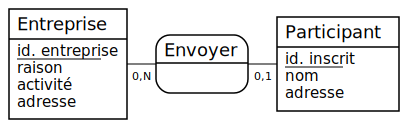


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Entreprise** (<ins>id. entreprise</ins>, raison, activité, adresse)
- **Participant** (<ins>id. inscrit</ins>, nom, adresse, _#id. entreprise?_)


In [52]:
%%mocodo --select all -t mld:c
Entreprise: id. entreprise, raison, activité, adresse
Envoyer, 0N Entreprise, 01 Participant
Participant: id. inscrit, nom, adresse

La clé étrangère _#id employé_ est marquée comme **unique** :

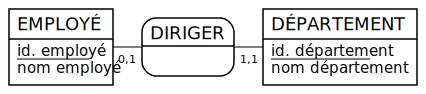


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **DÉPARTEMENT** (<ins>id. département</ins>, nom département, _#id. employé!_ <sup>u1</sup>)
- **EMPLOYÉ** (<ins>id. employé</ins>, nom employé)


In [53]:
%%mocodo --select all -t mld:c
EMPLOYÉ: id. employé, nom employé
DIRIGER, 11 DÉPARTEMENT, 01 EMPLOYÉ
DÉPARTEMENT: id. département, nom département

#### Ajout manuel de contraintes d'optionalité et d'unicité

Les contraintes `NOT NULL` ou `NULL` spécifiées dans les types peuvent également faire l'objet d'une visualisation au niveau relationnel :

In [54]:
%%mocodo -t mld:c
Personne: id. personne [VARCHAR(8)], nom [VARCHAR(255) NOT NULL], prénom [VARCHAR(255)], nom de jeune fille [VARCHAR(255) NULL]


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Personne** (<ins>id. personne</ins>, nom!, prénom, nom de jeune fille?)


Pour les contraintes d'unicité, qui peuvent s'appliquer à _plusieurs groupes_ d'attributs potentiellement _non disjoints_, la notation est un peu plus complexe. Voici un exemple [proposé par Fabien Duchateau](https://github.com/laowantong/mocodo/issues/79) :

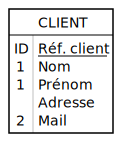


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **CLIENT** (<ins>Réf. client</ins>, Nom <sup>u1</sup>, Prénom <sup>u1</sup>, Adresse, Mail <sup>u2</sup>)


In [55]:
%%mocodo --select all -t mld:c --shapes trebuchet # changement de police de caractères pour mieux distinguer les 1 des I
CLIENT: Réf. client, 1_Nom, 1_Prénom, Adresse, 2_Mail

C'est l'occasion d'introduire quelques définitions :

- On appelle **identifiant candidat** d'une entité tout sous-ensemble minimal d'attributs dont chaque occurrence est unique.
- Parmi ces sous-ensembles, l'un est élu **identifiant** (tout court), souligné, et appelé à devenir clé primaire lors du passage au relationnel.
- Les candidats malheureux sont appelés **identifiants alternatifs**.

Ainsi, dans l'exemple précédent, l'ensemble des identifiants candidats de CLIENT est constitué de :

- l'identifiant proprement dit _Réf. client_ ;
- l'identifiant alternatif (_Nom_, _Prénom_) (dont on supposera pour les besoins de la cause qu'il assure l'unicité) ;
- l'identifiant alternatif _Mail_.

Par défaut, dès la première déclaration d'un identifiant alternatif, Mocodo fait apparaître une gouttière à gauche des attributs de **toutes** les entités. Y sont portés :

- un symbole « ID » (resp. « id ») pour l'identifiant fort (resp. faible).
- des chiffres de 1 à 9 correspondant aux numéros des identifiants alternatifs.

La notation de Mocodo permet de faire de n'importe quels sous-ensembles d'attributs des identifiants alternatifs. Ci-dessous, le premier identifiant alternatif est le triplet (_bar_, _biz_, _quux_), le second (_biz_, _buz_, _quux_) et le troisième (_qux_, _quux_) :

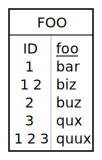


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **FOO** (<ins>foo</ins>, bar <sup>u1</sup>, biz <sup>u1 u2</sup>, buz <sup>u2</sup>, qux <sup>u3</sup>, quux <sup>u1 u2 u3</sup>)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE FOO (
  PRIMARY KEY (foo),
  foo  VARCHAR(42) NOT NULL,
  bar  VARCHAR(42),
  biz  VARCHAR(42),
  buz  VARCHAR(42),
  qux  VARCHAR(42),
  quux VARCHAR(42),
  UNIQUE (bar, biz, quux),
  UNIQUE (biz, buz, quux),
  UNIQUE (qux, quux)
);

```

In [56]:
%%mocodo --select all -t markdown:c sql --shapes trebuchet
FOO: foo, 1_bar, 12_biz, 2_buz, 3_qux, 123_quux

Examinons le cas exceptionnel où l'identifiant à souligner a un attribut commun avec un identifiant alternatif. Ce dernier devant être distinct et minimal, cela implique que l'identifiant est composite.

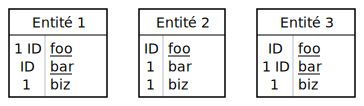

In [57]:
%%mocodo --shapes trebuchet
Entité 1_: 1_foo, _bar, 1_biz
Entité 2_: foo, 1_bar, 1_biz
Entité 3_: foo, 01_bar, 1_biz

- Si l'attribut commun est en tête de liste (ici, _foo_, entité 1), rien ne change, on écrit `1_foo`.
- S'il n'est pas en tête de liste (ici, _bar_, entité 2), l'écriture `1_bar` dénote déjà l'appartenance à un identifiant alternatif. Elle ne peut dénoter simultanément l'appartenance à l'identifiant à souligner.
- C'est pourquoi on doit donc expliciter l'appartenance à l'identifiant à souligner qui, comme on l'a vu, est numéroté `0` (entité 3).

Un sous-cas demande encore réflexion : celui où le premier attribut ne fait pas partie de l'identifiant à souligner (entité 4). Si l'on veut alors que ce premier attribut appartienne à une clé alternative, il faut expliciter le `0` (entité 5).

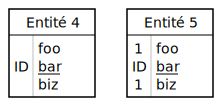

In [58]:
%%mocodo --shapes trebuchet
Entité 40: _foo, _bar, biz
Entité 50: 01_foo, _bar, 1_biz

En résumé, on explicite le `0`, soit pour **empêcher le soulignement du premier attribut**, soit pour **forcer le soulignement d'un attribut suivant**.

Cela devrait vous rappeler quelque chose… Remplacez `0` par `_` dans la phrase précédente et vous retrouverez la règle que vous avez appris à connaître et à aimer : on explicite le `_`, soit pour empêcher le soulignement du premier attribut, soit pour forcer le soulignement d'un attribut suivant.

#### Gestion des entités faibles (identification relative)

Dans ce joli exemple dû à Idris NEUMANN, [_Initiation à la conception de bases de données relationnelles avec MERISE_](http://ineumann.developpez.com/tutoriels/merise/initiation-merise/#LIV-A), les renforcements successifs aboutissent à faire entrer l'identifiant de RUE dans celui de APPARTEMENT, alors même que ces entités sont séparées par non moins de trois associations :

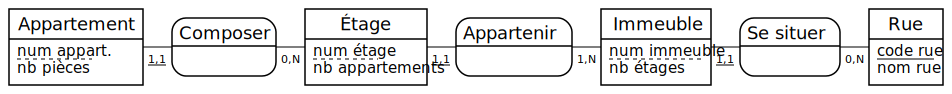

- **Appartement** (<ins>_#code rue_</ins>, <ins>_#num immeuble_</ins>, <ins>_#num étage_</ins>, <ins>num appart.</ins>, nb pièces)
- **Étage** (<ins>_#code rue_</ins>, <ins>_#num immeuble_</ins>, <ins>num étage</ins>, nb appartements)
- **Immeuble** (<ins>_#code rue_</ins>, <ins>num immeuble</ins>, nb étages)
- **Rue** (<ins>code rue</ins>, nom rue)


In [59]:
%%mocodo -t
Appartement: num appart., nb pièces
Composer, 0N Étage, _11 Appartement
Étage: num étage, nb appartements
Appartenir, 1N Immeuble, _11 Étage
Immeuble: num immeuble, nb étages
Se situer, 0N Rue, _11 Immeuble
Rue: code rue, nom rue

Le résultat apparaît plus clairement sur le diagramme relationnel :

In [60]:
%mocodo -i sandbox -t diagram --colors mondrian


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.svg
</tt>
</span>
</div>


Une phase préliminaire de l'algorithme de passage au relationnel consiste à « renforcer » les entités faibles de façon à traiter uniquement des identifiants forts dans la suite. Cela permet la gestion des renforcements en cascade comme ci-dessus, ainsi que la détection des problèmes de renforcement cyclique :

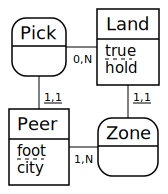

In [63]:
%%mocodo
Pick, 0N Land, _11 Peer
Land: true, hold

Peer: foot, city
Zone, 1N Peer, _11 Land

In [64]:
%mocodo -i sandbox -t

Mocodo Err.17 - Cycle d'entités faibles dans "Land", "Peer".


#### Gestion de l'héritage

La bonne gestion d'un héritage est primordiale, tant du point de vue de la préservation du patrimoine, que de l'optimisation des ressources financières, de la minimisation des conflits familiaux et du respect des dernières volontés du défunt. Je blague.

Adaptons ici un exemple d'un [cours de Stéphane Crozat](https://stph.scenari-community.org/bdd/rel3.pdf). Nous reprenons sa terminologie et donnons en parallèle celle introduite par Martin Fowler dans _Patterns of Enterprise Application Architecture_, Addison-Wesley (2003).

Ci-dessous, l'héritage est considéré comme _total_ (tout document est soit un ouvrage, soit une thèse, soit les deux). Crozat passe en revue trois mécanismes possibles pour le passage au relationnel.

---

L'**héritage par référence** (en anglais, [_Class Table Inheritance_](http://martinfowler.com/eaaCatalog/classTableInheritance.html) ou _Table Per Type Inheritance_) se note en Mocodo par une flèche simple allant vers les filles. Une référence à la table-mère sera ajoutée dans chaque table-fille comme clé étrangère. L'intérêt de cette solution est en raison directe du nombre d'attributs non identifiants de l'entité-mère.

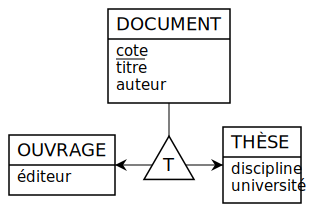


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **DOCUMENT** (<ins>cote</ins>, titre, auteur)
- **OUVRAGE** (<ins>_#cote_</ins>, éditeur)
- **THÈSE** (<ins>_#cote_</ins>, discipline, université)


In [65]:
%%mocodo --select all -t mld:c
DOCUMENT: cote, titre, auteur
    
OUVRAGE: éditeur
/T\ DOCUMENT -> OUVRAGE, THÈSE
THÈSE: discipline, université

---

L'**héritage par absorption dans les tables-filles** (en anglais, [_Concrete Table Inheritance_](http://martinfowler.com/eaaCatalog/concreteTableInheritance.html) ou _Table Per Concrete Inheritance_) se note en doublant la flèche :

1. les attributs de la table-mère sont reproduits dans chacune des filles. Pour chaque document qui est à la fois un ouvrage et une thèse, il y aura donc duplication des triplets (<ins>cote</ins>, titre, auteur).
2. la table-mère disparaît. Pour éviter de perdre les informations sur les documents qui ne seraient ni des ouvrages, ni des thèses, Mocodo lève une erreur si l'héritage n'est pas total (T ou XT).

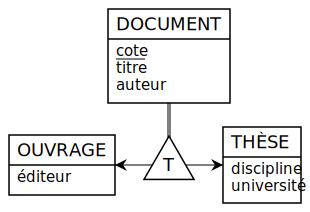


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **OUVRAGE** (<ins>cote</ins>, titre, auteur, éditeur)
- **THÈSE** (<ins>cote</ins>, titre, auteur, discipline, université)


In [66]:
%%mocodo --select all -t mld:c
DOCUMENT: cote, titre, auteur
    
OUVRAGE: éditeur
/T\ DOCUMENT => OUVRAGE, THÈSE
THÈSE: discipline, université

---

L'**héritage par absorption dans la table-mère** (en anglais, [_Single Table Inheritance_](http://martinfowler.com/eaaCatalog/singleTableInheritance.html) ou _Table Per Hierarchy Inheritance_) se note par une flèche simple allant vers la mère. Les tables-filles disparaissent, et leurs attributs migrent dans la mère avec une contrainte d'optionalité (point d'interrogation en relationnel, `NULL` en SQL).

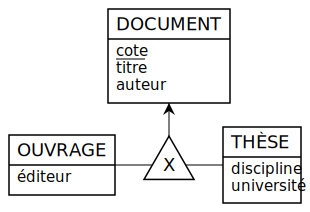


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **DOCUMENT** (<ins>cote</ins>, titre, auteur, discriminateur?, éditeur?, discipline?, université?)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE DOCUMENT (
  PRIMARY KEY (cote),
  cote           VARCHAR(42) NOT NULL,
  titre          VARCHAR(42),
  auteur         VARCHAR(42),
  discriminateur ENUM ('OUVRAGE', 'THÈSE') NULL,
  editeur        VARCHAR(42) NULL,
  discipline     VARCHAR(42) NULL,
  universite     VARCHAR(42) NULL
);

```

In [67]:
%%mocodo --select all -t mld:c sql
DOCUMENT: cote, titre, auteur

OUVRAGE: éditeur
/X\ DOCUMENT <- OUVRAGE, THÈSE: discriminateur [ENUM ('OUVRAGE', 'THÈSE')]
THÈSE: discipline, université

Ci-dessus, nous avons donné comme « attribut » au triangle d'héritage un « discriminateur » de type `ENUM`. Cela ajoute à la table un champ optionnel ou non (selon que l'héritage est partiel ou total) permettant de déterminer à quel type concret d'une occurrence on a affaire.

C'est par défaut un `UNSIGNED INT`, qui pourra prendre les valeurs :
- 1 = OUVRAGE, 2 = THÈSE, pour l'héritage exclusif ;
- 1 ($2^0$) = OUVRAGE, 2 ($2^1$) = THÈSE, 3 ($2^0 | 2^1$) = OUVRAGE + THÈSE, pour l'héritage non exclusif.

Alternativement à l'emploi d'un discriminateur, Mocodo peut ajouter un drapeau booléen par table-fille. Cela se note en doublant la flèche :

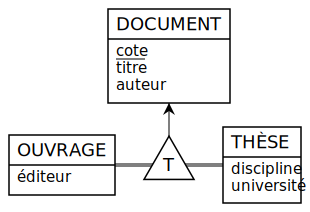


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **DOCUMENT** (<ins>cote</ins>, titre, auteur, est ouvrage!, éditeur?, est these!, discipline?, université?)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE DOCUMENT (
  PRIMARY KEY (cote),
  cote        VARCHAR(42) NOT NULL,
  titre       VARCHAR(42),
  auteur      VARCHAR(42),
  est_ouvrage BOOLEAN NOT NULL,
  editeur     VARCHAR(42) NULL,
  est_these   BOOLEAN NOT NULL,
  discipline  VARCHAR(42) NULL,
  universite  VARCHAR(42) NULL
);

```

In [68]:
%%mocodo --select all -t mld:c sql
DOCUMENT: cote, titre, auteur

OUVRAGE: éditeur
/T\ DOCUMENT <= OUVRAGE, THÈSE
THÈSE: discipline, université

#### Gestion de l'agrégation

Un agrégat simple autour d'une association dont toutes les cardinalités maximales sont N se traduit en relationnel comme la même association non agrégée, mais avec une clé primaire réduite :

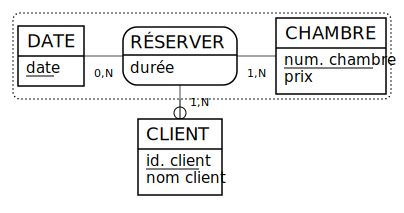


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **CHAMBRE** (<ins>num. chambre</ins>, prix)
- **CLIENT** (<ins>id. client</ins>, nom client)
- **RÉSERVER** (<ins>_#num. chambre_</ins>, <ins>date</ins>, _#id. client!_, durée)


In [69]:
%%mocodo --select all -t mld:c
DATE: date
RÉSERVER, /1N CLIENT, 1N CHAMBRE, 0N DATE: durée
CHAMBRE: num. chambre, prix

CLIENT: id. client, nom client

Un agrégat simple autour d'une association dont la cardinalité maximale « de sortie » est 1 se traduit en relationnel comme la même association non agrégée, mais avec une contrainte d'unicité sur la clé étrangère. Ci-dessous, au lieu d'avoir simplement _num résa_ $\implies$ (_num voilier_, _num semaine_), on a donc en plus (_num voilier_, _num semaine_) $\implies$ _num résa_ :

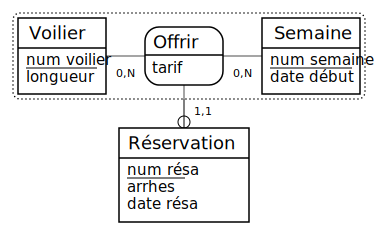


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Réservation** (<ins>num résa</ins>, arrhes, date résa, _#num voilier!_ <sup>u1</sup>, _#num semaine!_ <sup>u1</sup>, tarif)
- **Semaine** (<ins>num semaine</ins>, date début)
- **Voilier** (<ins>num voilier</ins>, longueur)


In [70]:
%%mocodo --select all -t mld:c
Voilier: num voilier, longueur
Offrir, /11 Réservation, 0N Voilier, 0N Semaine: tarif
Semaine: num semaine, date début

Réservation: num résa, arrhes, date résa

Le cas des agrégats multiples, plus rare, est étudié en annexe.

### Ajustement des règles de passage

#### Supprimer ou maintenir une table facultative

Le passage au relationnel supprime automatiquement les tables réduites à une clé primaire, pourvu qu'aucun composant de celle-ci ne soit clé étrangère. Si l'on souhaite maintenir certaines de ces tables, on préfixe d'un `+` l'entité concernée. Ainsi, ci-dessous, Date est supprimée, mais pas Thème.


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Aborder** (<ins>_#thème_</ins>, <ins>_#id. formation_</ins>)
  - Le champ _thème_ fait partie de la clé primaire de la table. C'est une clé étrangère qui a migré directement à partir de l'entité _Thème_.
  - Le champ _id. formation_ fait partie de la clé primaire de la table. C'est une clé étrangère qui a migré directement à partir de l'entité _Formation_.

- **Animateur** (<ins>num. animateur</ins>, nom animateur)
  - Le champ _num. animateur_ constitue la clé primaire de la table. C'était déjà un identifiant de l'entité _Animateur_.
  - Le champ _nom animateur_ était déjà un simple attribut de l'entité _Animateur_.

- **Formation** (<ins>id. formation</ins>, durée)
  - Le champ _id. formation_ constitue la clé primaire de la table. C'était déjà un identifiant de l'entité _Formation_.
  - Le champ _durée_ était déjà un simple attribut de l'entité _Formation_.

- **Intervenir** (<ins>_#num. animateur_</ins>, <ins>_#id. formation_</ins>, <ins>date</ins>, nb heures)
  - Le champ _num. animateur_ fait partie de la clé primaire de la table. C'est une clé étrangère qui a migré directement à partir de l'entité _Animateur_.
  - Le champ _id. formation_ fait partie de la clé primaire de la table. C'est une clé étrangère qui a migré directement à partir de l'entité _Formation_.
  - Le champ _date_ fait partie de la clé primaire de la table. Sa table d'origine (_Date_) ayant été supprimée, il n'est pas considéré comme clé étrangère.
  - Le champ _nb heures_ était déjà un simple attribut de l'association _Intervenir_.

- **Thème** (<ins>thème</ins>)
  - Le champ _thème_ constitue la clé primaire de la table. C'était déjà un identifiant de l'entité _Thème_.
<br>
----


**NB.** La table _Date_ a été supprimée car elle était réduite à la clé primaire de son entité d'origine.


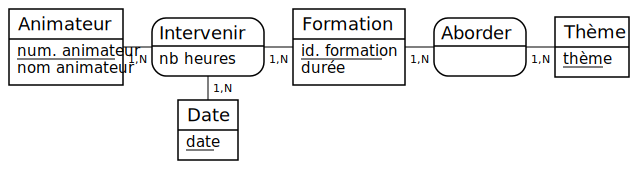

In [71]:
%%mocodo --select mld mcd -t mld:e
Animateur: num. animateur, nom animateur
Intervenir, 1N Animateur, 1N Formation, 1N Date: nb heures
Formation: id. formation, durée
Aborder, 1N Thème, 1N Formation
+Thème: thème

Date: date
:

Notez l'explication de la suppression (en NB) et celle de la perte du caractère étranger de l'attribut _date_ (dans la table Intervenir). Pour une discussion sur cette problématique, cf. [issue #66](https://github.com/laowantong/mocodo/issues/66).

#### Forcer une table pour éviter un champ optionnel

Une association de dépendance fonctionnelle ne donne normalement pas lieu à une création de table. Pour reprendre un exemple vu plus haut :

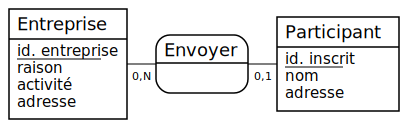


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Entreprise** (<ins>id. entreprise</ins>, raison, activité, adresse)
- **Participant** (<ins>id. inscrit</ins>, nom, adresse, _#id. entreprise?_)


In [72]:
%%mocodo --select all -t mld:c
Entreprise: id. entreprise, raison, activité, adresse
Envoyer, 0N Entreprise, 01 Participant
Participant: id. inscrit, nom, adresse

Dans le cas où les particuliers sont beaucoup plus nombreux que les employés d'entreprise, la clé étrangère _#id. entreprise_ est presque toujours à `NULL`. C'est une perte d'espace de stockage. On peut <s>entourer l'association de crochets droits</s> préfixer d'un `+` (à partir de la version 4) l'association pour forcer sa conversion en table. Mocodo produit alors une visualisation intermédiaire entre entité et association :

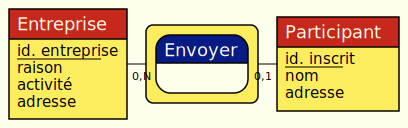


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Entreprise** (<ins>id. entreprise</ins>, raison, activité, adresse)
- **Envoyer** (<ins>_#id. inscrit_</ins>, _#id. entreprise!_)
- **Participant** (<ins>id. inscrit</ins>, nom, adresse)


In [73]:
%%mocodo --select all -t mld:c --colors mondrian
Entreprise: id. entreprise, raison, activité, adresse
+Envoyer, 0N Entreprise, 01 Participant
Participant: id. inscrit, nom, adresse

Cela permet du même coup d'éviter un champ optionnel, dont la gestion peut être délicate (notamment sous Microsoft SQL Server qui, au mépris du standard SQL, ne semble pas convaincu qu'une colonne `UNIQUE` peut contenir plus d'un `NULL` !).

#### Préciser le rôle d'une clé étrangère

Ce MCD modélise la soutenance de stage des étudiants, ainsi que la visite d'amitié et de contrôle dont les honore leur enseignant responsable :

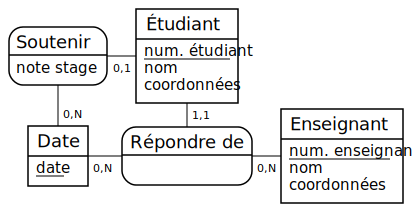

- **Enseignant** (<ins>num. enseignant</ins>, nom, coordonnées)
- **Étudiant** (<ins>num. étudiant</ins>, nom, coordonnées, date 1, note stage, date 2, _#num. enseignant_)


In [75]:
%%mocodo -t
Soutenir, 01 Étudiant, 0N Date: note stage
Étudiant: num. étudiant, nom, coordonnées

Date: date
Répondre de, 0N Date, 11 Étudiant, 0N Enseignant
Enseignant: num. enseignant, nom, coordonnées

Force est de constater que la table Étudiant laisse quelque peu à désirer du point de vue sémantique :

- on ne sait pas à quoi correspondent les attributs _date 1_ et _date 2_ : ils ne peuvent en tout cas certainement pas être laissés en l'état ;
- ensuite, on pourrait avoir envie d'expliciter la raison pour laquelle un enseignant apparaît parmi les attributs d'un étudiant.

Ces précisions peuvent être apportées en insérant, entre la cardinalité et l'entité des pattes appropriées, une note entre crochets, appelée **rôle**. Ces rôles seront utilisés pour compléter le nom des clés étrangères correspondantes. Cela permet de réintroduire la sémantique perdue lors de la disparition des associations de dépendance fonctionnelle par lesquelles elle ont migré :

In [76]:
%%mocodo -t mld
Soutenir, 01 Étudiant, 0N [soutenance] Date: note stage
Étudiant: num. étudiant, nom, coordonnées

Date: date
Répondre de, 0N [+ visite resp] Date, 11 Étudiant, 0N [-num. ens. resp.] Enseignant
Enseignant: num. enseignant, nom, coordonnées


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Enseignant** (<ins>num. enseignant</ins>, nom, coordonnées)
- **Étudiant** (<ins>num. étudiant</ins>, nom, coordonnées, date soutenance, note stage, date visite resp, _#num. ens. resp._)


La composition du rôle est entièrement paramétrable :

- _date soutenance_ : par défaut, le rôle est concaténé à la clé, avec un séparateur dépendant du gabarit (espace par défaut, tiret bas pour SQL).
- _date visite resp._ : `+` en préfixe supprime le séparateur.
- _num. ens. resp._ : `-` en préfixe supprime le nom de la clé et le remplace par le rôle.

Pour ne pas surcharger le dessin, le rôle n'est pas affiché à côté du lien, mais il apparaît au survol de la cardinalité.

**Correction de la version 4.0.** Dans une association réflexive hiérarchique, c'est désormais le rôle porté par la patte `*N` qui sert à rétablir la sémantique. Auparavant c'était l'inverse, en contradiction avec le traitement des associations binaires et n-aires : si vous avez utilisé des rôles dans une association réflexive avant la version 4.0.0, vous devez donc les permutez pour que Mocodo les traite correctement. Reprenons la filiation patrilinéaire :

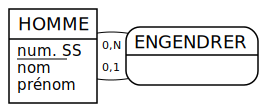

- **HOMME** (<ins>num. SS</ins>, nom, prénom, _#num. SS père_)


In [78]:
%%mocodo -t
HOMME: num. SS, nom, prénom
ENGENDRER, 0N [père] HOMME, 01 [fils] HOMME

#### Orienter la migration dans les DF à double sens

Lorsque toutes les cardinalités d'une dépendance fonctionnelle sont 11 (ou toutes 01), le sens de migration est spécifié à coût zéro en référençant l'entité réceptrice en tête de la liste des entités énumérées dans la clause de définition de l'association :

In [79]:
%%mocodo -t mld diagram sql --colors mondrian
USER: user id [VARCHAR(8)], name [VARCHAR(100)], pseudo [VARCHAR(100)]
DF, 11 USER, 11 AUTHENTICATION
AUTHENTICATION: email [VARCHAR(255)], password hash [BINARY(64)], salt [BINARY(16)]


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **AUTHENTICATION** (<ins>email</ins>, password hash, salt)
- **USER** (<ins>user id</ins>, name, pseudo, _#email_)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.svg
</tt>
</span>
</div>



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE AUTHENTICATION (
  PRIMARY KEY (email),
  email         VARCHAR(255) NOT NULL,
  password_hash BINARY(64),
  salt          BINARY(16)
);

CREATE TABLE USER (
  PRIMARY KEY (user_id),
  user_id VARCHAR(8) NOT NULL,
  name    VARCHAR(100),
  pseudo  VARCHAR(100),
  email   VARCHAR(255) NOT NULL,
  UNIQUE (email)
);

ALTER TABLE USER ADD FOREIGN KEY (email) REFERENCES AUTHENTICATION (email);

```

Dans la version avec identification relative, c'est l'entité faible qui doit être placée en tête :

In [80]:
%%mocodo -t mld diagram sql --colors mondrian
USER: user id [VARCHAR(8)], name [VARCHAR(100)], pseudo [VARCHAR(100)]
DF, _11 AUTHENTICATION, 11 USER
AUTHENTICATION: email [VARCHAR(255)], password hash [BINARY(64)], salt [BINARY(16)]


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **AUTHENTICATION** (<ins>_#user id_</ins>, <ins>email</ins>, password hash, salt)
- **USER** (<ins>user id</ins>, name, pseudo)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.svg
</tt>
</span>
</div>



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE AUTHENTICATION (
  PRIMARY KEY (user_id, email),
  user_id       VARCHAR(8) NOT NULL,
  email         VARCHAR(255) NOT NULL,
  password_hash BINARY(64),
  salt          BINARY(16)
);

CREATE TABLE USER (
  PRIMARY KEY (user_id),
  user_id VARCHAR(8) NOT NULL,
  name    VARCHAR(100),
  pseudo  VARCHAR(100)
);

ALTER TABLE AUTHENTICATION ADD FOREIGN KEY (user_id) REFERENCES USER (user_id);

```

Les traitements alternatifs (fusion en une seule table ou migration dans les deux sens) ne sont pas pris en charge par Mocodo. La dernière pratique ressortit à la phase d'optimisation et de dénormalisation de la base, qui est en dehors de sa juridiction. La seule chose que vous pouvez faire, à des fins d'illustration, est de reprendre le MLD généré pour y ajouter à la main la migration inverse. Notez cependant que les schémas logique et physique générés seront alors dépourvus de toute clé étrangère (et nécessiteront donc également d'être retouchés à la main).

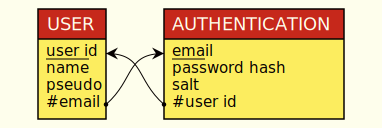


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **AUTHENTICATION** (<ins>email</ins>, password hash, salt, user id)
- **USER** (<ins>user id</ins>, name, pseudo, email)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE AUTHENTICATION (
  PRIMARY KEY (email),
  email         VARCHAR(255) NOT NULL,
  password_hash BINARY(64),
  salt          BINARY(16),
  user_id       VARCHAR(42)
);

CREATE TABLE USER (
  PRIMARY KEY (user_id),
  user_id VARCHAR(8) NOT NULL,
  name    VARCHAR(100),
  pseudo  VARCHAR(100),
  email   VARCHAR(42)
);

```

In [81]:
%%mocodo -t mld sql --colors mondrian --select all
:
USER: user id [VARCHAR(8)], name [VARCHAR(100)], pseudo [VARCHAR(100)], #email > AUTHENTICATION > email
:
AUTHENTICATION: email [VARCHAR(255)], password hash [BINARY(64)], salt [BINARY(16)], #user id > USER > user id
:

### Autres sorties relationnelles

#### Graphe des dépendances

La table A **dépend** de la table B lorsque A possède une clé étrangère qui est clé primaire de B. Cette notion est utile dans le cas où l'on doit importer une base de données à partir d'un ensemble de fichiers CSV (ou autres). Si l'on veut éviter de perdre le bénéfice du contrôles de clés étrangères (en faisant, p. ex. sous MySQL, `SET FOREIGN_KEY_CHECKS = 0`), il conviendra de lire ces fichiers dans un [ordre topologique](https://fr.wikipedia.org/wiki/Tri_topologique) quelconque. Mocodo peut générer un graphe des dépendances qui met cet ordre en évidence :

In [82]:
%mocodo -i ccp -t dependencies --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_dependencies.svg
</tt>
</span>
</div>


Même si un tel graphe n'est pas forcément [sans circuits](https://fr.wikipedia.org/wiki/Graphe_orienté_acyclique), remplir les tables dans le sens de lecture des langues latines minimisera le recours à la désactivation des contraintes de clés étrangères.

#### Diagramme relationnel / DDL BDML

D'après [son site officiel](https://dbml.dbdiagram.io) :

> DBML (_Database Markup Language_) est un DSL (langage dédié) open-source conçu pour définir et documenter les schémas et structures de base de données. Il vise la simplicité, la cohérence et la lisibilité.

Mocodo parle maintenant DBML :

In [83]:
%mocodo -i ccp -t dbml --title CCP


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_ddl.dbml
</tt>
</span>
</div>


```dbml
Table "Client" {
  "Réf. client" VARCHAR(8) [pk, not null]
  "Nom"         VARCHAR(255)
  "Prénom"      VARCHAR(255)
  "Adresse"     VARCHAR(255)
}

Table "Commande" {
  "Num. commande" VARCHAR(8) [pk, not null]
  "Date"          DATE
  "Montant"       DECIMAL(10,2)
  "Réf. client"   VARCHAR(8) [not null]
}

Table "Inclure" {
  "Num. commande" VARCHAR(8) [not null]
  "Réf. produit"  VARCHAR(8) [not null]
  "Quantité"      INTEGER
  Indexes {
    ("Num. commande", "Réf. produit") [pk]
  }
}

Table "Produit" {
  "Réf. produit"  VARCHAR(8) [pk, not null]
  "Libellé"       VARCHAR(50)
  "Prix unitaire" DECIMAL(10,2)
}

Ref:"Commande"."Réf. client" > "Client"."Réf. client"
Ref:"Inclure"."Num. commande" > "Commande"."Num. commande"
Ref:"Inclure"."Réf. produit" > "Produit"."Réf. produit"

```

À notre connaissance, il n'existe pas actuellement d'API publique de rendu des diagrammes DBML. Pour les visualiser, copiez-collez la sortie sur [Dbdiagram.io](https://dbdiagram.io/d/651077feffbf5169f065359b), ou installez un [plugin VS-Code](https://marketplace.visualstudio.com/items?itemName=nicolas-liger.dbml-viewer) :

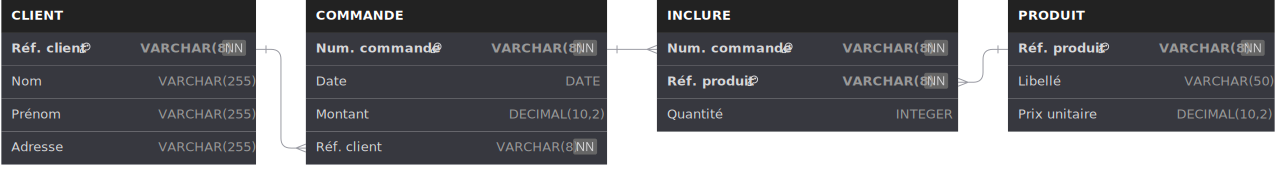

In [4]:
display.SVG("../examples/dbml.svg")

#### Diagramme relationnel D2

[D2](https://d2lang.com) est un langage de description de diagrammes de différents types. La prise en charge des diagrammes relationnels est minimale, mais le projet est jeune (actuellement en version 0.6.1, open source depuis novembre 2022). Son point fort est TALA, son algorithme de plongement **propriétaire**, que vous pouvez tester [ici](https://play.d2lang.com/?script=1JVBb9owFMfv-RRPOW0HOKBWmqg0KaLZlgkS5oZKVVVVHjWTt8QOjjmgivv4Js3n8BebYljjBDBh7NJj5Pzfe3-_n99zvTsvjDvXKApitw_PDoAuqg_5PHmU-HtCHAA3xVLQ6SIhbh9uPTT44qF3F7338Fy1oA_3maApFsvHX2R5BTMuCP3Byo-HVRmD8RTwEjPZeRKcSiNS7_KyEcqIpLUJJcyWOoxiCCfD4cpZOY47iEbj6MZHFkNCFbMuZFS9TAlMeZrxXBWmuw-nmdsTDzN5RsD5AjNJpSrcPgRh7H_2kfZ2rdZjD8X-yA9tDWOLtAtPqsiwkCQlTFoqaV522agD0rJTugx_NB5Gd2p9LjP7cpM0S_hSO6_lPdHWvXGnV6-EPGwQ-RRNUBjYCNGpMsF_EmuS9lj8exRdSs6nVBWydi2nMiVVATO-EIySBlbjQP0e-C0fzAksJbQci6rYVV70NiSNUfTVP4ry0UbsA2lH9BejVzRBkDzjLC9zWUdbjSW3BMndkoT8bxO1Rm-FJc2AIPMFzZsM3ESDQK1j66NujWKzHwLTnDMtxc273g0MqXoRVpeHGxIj79YLhkPr_P8vC-3srpblmgu4a9QFnY9QjVnzxFhw3UOLTKu3j7r-01G53ltWvVHV7kDWytqW2vdXNYG7tXvc5N2MhPqJqajVYy21kaUiV6sq4nfOnaqK_dPC1p9qJrR3Z2ra-zvsYPuEjvs03ktb_mqSlgb_BAAA__8%3D&layout=tala&theme=5&sketch=0&). Celui-ci requérant une licence payante, si vous déférez le rendu, c'est le plongement par défaut (Dagre, celui de Mermaid) qui sera utilisé.

In [9]:
%mocodo -i ccp -t d2


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_ddl.d2
</tt>
</span>
</div>


```d2
"Client": { shape: sql_table
  "Réf. client": VARCHAR(8) {constraint: PK}
  "Nom":         VARCHAR(255) 
  "Prénom":      VARCHAR(255) 
  "Adresse":     VARCHAR(255) 
}

"Commande": { shape: sql_table
  "Num. commande": VARCHAR(8) {constraint: PK}
  "Date":          DATE 
  "Montant":       DECIMAL(10,2) 
  "Réf. client":   VARCHAR(8) {constraint: [FK; NOT NULL]}
}

"Inclure": { shape: sql_table
  "Num. commande": VARCHAR(8) {constraint: [PK; FK]}
  "Réf. produit":  VARCHAR(8) {constraint: [PK; FK]}
  "Quantité":      INTEGER 
}

"Produit": { shape: sql_table
  "Réf. produit":  VARCHAR(8) {constraint: PK}
  "Libellé":       VARCHAR(50) 
  "Prix unitaire": DECIMAL(10,2) 
}

"Commande"."Réf. client" -> "Client"."Réf. client"
"Inclure"."Num. commande" -> "Commande"."Num. commande"
"Inclure"."Réf. produit" -> "Produit"."Réf. produit"

```

In [10]:
%mocodo -i ccp -t d2 --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_ddl.svg
</tt>
</span>
</div>


## Autres conversions

### Diagramme de classes UML

À tout seigneur tout honneur, Mocodo peut traduire votre MCD en UML. Ce formalisme graphique n'a, curieusement, pas de DSL textuel officiel. Nous nous rabattons donc sur le standard de fait, PlantUML :

In [85]:
%mocodo -i ccp --title CCP -t uml:plantuml=- # '-' supprime un préambule par défaut qui ne nous intéresse pas ici


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_uml.puml
</tt>
</span>
</div>


```puml
@startuml "CCP"

!define Table(x) class "x" << (T,#FFFFFF) >>
!define pk(x) <b>x</b>

Table("Client") {
    {field} + pk(Réf. client) VARCHAR(8)
    {field} + Nom         VARCHAR(255)
    {field} + Prénom      VARCHAR(255)
    {field} + Adresse     VARCHAR(255)
}

"Client" "1" --- "*" "Commande": "Passer"

Table("Commande") {
    {field} + pk(Num. commande) VARCHAR(8)
    {field} + Date          DATE
    {field} + Montant       DECIMAL(10,2)
}

"Commande" "*" --- "1..*" "Produit": "Inclure"
("Commande", "Produit") .. "Inclure"
Table("Inclure") {
    {field} + Quantité INTEGER
}

Table("Produit") {
    {field} + pk(Réf. produit)  VARCHAR(8)
    {field} + Libellé       VARCHAR(50)
    {field} + Prix unitaire DECIMAL(10,2)
}

@enduml

```

In [86]:
%mocodo -i ccp -t uml --defer --colors brewer+5


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_uml.svg
</tt>
</span>
</div>


### ERD avec la convention _Look across_

**Nouveauté de la version 4.0.** Force est de reconnaître que de nos jours, les MCD à la sauce Merise ne sont plus goûtés que par une poignée d'irréductibles Gaulois (et contractuellement leurs étudiants). Dans le cadre de son projet secret de domination planétaire, Mocodo commence à faire du pied à des notations mieux comprises du reste de l'univers.

#### Notation de Chen

Un MCD peut être converti en un ERD (_Entity-Relationship Diagram_) dans la notation de Chen, sans ses attributs ou avec :

In [87]:
%mocodo -i ccp -t chen --defer --colors ocean


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_erd_chen.svg
</tt>
</span>
</div>


In [88]:
%mocodo -i ccp -t chen:attrs --defer --colors ocean


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_erd_chen.svg
</tt>
</span>
</div>


#### Notation _crow's foot_

Dans le même ordre d'idées, Mocodo peut générer des ERD dans l'astucieuse notation introduite en 1976 par Gordon Everest. Par défaut, le format du fichier intermédiaire est là encore Graphviz :

In [89]:
%mocodo -i ccp -t crow --defer --colors brewer+3


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_erd_crow.svg
</tt>
</span>
</div>


Il est également possible de demander une sortie au format Mermaid. Vous en avez un exemple dans l'introduction, nous ne le répétons pas ici. Le DSL de Mermaid est de plus haut niveau, non encombré d'informations de style. Cependant, le format Graphviz peut être préféré pour plusieurs raisons :

- on peut lui appliquer une palette de couleurs de Mocodo (cf. ci-dessus) ;
- il gère les accents ;
- il admet la virgule dans les types (Mermaid demande [actuellement](https://github.com/mermaid-js/mermaid/issues/1546) à transformer `DECIMAL(10,2)` en `DECIMAL(10-2)`) ;
- il peut produire de meilleurs plongements (notamment en jouant sur la valeur de l'option `--seed`) ;
- ceux-ci peuvent-être rectifiés à la main (quoique péniblement).

### Dictionnaire des données

Vous pouvez extraire sous forme de table diverses informations sur les attributs de votre MCD.

Un format possible est TSV. Dans ce cas, sous Jupyter Notebook, si la bibliothèque `pandas` est installée, elle sera rendue comme un _dataframe_ :

In [90]:
%mocodo -i ccp -t data_dict:tsv


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_data_dict_3.tsv
</tt>
</span>
</div>


,Entité ou association,Libellé de l'attribut,Type
0,Client,Adresse,VARCHAR(255)
1,Client,Nom,VARCHAR(255)
2,Client,Prénom,VARCHAR(255)
3,Client,Réf. client,VARCHAR(8)
4,Commande,Date,DATE
5,Commande,Montant,"DECIMAL(10,2)"
6,Commande,Num. commande,VARCHAR(8)
7,Inclure,Quantité,INTEGER
8,Produit,Libellé,VARCHAR(50)
9,Produit,Prix unitaire,"DECIMAL(10,2)"


Le format par défaut est Markdown. Vous pouvez préciser en sous-sous-option tout ou partie des colonnes suivantes dans l'ordre où vous les souhaitez :

- `label`: le libellé de l'attribut ;
- `type` : son type ou un descriptif (auquel cas il conviendra de changer le nom de la colonne) ;
- `box` : le nom de l'entité ou association où il se trouve.

Entourez ces noms de colonnes de balises Markdown pour les mettre en forme (pas d'incidence en TSV). Faites-les suivre de `="Nom de colonne personnalisé"` pour éviter la valeur par défaut (dépendante de l'option `language`). Dans l'exemple ci-dessous, les sous-sous-options se décodent ainsi :

- `**box**="Entité ou association"` : boîtes en colonne 1, en-tête personnalisé, cellules en gras ;
- `label` : libellé des attributs en colonne 2 ;
- \``type`\``=`\``Type`\` : types en colonne 3, en-tête personnalisé et cellules dans une police non proportionnelle.

In [91]:
%mocodo -i ccp -t data_dict:**box**="Entité ou<br>association",label,`type`=`"Type de données"`


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_data_dict_3.md
</tt>
</span>
</div>


| **Entité ou<br>association** | Libellé de l'attribut | ``Type de données`` |
|:-----------------------------|:----------------------|:--------------------|
| **Client**                   | Adresse               | `VARCHAR(255)`      |
| **"**                        | Nom                   | `VARCHAR(255)`      |
| **"**                        | Prénom                | `VARCHAR(255)`      |
| **"**                        | Réf. client           | `VARCHAR(8)`        |
| **Commande**                 | Date                  | `DATE`              |
| **"**                        | Montant               | `DECIMAL(10,2)`     |
| **"**                        | Num. commande         | `VARCHAR(8)`        |
| **Inclure**                  | Quantité              | `INTEGER`           |
| **Produit**                  | Libellé               | `VARCHAR(50)`       |
| **"**                        | Prix unitaire         | `DECIMAL(10,2)`     |
| **"**                        | Réf. produit          | `VARCHAR(8)`        |


**Aménités.**

- Au format Markdown, les répétitions de cellules de la _première_ colonne sont remplacées par un guillemet itératif.
- Le tableau est automatiquement trié selon sa première, puis éventuellement deuxième et troisième colonnes.
- Si une seule colonne est demandée, la ligne d'en-tête n'est pas générée et, en Markdown, c'est une liste qui est produite.

In [92]:
%mocodo -i ccp -t data_dict:label


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_data_dict_1.md
</tt>
</span>
</div>


- Adresse
- Date
- Libellé
- Montant
- Nom
- Num. commande
- Prix unitaire
- Prénom
- Quantité
- Réf. client
- Réf. produit


**Nouveautés de la version 4.0.**
- Sélection, ordre et nommage des colonnes, mise en forme Markdown, tri, guillemets itératifs.
- Remplacement par un algorithme dédié du gabarit relationnel utilisé (abusivement) dans les versions antérieures.

### URL de partage

Vous pouvez demander à encoder le texte-source de votre MCD dans un lien vers Mocodo online, qui le composera automatiquement dans la zone d'entrée :

In [93]:
%mocodo -i ccp -t share


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_url.url
</tt>
</span>
</div>


https://www.mocodo.net/?mcd=eNptkMEKgkAQhu89xRwLJDQQwtuySgm5mEgX6bDlBgu6xrYLvZLP4Ys1ahZYt_m_Yeb_Z2glhTIBZF17W8N1UFCcSEb3JFtuV2cHWFN_ycb3e5bqrlV_OCm1eDzEjC9SjlA74DKgg4UDnge0qWuuSrGYigCYrTHFW85yhNwgCkkeoUgaZXgfNYxonJDD0nOdDTrF6lpZLXA_--wffFPdlFbipUeLc9J0LRQxy6NdlGG-qTm-4T7Kmf9BXkRV9XMT9t3xF_IJVknDpRY_gV4LRG5Z



# Mocodo pour la pédagogie

## Vue en extension

Un chiffre ou tiret bas à la fin du nom d'une boîte (entité ou association) est utilisé en interne pour distinguer cette boîte des autres, mais n'est pas affiché dans le diagramme conceptuel. Cela peut servir à produire une vue en extension d'un MCD.

Voici par exemple le MCD que j'utilise en cours pour introduire la notion d'entité faible (à gauche, vue en compréhension, à droite vue en extension):

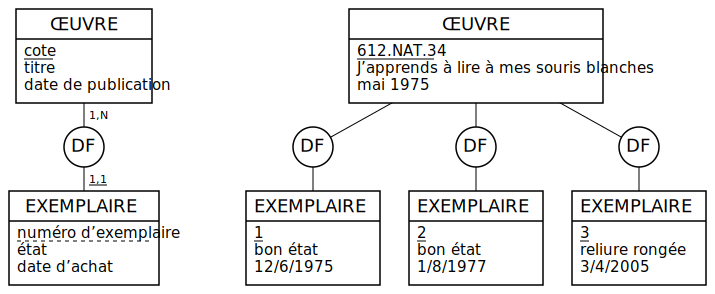

In [94]:
%%mocodo
ŒUVRE1: cote, titre, date de publication
:::
ŒUVRE2: 612.NAT.34, J'apprends à lire à mes souris blanches, mai 1975
:
  
DF, 1N ŒUVRE1, _11 EXEMPLAIRE1
::
DF, XX ŒUVRE2, XX EXEMPLAIRE2
DF, XX ŒUVRE2, XX EXEMPLAIRE3
DF, XX ŒUVRE2, XX EXEMPLAIRE4

EXEMPLAIRE1: numéro d'exemplaire, état, date d'achat
::
EXEMPLAIRE2: 1, bon état, 12/6/1975
EXEMPLAIRE3: 2, bon état, 1/8/1977
EXEMPLAIRE4: 3, reliure rongée, 3/4/2005

Mocodo n'interdit pas la conversion en relationnel d'un tel MCD, mais celle-ci n'a aucun sens.

Si l'on veut garder les cardinalités sans les afficher, on peut les préfixer d'un `-`. Le résultat de la conversion en relationnel peut alors être interprété comme l'ensemble des lignes des différentes tables.

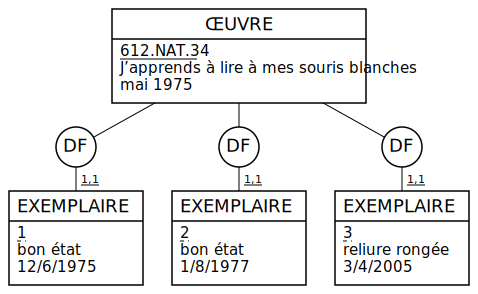

- **EXEMPLAIRE** (<ins>_#612.NAT.34_</ins>, <ins>1</ins>, bon état, 12/6/1975)
- **EXEMPLAIRE** (<ins>_#612.NAT.34_</ins>, <ins>2</ins>, bon état, 1/8/1977)
- **EXEMPLAIRE** (<ins>_#612.NAT.34_</ins>, <ins>3</ins>, reliure rongée, 3/4/2005)
- **ŒUVRE** (<ins>612.NAT.34</ins>, J'apprends à lire à mes souris blanches, mai 1975)


In [95]:
%%mocodo -t
ŒUVRE: 612.NAT.34, J'apprends à lire à mes souris blanches, mai 1975
  
DF, -1N ŒUVRE, -_11 EXEMPLAIRE1
DF, -1N ŒUVRE, -_11 EXEMPLAIRE2
DF, -1N ŒUVRE, -_11 EXEMPLAIRE3

EXEMPLAIRE1: 1, bon état, 12/6/1975
EXEMPLAIRE2: 2, bon état, 1/8/1977
EXEMPLAIRE3: 3, reliure rongée, 3/4/2005

## MCD interactif

### Afficher des explications au survol

Les débutants ont souvent des doutes sur la sémantique de telle ou telle cardinalité. Cette information peut être incluse dans le texte-source en annotant les pattes correspondantes. Survolez les cardinalités du MCD ci-dessous pour faire apparaître leur description.

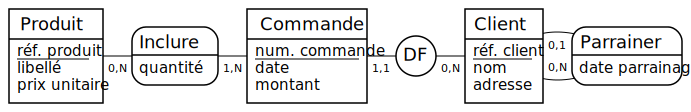

In [96]:
%%mocodo
Produit: réf. produit, libellé, prix unitaire
Inclure, 1N [Une commande inclut au moins un produit.] Commande, 0N [Un produit peut être commandé un nombre quelconque de fois.] Produit: quantité
Commande: num. commande, date, montant
DF, 0N [Un client peut passer zéro (prospect) ou plusieurs commandes.] Client, 11 [Une commande est passée par un et un seul client.] Commande
Client: réf. client, nom, adresse
Parrainer, 01 [Un client peut avoir été parrainé ou non.] Client, 0N [Un client peut parrainer d'autres clients.] Client : date parrainage

Remarquez que la syntaxe est la même que pour les rôles, qui sont en plus utilisés lors du passage au relationnel. Comment Mocodo fait-il la différence ? En appliquant les règles suivantes :

- si la note de patte commence par `+` ou `-`, c'est un rôle.
- sinon, si elle ne contient aucun espace, c'est un rôle.
- sinon, c'est une description de cardinalité.

Le même principe s'applique aux contraintes (survolez le Ⓘ) :

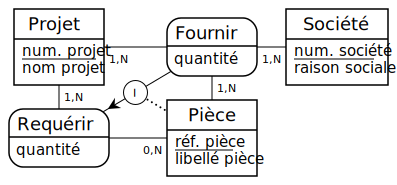

In [97]:
%%mocodo
Projet: num. projet, nom projet
:
Fournir, 1N Projet, 1N Pièce, 1N Société: quantité
Société: num. société, raison sociale

Requérir, 1N Projet, 0N Pièce: quantité
:
Pièce: réf. pièce, libellé pièce

(I) [Toute pièce fournie doit avoir été requise.] ..Pièce, ->Requérir, --Fournir, Projet

**Limitations.**
- Non pris en charge par les éditeurs de SVG comme Inkscape.
- Ne semble pas fonctionner dans une page HTML statique (comme la version HTML de ce document sous GitHub).
- Nécessite de faire confiance à un notebook (Trust notebook) pour s'afficher à la réouverture.

### Dévoiler un MCD par étapes

**Nouveauté de la version 3.** Il est possible de faire apparaître progressivement les différentes « boîtes » constituant un MCD. Pour cela, il suffit d'indenter (décaler vers la droite à l'aide d'espaces ou de tabulations) au moins une ligne. Les éléments correspondants seront alors répartis sur autant de « calques » qu'il y a de niveaux d'indentations.

Voici par exemple un exercice consistant en la description du « réel perçu » d'une entreprise de VPC :

> 1. Un produit est connu par une référence, un libellé et un prix unitaire.
> 1. Toute commande inclut un produit ou plusieurs, chacun en une certaine quantité.
> 1. Un client peut passer zéro (_client potentiel_) ou plusieurs commandes.
> 1. Un client peut entrer dans la base par parrainage d'un autre client.

L'enseignant peut le présenter pas à pas en suivant les étapes de l'énoncé :

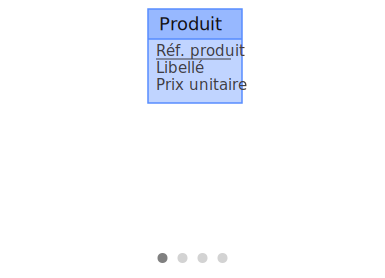

In [98]:
%%mocodo --colors ocean
      Parrainer, 01 Client, 0N Client : date parrainage
Produit: Réf. produit, Libellé, Prix unitaire
  Inclure, 1N Commande, 0N Produit: Quantité
 
    Client: Réf. client, Nom, Prénom, Adresse
    DF, 0N Client, 11 Commande
  Commande: Num. commande, Date, Montant

**Remarques.**
- Pas de règle sur la taille de l'indentation. Pour Mocodo, autant de niveaux d'indentation distincts, autant de calques.
- Les différents calques sont codés directement dans le SVG. L'interaction ne nécessite donc aucun logiciel spécifique.
- Sous Mocodo online, le MCD est toujours présenté entièrement dévoilé. Cela permet de voir directement le résultat d'une modification du texte-source.
- Pour ajouter facilement de l'interactivité à un MCD existant :
    1. commencez par indenter au maximum toutes les lignes ;
    1. effacez l'indentation des lignes du premier calque ;
    1. décalez votre curseur de $n$ caractères vers la droite ;
    1. placez-vous tour à tour sur les lignes à intégrer au deuxième calque et effacez les espaces surnuméraires ;
    1. recommencez à l'étape 3 jusqu'au dernier calque.
    
  Depuis la version 4.0, l'éditeur de Mocodo online vous permet de créer des curseurs multiples, ce qui simplifie encore ces opérations.

**Limitations.**
- Pas de granularité plus fine que la ligne (entité ou association avec toutes ses pattes et cardinalités).
- Pas de prise en charge des touches directionnelles. Cela serait sans doute possible, mais difficilement compatible avec la présence de plusieurs MCD interactifs sur une même page (comme dans cette documentation).

**Éviter qu'une interaction sur un SVG ne s'applique à un autre.**

Dans le cas très rare où plusieurs SVG interactifs générés **à partir du même texte-source** coexistent sur une même page web, une interaction opérée sur l'un s'applique également à tous les autres. Par exemple, cliquer sur l'un des ronds gris de l'une des figures ci-dessous agira sur les deux figures :

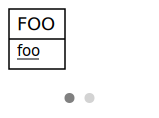

In [99]:
%%mocodo
FOO: foo
  BAR: bar

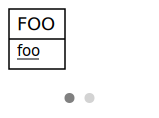

In [100]:
%%mocodo
FOO: foo
  BAR: bar

Ce problème trahit une « collision » : différents éléments du [DOM](https://fr.wikipedia.org/wiki/Document_Object_Model) se sont vus attribuer la même empreinte (obtenue par hachage du texte-source). La solution est de passer un entier discriminant qui, par concaténation, fera de ces empreintes de véritables identifiants.

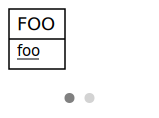

In [101]:
%%mocodo --uid_suffix 1
FOO: foo
  BAR: bar

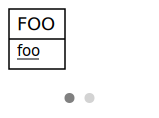

In [102]:
%%mocodo --uid_suffix 2
FOO: foo
  BAR: bar

## Explications du passage au relationnel

Les gabarits de conversion en MLD (à savoir `html`, `markdown`, `latex` et `text`) admettent une sous-sous-option `e` qui accompagne le résultat par des explications détaillées du mécanisme de passage :

In [103]:
%mocodo -i ccp -t markdown:e


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_mld.md
</tt>
</span>
</div>


- **Client** (<ins>Réf. client</ins>, Nom, Prénom, Adresse)
  - Le champ _Réf. client_ constitue la clé primaire de la table. C'était déjà un identifiant de l'entité _Client_.
  - Les champs _Nom_, _Prénom_ et _Adresse_ étaient déjà de simples attributs de l'entité _Client_.

- **Commande** (<ins>Num. commande</ins>, Date, Montant, _#Réf. client_)
  - Le champ _Num. commande_ constitue la clé primaire de la table. C'était déjà un identifiant de l'entité _Commande_.
  - Les champs _Date_ et _Montant_ étaient déjà de simples attributs de l'entité _Commande_.
  - Le champ _Réf. client_ est une clé étrangère. Il a migré par l'association de dépendance fonctionnelle _Passer_ à partir de l'entité _Client_ en perdant son caractère identifiant.

- **Inclure** (<ins>_#Num. commande_</ins>, <ins>_#Réf. produit_</ins>, Quantité)
  - Le champ _Num. commande_ fait partie de la clé primaire de la table. C'est une clé étrangère qui a migré directement à partir de l'entité _Commande_.
  - Le champ _Réf. produit_ fait partie de la clé primaire de la table. C'est une clé étrangère qui a migré directement à partir de l'entité _Produit_.
  - Le champ _Quantité_ était déjà un simple attribut de l'association _Inclure_.

- **Produit** (<ins>Réf. produit</ins>, Libellé, Prix unitaire)
  - Le champ _Réf. produit_ constitue la clé primaire de la table. C'était déjà un identifiant de l'entité _Produit_.
  - Les champs _Libellé_ et _Prix unitaire_ étaient déjà de simples attributs de l'entité _Produit_.


Nous avons essayé d'être aussi précis que possible, tout en « factorisant » avec soin les lignes consécutives suseptibles de l'être. Vous pouvez adapter ces explications à votre enseignement en modifiant une copie du gabarit `html-ce.yaml`, dont les autres sont dérivés.

## MCD à compléter

Les MCD à trous sont des exercices classiques d'introduction aux bases de données.

### Supprimer le marquage d'un identifiant

Pour éviter le marquage automatique du premier attribut d'une entité comme identifiant, il suffit de le préfixer par un tiret bas (`_`) : ce caractère est donc un commutateur, qui souligne un attribut non souligné par défaut, et désouligne un attribut souligné par défaut.

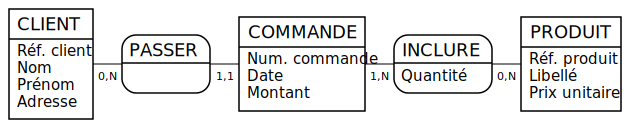

In [104]:
%%mocodo
CLIENT: _Réf. client, Nom, Prénom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: _Num. commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité
PRODUIT: _Réf. produit, Libellé, Prix unitaire

### Masquer un couple de cardinalités

Vous pouvez masquer n'importe quelles cardinalités en les remplaçant par `XX` ou en les préfixant d'un `-` :

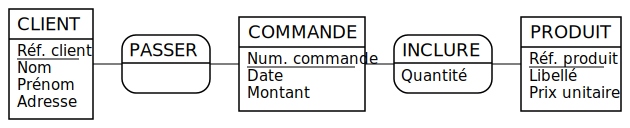

In [105]:
%%mocodo
CLIENT: Réf. client, Nom, Prénom, Adresse
PASSER, XX CLIENT, XX COMMANDE
COMMANDE: Num. commande, Date, Montant
INCLURE, -1N COMMANDE, -0N PRODUIT: Quantité
PRODUIT: Réf. produit, Libellé, Prix unitaire

**Nouveauté de la version 4.0.** Si la cardinalité comporte un et un seul `X`, l'autre caractère sera affiché tout seul.

### Masquer un attribut

Vous pouvez mettre deux virgules consécutives pour réserver la place d'un attribut manquant. Les espaces insécables sont préservés, ce qui permet de réserver plus d'espace horizontal, cf. ci-dessous premier attribut vide de INCLURE.

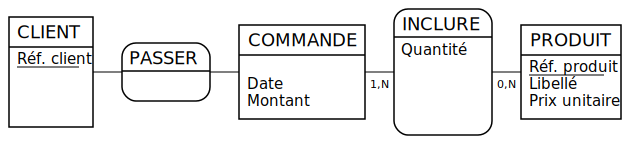

In [106]:
%%mocodo
CLIENT: Réf. client,,, 
PASSER, XX CLIENT, XX COMMANDE
COMMANDE: , Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité,,,,
PRODUIT: Réf. produit, Libellé, Prix unitaire

**Régression de la version 4.0.** Les espaces insécables ne sont plus préservés. Il n'y a donc plus d'autre moyen de réserver davantage d'espace horizontal que d'employer le style `blank` (paragraphe suivant).

### Ne faire apparaître que le squelette du schéma conceptuel

Vous pouvez transformer en exercice à trous n'importe quel MCD en rendant complètement transparentes les couleurs des attributs, associations et cardinalités. Le style `blank` a été prédéfini à cet effet:

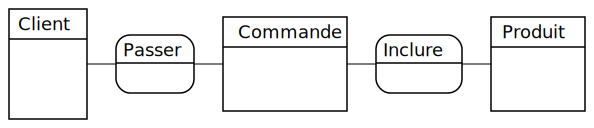

In [107]:
%mocodo -i ccp --colors=blank

Attention, n'utilisez cette méthode que pour la projection : l'information textuelle est toujours présente, susceptible d'être sélectionnée et collée ailleurs. Vous pouvez bien sûr empêcher cette possibilité en convertissant le SVG en PNG, mais le plus simple est d'appliquer une réécriture `empty` :

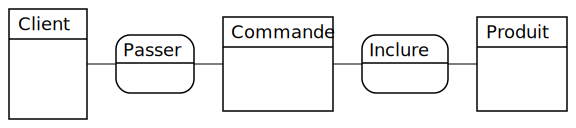


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp.mcd
</tt>
</span>
</div>


%%mocodo 
Client:  ,  ,  ,  
Passer, XX Client, XX Commande
Commande:  ,  ,  
Inclure, XX Commande, XX Produit:  
Produit:  ,  ,


In [108]:
%mocodo -i ccp -t empty # équivalent de "delete:types,notes,attrs,cards"

## Obfuscation d'un MCD donné

Obfusquer un MCD consiste à vider celui-ci de sa sémantique de surface en substituant des chaînes aléatoires à tous les libellés. Cela permet de créer des exemples d'illustration de telle ou telle notion « pure » sans risquer de voir son public se focaliser sur des détails-métier (c'est l'équivalent de la [variable méta-syntaxique](https://fr.wikipedia.org/wiki/Variable_métasyntaxique) `foobar` dans le contexte de la pédagogie de la programmation).

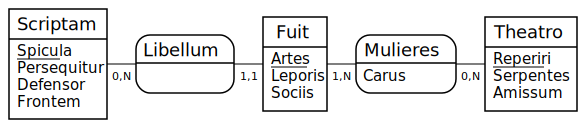

In [3]:
%mocodo -i ccp --seed=1 --select mcd -t obfuscate  # raccourci pour "obfuscate:labels"

En argument, vous pouvez ajouter le chemin d'un fichier texte quelconque où puiser les mots de substitution. Par exemple, le texte du `README` de ce projet :

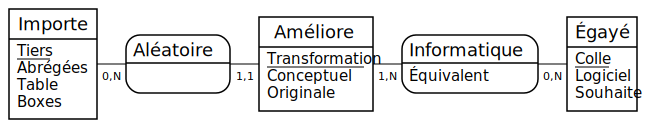

In [110]:
%mocodo -i ccp -t obfuscate:labels=../../README.md --seed=1 --select mcd

Mocodo essaie d'abord de trouver ce fichier à l'endroit indiqué. En cas d'échec, il le cherche (avec extension `.txt` facultative) parmi ceux distribués avec le logiciel, à savoir:

- `"lorem.txt"` (6464 mots) : le [faux-texte](https://fr.wikipedia.org/wiki/Faux-texte) le plus courant, augmenté d'une sélection des 10000 mots latins les plus courants [compilés par Kyle P. Johnson](https://kyle-p-johnson.com/blog/2015/04/23/most-common-greek-latin-words.html), le tout privé de ses doublons et des mots de moins de 3 lettres (`"lorem_ipsum.txt"` avant la version 4.0).
- `"fr.txt"` (3396 mots) : une liste des 4000 mots français les plus courants, privée de ceux comportant une apostrophe ou moins de 4 lettres. Source : http://wortschatz.uni-leipzig.de/index.html _via_ [Wikitionary](https://fr.wiktionary.org/wiki/Wiktionnaire:Listes_de_fréquence). Nouveauté de la version 4.0.
- `"fr5.txt"` (464 mots): la liste de `"fr.txt"`, restreinte aux mots de 5 lettres. Nouveauté de la version 4.0.
- `"en4.txt"` (640 mots): une sélection (SFW) de mots anglais de quatre lettres (`"four_letter_words.txt"` avant la version 4.0).
- `"disparition.txt"` (7489 mots) : le lexique du [célèbre roman lipogrammatique](https://fr.wikipedia.org/wiki/La_Disparition_&#40;roman&#41;) de Georges Perec, privé des mots de moins de 4 lettres.

En cas de nouvel échec, il se rabat sur `"lorem.txt"`.

**NB.** L'algorithme s'assure que la [distance de Damerau-Levenshtein](https://fr.wikipedia.org/wiki/Distance_de_Damerau-Levenshtein) entre deux libellés de substitution quelconques est d'au moins 3. En clair, cela signifie que, si vous donnez en examen un exercice de conversion en relationnel basé sur un tel MCD, les erreurs de transcription d'un étudiant stressé, inattentif, illettré, dyslexique, roublard, ou tout cela à la fois, ne devraient pas vous empêcher de lui octroyer les points qui lui reviennent.

## Croissance stochastique

Vous pouvez créer un MCD partiellement aléatoire à partir d'un MCD donné en lui ajoutant un nombre `n` d'associations (avec les entités nécessaires) :

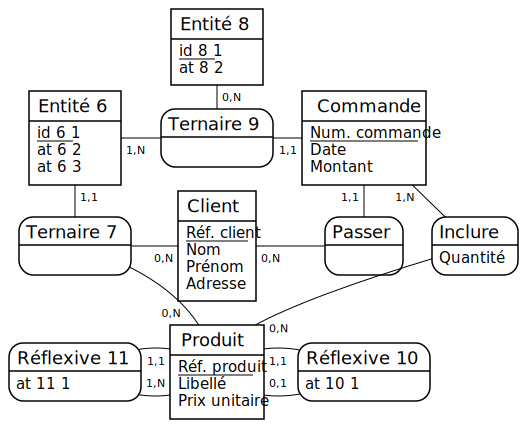

In [111]:
%mocodo -i ccp -t grow:n=4 arrange --seed=1 --select mcd

- Des sous-options pré-définies (données ci-dessous avec leur valeur par défaut après le `=`) permettent de spécifier finement le nombre désiré :
  - d'associations réflexives (`arity_1=2`) ;
  - d'associations ternaires (`arity_3=2`) ;
  - d'associations quaternaires (`arity_4=0`) ;
  - d'associations doubles, i.e., associant le même couple d'entités (`doubles=1`) ;
  - d'identifiants composites (`composites=1`) ;
  - d'attributs maximum par entité (`ent_attrs=4`) ;
  - d'attributs maximum par association (`assoc_attrs=2`).

- On ne peut pas préciser directement le nombre d'associations binaires : si le nombre total des autres associations spécifiées n'arrivent pas à `n`, elles viennent en complément.

- Des sous-options de forme plus ou moins libre décrivent les cardinalités. Par exemple, `_11-*N=2` créera deux entités faibles et `/*N-*N` un agrégat. Les associations de complément sont `*N-*N`.

Avec la sous-option `from_scratch`, le MCD de départ est vide. À titre d'exemple, voici la transformation complexe invoquée par Mocodo online pour créer un MCD d'entraînement à la conversion au relationnel, accompagné de cette dernière. Notez la création de rôles par défaut : ils permettent de simuler le rétablissement de la sémantique des associations disparues.

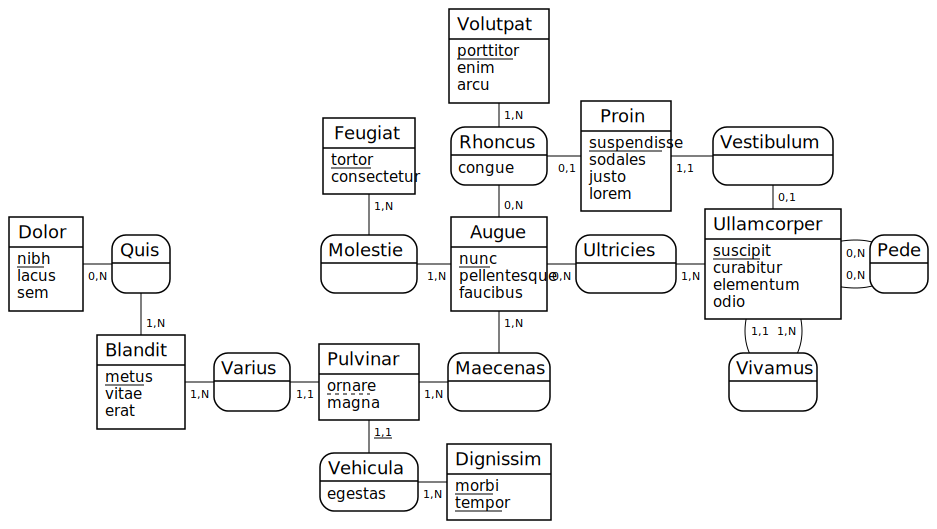

- **Augue** (<ins>nunc</ins>, pellentesque, faucibus)
- **Blandit** (<ins>metus</ins>, vitae, erat)
- **Dolor** (<ins>nibh</ins>, lacus, sem)
- **Feugiat** (<ins>tortor</ins>, consectetur)
- **Maecenas** (<ins>_#nunc_</ins>, <ins>_#morbi_</ins>, <ins>_#tempor_</ins>, <ins>_#ornare_</ins>)
- **Molestie** (<ins>_#tortor_</ins>, <ins>_#nunc_</ins>)
- **Pede** (<ins>_#suscipit 1_</ins>, <ins>_#suscipit 2_</ins>)
- **Proin** (<ins>suspendisse</ins>, sodales, justo, lorem, _#porttitor rhoncus_, _#nunc rhoncus_, congue, _#suscipit_)
- **Pulvinar** (<ins>morbi vehicula</ins>, <ins>tempor vehicula</ins>, <ins>ornare</ins>, magna, _#metus varius_, egestas)
- **Quis** (<ins>_#metus_</ins>, <ins>_#nibh_</ins>)
- **Ullamcorper** (<ins>suscipit</ins>, curabitur, elementum, odio, _#suscipit vivamus_)
- **Ultricies** (<ins>_#suscipit_</ins>, <ins>_#nunc_</ins>)
- **Volutpat** (<ins>porttitor</ins>, enim, arcu)


In [112]:
%mocodo --seed=2 --mld -t grow:from_scratch,arity_3=1,_11-*N=1 obfuscate create:roles lower:roles arrange

Il n'est pas impossible que le MCD résultant soit incorrect (p. ex., apparition d'une identification relative circulaire), mais les contrôles effectués _a priori_ et _a posteriori_ devraient dans la majorité des cas produire quelque chose de raisonnable.

## Génération d'un QR code

Impressionnez votre public en accompagnant l'option `-t share` de `--defer` :

In [113]:
%mocodo -i ccp -t share --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
ccp_url.svg
</tt>
</span>
</div>


Comme il faut un mobile pour scanner ce QR code, et que Mocodo online n'est pas vraiment adapté aux mobiles, l'intérêt réel de cette fonctionnalité est pour l'instant assez limité.

# Compléments sur l'aspect visuel

## Styles

Plusieurs styles prédéfinis sont distribués avec l'application. Un style se définit comme la combinaison d'une palette de couleurs (répertoire `colors`) avec un dictionnaire de polices et de dimensions (répertoire `shapes`).

Vous pouvez bien sûr créer vos propres styles en vous inspirant des fichiers fournis. Si vous êtes particulièrement content d'un style, soumettez-le pour inclusion dans une prochaine distribution.

**Réglages.** Une approximation de la largeur des caractères des différentes polices a été pré-calculée sous macOS. Il est possible qu'elle soit inexacte, en particulier sous Windows ou Linux. Dans ce cas, en particulier, les traits de soulignement n'atteindront pas ou excéderont la largeur des libellés soulignés. Vous pouvez contourner le problème en appliquant un facteur multiplicatif avec l'argument `--adjust_width`).

## Paramétrage du réarrangement automatique

Il est possible de demander à Mocodo de chercher tout seul une « bonne » permutation des définitions des boîtes, ce qui à la main deviendrait vite difficile.

Le critère que nous avons retenu pour évaluer la qualité du tracé est double :

1. les liens ne doivent pas se couper ;
2. leur longueur cumulée doit être minimale.

Actuellement, deux algorithmes d'arrangement sont fournis :

- un algorithme exact (`bb`, pour _Branch & Bound_), qui ne trouve que des solutions satisfaisant au premier critère ;
- un algorithme approché (`ga`, pour _Genetic Algorithm_), réservé aux cas où il est impossible d'y satisfaire. L'algorithme va alors chercher des solutions où les liens se coupent seulement le moins possible.

**Remarque.** Mocodo met en œuvre une technique de réarrangement originale : en contraignant la position des boîtes aux intersections d'une grille invisible, il transforme un classique [problème de plongement](https://en.wikipedia.org/wiki/Graph_embedding) en un [problème d'affectation](https://fr.wikipedia.org/wiki/Problème_d%27affectation), ce qui permet de satisfaire de façon efficace à un certain nombre de contraintes esthétiques pertinentes (planarité, compacité, etc.).

Nous illustrerons les algorithmes et leurs paramètres sur le MCD d'accueil de Mocodo online.

Le réarrangement peut se faire automatiquement sur un nombre de rangées et de colonnes au rapport « équilibré » (i.e., proche du [nombre d'or](https://fr.wikipedia.org/wiki/Nombre_d%27or)), ou au contraire spécifié par l'utilisateur. Ici, on constate que le MCD résultant consiste en un « chapelet » d'entités et d'associations. On peut donc demander à l'arranger en pleine largeur :

### Méthode exacte (_branch & bound_)

#### Arrangement non contraint (par défaut)

Le réarrangement dit organique consiste à choisir une première boîte au hasard, puis à essayer d'agréger les autres sans se préoccuper de contenir le tout dans une grille prédéterminée :

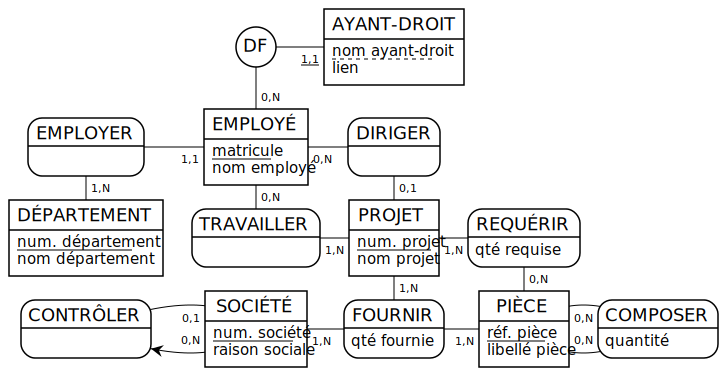

In [114]:
%mocodo -i ../examples/landing --select mcd --seed=2 -t arrange

Cela donne un plongement sur une grille $5\times4$, ce qui est loin d'être optimal. Cependant, l'arrangement organique fournit souvent un bon point de départ pour chercher soi-même une permutation plus esthétique ou mettant en évidence certaines propriétés du MCD.

#### Arrangement dans la grille courante

Le réarrangement automatique des boîtes peut s'opérer dans les limites de la grille courante ; c'est-à-dire que le MCD résultant aura (au plus) le même nombre de colonnes et de rangées que le texte de départ (ici, $4\times5$) :

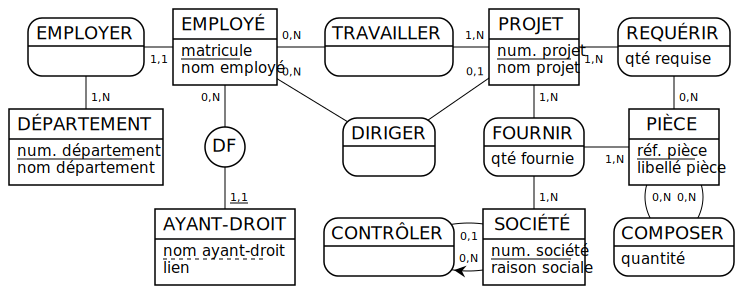

In [115]:
%mocodo -i ../examples/landing --select mcd --seed=2 -t arrange:current

#### Arrangement en privilégiant la largeur

Dans un document paginé, on cherche en général à utiliser en priorité l'espace horizontal. La version 4.0 introduit à cet effet une option de réarrangement « en largeur d'abord » :

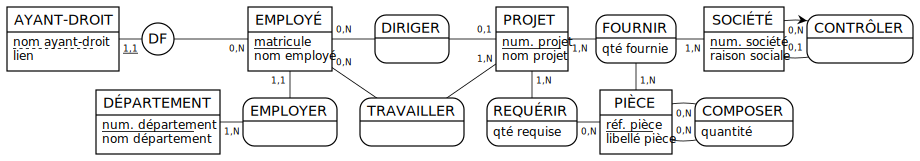

In [117]:
%mocodo -i ../examples/landing --select mcd --seed=2 -t arrange:wide=8 --scale 0.8

Ici, l'utilisateur a demandé $8$ boîtes en largeur (c'est aussi la valeur par défaut). L'algorithme commence par calculer le nombre de lignes minimal correspondant, sachant qu'il a $14$ boîtes à placer : c'est $\lceil14/8\rceil=2$. Il cherche donc un plongement sur une grille $8\times2$.

#### Arrangement dans une grille équilibrée minimale

On peut chercher à faire tenir le MCD dans la plus petite grille possible, tout en maintenant un rapport « équilibré » entre hauteur et largeur. Par exemple, un MCD de 13 boîtes (entités ou associations) peut tenir dans les grilles:

- $13\times1$;
- $7\times2$, ce qui laisse 1 case vide;
- $5\times3$, ce qui laisse 2 cases vides;
- $4\times4$, ce qui laisse 3 cases vides;
- etc.

Les deux premières grilles étant non équilibrées, on retiendra la plus petite des suivantes, de dimensions $5\times3$.

La table ci-dessous énumère les dimensions des grilles minimales d'équilibre supérieur à 0,5 pour tous les MCD comportant moins de 100 boîtes. On peut y vérifier par exemple que le MCD de taille 13 (en gras) se trouve effectivement aux coordonnées (5, 3).

|  | **1** | **2** | **3** | **4** | **5** | **6** | **7** | **8** | **9** | **10** | **11** | **12** | **13** |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **1** | 1 | 2 | 3 |  |  |  |  |  |  |  |  |  |  |
| **2** |  | 4 | 5, 6 |  |  |  |  |  |  |  |  |  |  |
| **3** |  |  | 7, 8, 9 | 10, 11, 12 | **13**, 14, 15 |  |  |  |  |  |  |  |  |
| **4** |  |  |  | 16 | 17, 18, 19, 20 | 21, 22, 23, 24 | 26, 27, 28 |  |  |  |  |  |  |
| **5** |  |  |  |  | 25 | 29, 30 | 31, 32, 33, 34, 35 | 37, 38, 39, 40 | 43, 44, 45 |  |  |  |  |
| **6** |  |  |  |  |  | 36 | 41, 42 | 46, 47, 48 | 50, 51, 52, 53, 54 | 57, 58, 59, 60 | 65, 66 |  |  |
| **7** |  |  |  |  |  |  | 49 | 55, 56 | 61, 62, 63 | 67, 68, 69, 70 | 73, 74, 75, 76, 77 | 82, 83, 84 | 91 |
| **8** |  |  |  |  |  |  |  | 64 | 71, 72 | 78, 79, 80 | 85, 86, 87, 88 | 92, 93, 94, 95, 96 |  |
| **9** |  |  |  |  |  |  |  |  | 81 | 89, 90 | 97, 98, 99 |  |  |
| **10** |  |  |  |  |  |  |  |  |  | 100 |  |  |  |

Le MCD d'accueil ayant déjà été arrangé avec l'option `-t arrange:balanced`, nous ne le reproduisons pas ici. Sachez cependant qu'au cas où, pour une raison ou une autre, la plus petite grille équilibrée ne convient pas, il est possible de passer à la $i^\text{e}$ suivante en mettant $i$ en sous-sous-argument. Ici, pour $14$ boîtes, `balanced=1` permet donc de passer de la grille $5\times3$ (prévue pour $13$, $14$ et $15$ boîtes) à la grille $4\times4$ (prévue pour $16$ boîtes).

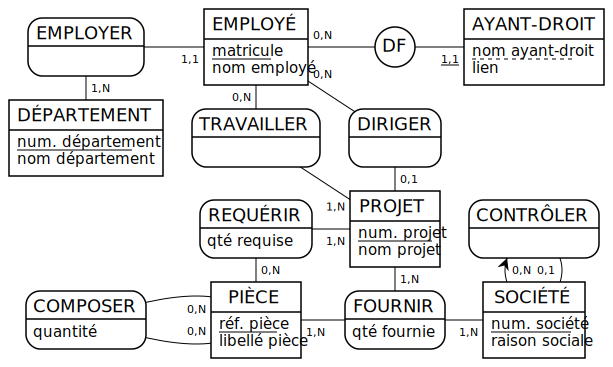

In [118]:
%mocodo -i ../examples/landing --select mcd --seed=1 -t arrange:balanced=1

 #### Limitations de la méthode exacte

Le réarrangement exact ne fonctionnera jamais sur les MCD non planaires ou n'admettant aucun plongement planaire dans les limites de la grille spécifiée (par les sous-options `current`, `wide` ou `balanced`).

Rappelons qu'un graphe est dit [planaire](https://fr.wikipedia.org/wiki/Graphe_planaire) lorsqu'il en existe au moins un arrangement sans croisement. Le graphe non planaire comportant le plus petit nombre de liens est connu sous le doux nom de [$K_{3,3}$](https://www.rodhilton.com/2011/10/29/why-the-complete-bipartite-graph-k33-is-not-planar/) :

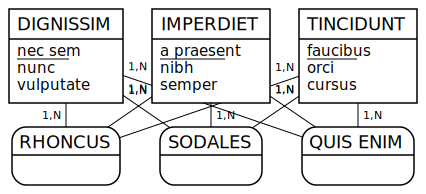

In [119]:
%%mocodo
DIGNISSIM: nec sem, nunc, vulputate
IMPERDIET: a praesent, nibh, semper
TINCIDUNT: faucibus, orci, cursus

RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

Son réarrangement par _Branch & bound_ échouera donc nécessairement :

In [120]:
%mocodo -i sandbox --seed=1 -t arrange:balanced

Mocodo Err.9 - Impossible de calculer un plongement planaire satisfaisant la contrainte
donnée.


Comme on voit, Mocodo ne cherche pas à savoir si la non-planarité est intrinsèque au graphe, ou résulte des dimensions de la grille imposée pour le plongement. Pour en avoir le cœur net, tentez un arrangement non contraint :

In [121]:
%mocodo -i sandbox --seed=1 -t arrange

Mocodo Err.41 - Impossible de calculer un plongement planaire.


**NB.** Plusieurs paramètres permettent de régler le fonctionnement de l'algorithme génétique :

- `call_limit` : nombre maximal d'appels pour une boîte de départ donnée (défaut: `10000`).
- `min_objective` : meilleur objectif esthétique pour la mise en page (défaut: `0`).
- `max_objective` : pire objectif esthétique pour la mise en page (défaut: `15`).

Réservés aux spécialistes, ils ne sont pas décrits dans cette documentation.

### Méthode heuristique (algorithme génétique)

Dans tous les cas où la méthode exacte ne produit pas de résultat satisfaisant, on pourra se rabattre sur une heuristique qui, au lieu d'interdire les croisements, cherchera simplement à en minimiser le nombre.

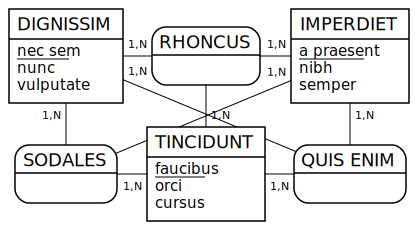


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo --seed=1
DIGNISSIM: nec sem, nunc, vulputate
RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
IMPERDIET: a praesent, nibh, semper

SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
TINCIDUNT: faucibus, orci, cursus
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT


In [122]:
%mocodo -i sandbox --seed=1 -t arrange:algo=ga

L'amélioration ne saute pas forcément aux yeux, mais il n'y a plus que trois croisements au lieu de neuf. Ce plongement constitue en tout cas un bon point de départ pour un réarrangement manuel. Il ne reste en effet plus qu'à insérer quelques boîtes invisibles:

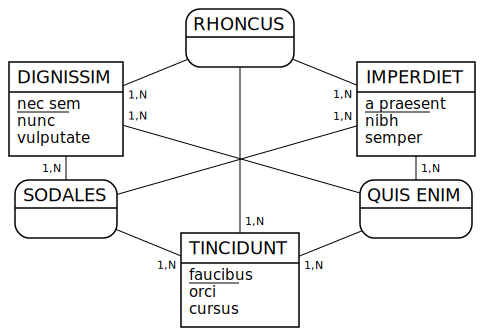

In [123]:
%%mocodo
RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

DIGNISSIM: nec sem, nunc, vulputate
:::
IMPERDIET: a praesent, nibh, semper

SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
:::
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

TINCIDUNT: faucibus, orci, cursus

**NB.** Plusieurs paramètres permettent de régler le fonctionnement de l'algorithme génétique :

- `population_size` : nombre d'individus à faire évoluer (défaut: `1000`).
- `crossover_rate` : taux de croisement, entre 0 et 1 (défaut: `0.9`).
- `mutation_rate` : taux de mutation, entre 0 et 1 (défaut: `0.06`).
- `sample_size` : taille de l'échantillon pour les tournois (défaut: `7`).
- `max_generations` : nombre maximal de générations (défaut: `300`).
- `plateau` : nombre maximal de générations consécutives sans amélioration (défaut: `30`).

Réservés aux spécialistes, ils ne sont pas décrits dans cette documentation.

## Amélioration du plongement par création d'entités homonymes

Une entité liée à de nombreuses associations peut limiter ou même empêcher les possibilités de réarrangement sans croisements. Lorsque cette entité est indépendante et réduite à son identifiant, elle est vouée à disparaître lors du passage au relationnel. Il n'y a donc aucun inconvénient à en créer plusieurs, et cela peut avoir l'avantage de faciliter (ou même de rendre possible) l'obtention d'une bonne mise en page.

Le cas typique est celui d'une entité DATE réduite à un identifiant _date_, qui peut être associée à un grand nombre d'entités n'ayant rien à voir entre elles. Même avec une arité très modeste de 3, elle peut perturber le plongement :

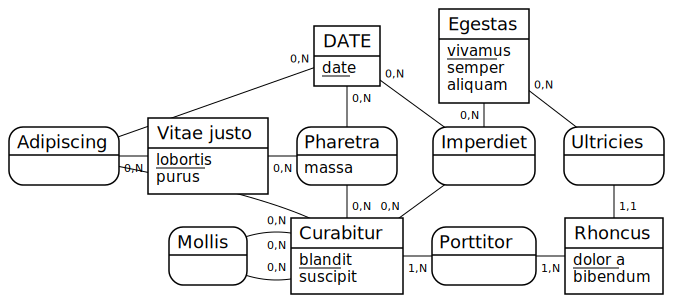

- **Adipiscing** (<ins>_#blandit_</ins>, <ins>_#lobortis_</ins>, <ins>date</ins>)
- **Curabitur** (<ins>blandit</ins>, suscipit)
- **Egestas** (<ins>vivamus</ins>, semper, aliquam)
- **Imperdiet** (<ins>_#vivamus_</ins>, <ins>_#blandit_</ins>, <ins>date</ins>)
- **Mollis** (<ins>_#blandit 1_</ins>, <ins>_#blandit 2_</ins>)
- **Pharetra** (<ins>_#blandit_</ins>, <ins>date</ins>, <ins>_#lobortis_</ins>, massa)
- **Porttitor** (<ins>_#dolor a_</ins>, <ins>_#blandit_</ins>)
- **Rhoncus** (<ins>dolor a</ins>, bibendum, _#vivamus_)
- **Vitae justo** (<ins>lobortis</ins>, purus)


In [129]:
%%mocodo -t
:
:
DATE: date
Egestas: vivamus, semper, aliquam
:

Adipiscing, 0N Curabitur, 0N Vitae justo, 0N DATE
Vitae justo: lobortis, purus
Pharetra, 0N Curabitur, 0N DATE, 0N Vitae justo: massa
Imperdiet, 0N Egestas, 0N Curabitur, 0N DATE
Ultricies, 11 Rhoncus, 0N Egestas

:
Mollis, 0N Curabitur, 0N Curabitur
Curabitur: blandit, suscipit
Porttitor, 1N Rhoncus, 1N Curabitur
Rhoncus: dolor a, bibendum

La monnayer en deux entités DATE1 et DATE2 permettra une mise en page à la fois plus agréable à l'œil et plus compacte (à savoir, $4\times3$ au lieu de $5\times3$), le tout sans impact sur le schéma relationnel :

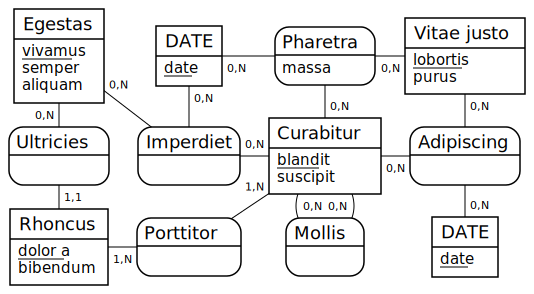

- **Adipiscing** (<ins>_#blandit_</ins>, <ins>_#lobortis_</ins>, <ins>date</ins>)
- **Curabitur** (<ins>blandit</ins>, suscipit)
- **Egestas** (<ins>vivamus</ins>, semper, aliquam)
- **Imperdiet** (<ins>_#vivamus_</ins>, <ins>_#blandit_</ins>, <ins>date</ins>)
- **Mollis** (<ins>_#blandit 1_</ins>, <ins>_#blandit 2_</ins>)
- **Pharetra** (<ins>_#blandit_</ins>, <ins>date</ins>, <ins>_#lobortis_</ins>, massa)
- **Porttitor** (<ins>_#dolor a_</ins>, <ins>_#blandit_</ins>)
- **Rhoncus** (<ins>dolor a</ins>, bibendum, _#vivamus_)
- **Vitae justo** (<ins>lobortis</ins>, purus)


In [130]:
%%mocodo --flex 0 -t
Egestas: vivamus, semper, aliquam
DATE1: date
Pharetra, 0N Curabitur, 0N DATE1, 0N Vitae justo: massa
Vitae justo: lobortis, purus

Ultricies, 11 Rhoncus, 0N Egestas
Imperdiet, 0N Egestas, 0N Curabitur, 0N DATE1
Curabitur: blandit, suscipit
Adipiscing, 0N Curabitur, 0N Vitae justo, 0N DATE2

Rhoncus: dolor a, bibendum
Porttitor, 1N Rhoncus, 1N Curabitur
Mollis, 0N Curabitur, 0N Curabitur
DATE2: date

## Ajustement de l'aspect de certains éléments

### Format des cardinalités

Par défaut, les cardinalités sont séparées par une virgule, et celles des entités faibles soulignées, mais cela peut être changé :

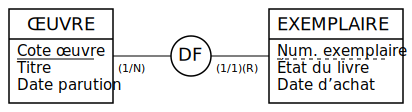

In [131]:
%%mocodo  --card_format=({min_card}/{max_card}) --strengthen_card=(1/1)(R)
ŒUVRE: Cote œuvre, Titre, Date parution
DF, 1N ŒUVRE, _11 EXEMPLAIRE
EXEMPLAIRE: Num. exemplaire, État du livre, Date d'achat

### Symbole de dépendance fonctionnelle

Il est possible d'activer l'encerclement d'un autre sigle que DF. C'est ce sigle qui devra alors apparaître en entrée, par exemple:

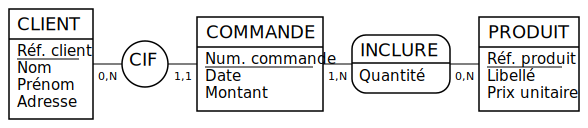

In [132]:
%%mocodo --df CIF
CLIENT: Réf. client, Nom, Prénom, Adresse
CIF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num. commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantité
PRODUIT: Réf. produit, Libellé, Prix unitaire

Comme le cercle est alors un peu plus grand, on peut vouloir régler (_a priori_ une fois pour toutes) le ratio défini dans l'objet `shapes` du fichier appelé par défaut `sandbox_geo.json`):

```
"df_text_height_ratio" : 1.00,
```

### Basculement des cardinalités et inflexion des pattes rectilignes

Mocodo est capable de détecter certaines configurations de pattes dont les cardinalités présentent un risque élevé de collision. Il procède alors à deux types d'ajustements:

1. [Issue 25](https://github.com/laowantong/mocodo/issues/25). Les cardinalités d'une patte verticale ou horizontale sont envoyées de l'autre côté de la patte. Par exemple, dans le plongement du MCD précédent, la présence de la patte oblique _BLANDIT-VIVAMUS_ envoie les cardinalités de _VELIT-BLANDIT_ à l'opposé de leur position par défaut (à droite d'une patte verticale ou en bas d'une patte horizontale).
2. [Issue 27](https://github.com/laowantong/mocodo/issues/27). Les pattes obliques sont infléchies de façon à ménager plus d'espace pour afficher deux couples de cardinalités. Ici, l'inflexion de la patte _DF-CONGUE_ permet à ses cardinalités de coexister sans problème avec celles de l'association réflexive.

Ces ajustements automatiques résolvent les problèmes les plus courants. Toutefois, étant antérieurs au tracé proprement dit, ils peuvent seulement réduire les risques de collision, et non les prévenir totalement. Ils peuvent même en produire d'autres. Ainsi, autour des entités monstrueusement pattues, des collisions qui ne se seraient pas produites par défaut seront parfois observées. L'utilisateur a alors deux possibilités:

- diminuer la valeur du paramètre `--flex` (par défaut, `0.75`) pour réduire la courbure de l'inflexion automatique, en allant jusqu'à `0` pour la désactiver totalement ;
- modifier à la main les positions des cardinalités en conflit, comme expliqué dans la section suivante.


### Positionnement des contraintes

#### En ajoutant des liens invisibles

La possibilité de rendre un trait invisible peut être exploitée pour « attirer » une contrainte vers telle ou telle boîte existante, soit en la répétant dans la définition de la contrainte, soit en l'y intégrant (fictivement) si elle n'en fait pas partie.

Par exemple, ci-dessous, répéter l'association Stocker et intégrer l'entité Commande permet de réduire la largeur du MCD sans compromettre sa lisibilité :

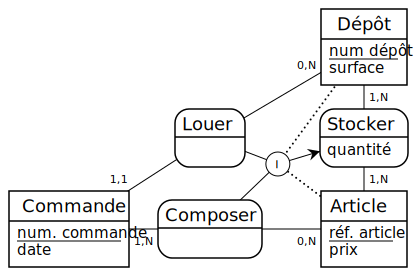

In [133]:
%%mocodo
:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
:
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer, Commande, Stocker

#### En ajoutant une boîte invisible

Ces réglages restent relativement fragiles. Une façon d'assurer qu'ils survivront à un réarrangement est de faire coïncider le centre d'une contrainte avec celui d'une boîte supplémentaire, que nous appelons ici « Z » :

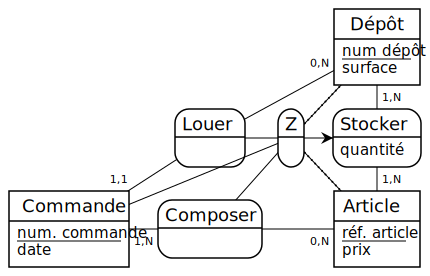

In [134]:
%%mocodo
:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
Z, XX Commande, XX Article, XX Dépôt
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer: Z, Z

Il ne reste plus qu'à rendre invisibles l'association Z et ses pattes en préfixant Z d'un signe moins `-` :

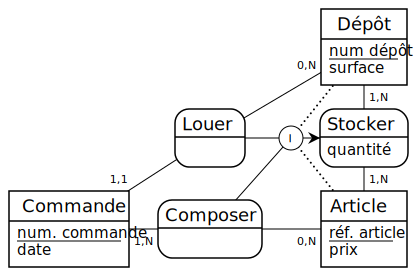

In [135]:
%%mocodo
:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
-Z, XX Commande, XX Article, XX Dépôt
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer: Z, Z

Cette technique résiste très bien aux réarrangements automatiques.

### Gouttière d'identifiants

Elle apparaît automatiquement (`visibility=auto`) dès qu'il y a au moins un identifiant alternatif. Il est possible de l'en empêcher :

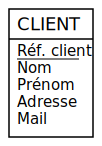

In [136]:
%%mocodo --gutters ids:visibility=off
CLIENT: Réf. client, 1_Nom, 1_Prénom, Adresse, 2_Mail

... ou au contraire de la forcer quand elle est superfétatoire :

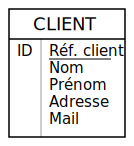

In [137]:
%%mocodo --gutters ids:visibility=on
CLIENT: Réf. client, Nom, Prénom, Adresse, Mail

Vous pouvez aussi préciser quelles chaînes dénoteront un identifiant fort (par défaut, `strong=ID`), un identifiant faible (par défaut, `weak=id`) ainsi que les numéros des groupes d'identifiants alternatifs (par défaut, `alts=123456789`, mais vous pouvez lister moins de 9 symboles) :

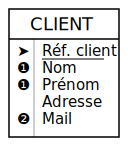

In [138]:
%%mocodo --gutters ids:strong=➤,alts=❶❷❸❹
CLIENT: Réf. client, 1_Nom, 1_Prénom, Adresse, 2_Mail

### Style et direction des pattes de l'héritage

Le type de flèche spécifiant le mécanisme de passage au modèle relationnel (`<=`, `<-`, `->` ou `=>`) fait par défaut l'objet d'une visualisation dès le modèle conceptuel : la ou les pattes vers les entités de destination des attributs migrants sont orientées vers celles-ci ; et la ou les autres pattes sont doublées (pour `<=` et `=>`) ou non (pour `<-` et `->`).

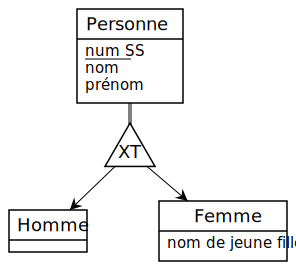

- **Femme** (<ins>num SS</ins>, nom, prénom, nom de jeune fille)
- **Homme** (<ins>num SS</ins>, nom, prénom)


In [139]:
%%mocodo -t
Personne: num SS, nom, prénom

/XT\ Personne => Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Cette visualisation n'est pas conventionnelle : on se borne normalement à ajouter une flèche dirigée vers l'entité-mère.

Pour désactiver l'embellissement opéré par Mocodo, sans pour autant changer le mécanisme de passage au relationnel, prolongez simplement d'un caractère la flèche : `<==`, `<--`, `-->` ou `==>` :

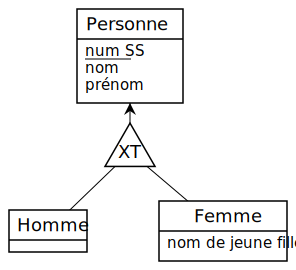

- **Femme** (<ins>num SS</ins>, nom, prénom, nom de jeune fille)
- **Homme** (<ins>num SS</ins>, nom, prénom)


In [140]:
%%mocodo -t
Personne: num SS, nom, prénom

/XT\ Personne ==> Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

**Changement de la version 4.0.** Précédemment, `-->` et `==>` s'écrivaient respectivement `->>` et `=>>`.

## Retouches fines

Lors du plongement, Mocodo génère systématiquement un fichier (intitulé par défaut `sandbox_geo.json`) répertoriant les positions les plus importantes du dessin. Les autres coordonnées sont calculées relativement à celles-ci.

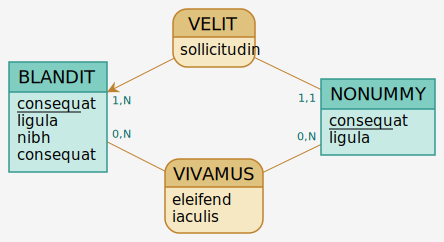

In [141]:
%%mocodo --colors brewer+1
VELIT, 1N> BLANDIT, 11 NONUMMY: sollicitudin

BLANDIT: consequat, ligula, nibh, consequat
:::
NONUMMY: consequat, ligula
  
VIVAMUS, 0N NONUMMY, 0N BLANDIT: eleifend, iaculis

Ouvrons le fichier de géométrie généré :

In [142]:
display.Code("sandbox_geo.json")

{
  "width": 444,
  "height": 242,
  "cx": [
    [ "VELIT", 214 ],
    [ "BLANDIT", 58 ],
    [ "NONUMMY", 378 ],
    [ "VIVAMUS", 214 ]
  ],
  "cy": [
    [ "VELIT", 38 ],
    [ "BLANDIT", 117 ],
    [ "NONUMMY", 117 ],
    [ "VIVAMUS", 196 ]
  ],
  "shift": [
    [ "VELIT,BLANDIT,0", 0 ],
    [ "VELIT,NONUMMY,0", 0 ],
    [ "VIVAMUS,NONUMMY,0", 0 ],
    [ "VIVAMUS,BLANDIT,0", 0 ]
  ],
  "ratio": [
    [ "VELIT,BLANDIT,0", 1.0 ]
  ]
}

On y trouve :

- un couple de dimensions `width` et `height` définit la taille du MCD ;
- deux listes de couples `cx` et `cy`, les abscisses et ordonnées des centres des boîtes ;
- un dictionnaire `shift`, les positions relatives des cardinalités par rapport à leur position par défaut ;
- une liste `ratio`, les positions des flèches éventuelles : leur valeur peuvent varier de `0.0` (flèche cachée sous la boîte d'origine) à `1.0` (par défaut, pointe de la flèche au contact du bord de la boîte de destination, compte non tenu de l'arrondi s'il s'agit d'une association).

Copions-collons ce texte, apportons-lui quelques modifications et sauvegardons-le :

In [143]:
%%file sandbox_geo.json
{
  "width": 444,
  "height": 182,
  "cx": [
    [ "VELIT", 214 ],
    [ "BLANDIT", 58 ],
    [ "NONUMMY", 378 ],
    [ "VIVAMUS", 214 ]
  ],
  "cy": [
    [ "VELIT", 38 ],
    [ "BLANDIT", 87 ],
    [ "NONUMMY", 87 ],
    [ "VIVAMUS", 136 ]
  ],
  "shift": [
    [ "VELIT,BLANDIT,0", -30 ],
    [ "VELIT,NONUMMY,0", -30 ],
    [ "VIVAMUS,NONUMMY,0", 0 ],
    [ "VIVAMUS,BLANDIT,0", 0 ]
  ],
  "ratio": [
    [ "VELIT,BLANDIT,0", 0.5 ]
  ]
}

Overwriting sandbox_geo.json


Il suffit maintenant d'ajouter l'option `--reuse_geo` pour appliquer ces modifications :

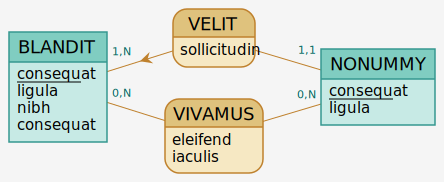

In [144]:
%mocodo -i sandbox --colors brewer+1 --reuse_geo

Bien entendu, ce genre de manipulations doit rester exceptionnel. Il est en tout cas à réserver à la toute dernière étape de production d'un MCD, puisque la plupart des évolutions subséquentes de son texte-source frapperaient d'obsolescence votre fichier de géométrie.

**NB.** Étant donné que Mocodo produit des SVG, rien ne vous empêche de retoucher ceux-ci avec un logiciel de dessin vectoriel dédié, comme [Inkscape](https://www.inkscape.org/?lang=fr) (libre) ou Adobe Illustrator, Freehand, CorelDRAW, etc. Attention, le SVG généré n'est pas spécialement pensé pour cet usage. Certains éléments sont groupés pour permettre leur déplacement en bloc, mais les liens ne suivent pas ces déplacements, ce qui peut vite devenir fastidieux.

## Conversion dans d'autres formats graphiques

Avec l'option `--svg_to` suivie de `pdf` et/ou `png`, Mocodo convertit en PDF et/ou PNG le SVG généré pour le MCD.

In [145]:
%mocodo -i ccp --svg_to png pdf --select

Le premier format est prévu pour inclusion dans des documents qui ne gèrent pas les SVG :

In [146]:
display.IFrame("mocodo_notebook/ccp.pdf", width="100%", height="100%")

Attention, seules les polices de caractères les plus courantes apparaîtront correctement sur toutes les plateformes.

Le second est un format bitmap, donc avec une certaine perte de qualité :

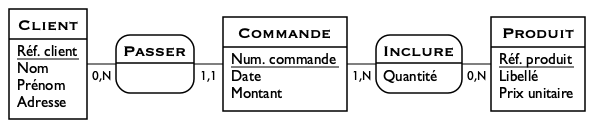

In [147]:
display.Image("ccp.png")

Mentionnons une possibilité amusante, actuellement non intégrée à Mocodo : [Svg2Rough.js](https://fskpf.github.io) pourra donner à votre travail une touche finale plus informelle, dans un style « tracé à la main ».

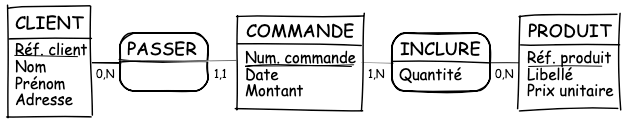

In [149]:
display.Image("../examples/svg2roughjs.png")

# Annexe A : Miscellanées académiques

## Décompositions d'un MCD

Aussi surprenant que cela puisse paraître, tout MCD peut être transformé en un MCD équivalent dont les seules associations sont des dépendances fonctionnelles binaires non porteuses d'attributs, telles que celle ci-dessous :

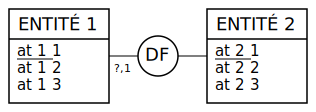

In [150]:
%%mocodo 
ENTITÉ 1_: at 1 1, at 1 2, at 1 3
DF, ?1 ENTITÉ 1_, XX ENTITÉ 2_
ENTITÉ 2_: at 2 1, at 2 2, at 2 3

La transformation peut demander jusqu'à trois opérations que Mocodo appelle _drain_, _split_ et _explode_, et que nous allons découvrir dans la suite.

### Vider les DF de leurs attributs

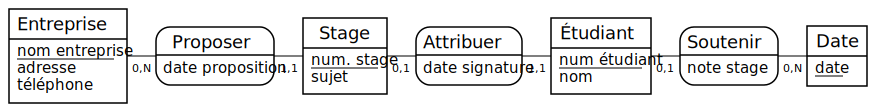

- **Entreprise** (<ins>nom entreprise</ins>, adresse, téléphone)
- **Étudiant** (<ins>num étudiant</ins>, nom, _#num. stage_, date signature, date, note stage)
- **Stage** (<ins>num. stage</ins>, sujet, _#nom entreprise_, date proposition)


In [151]:
%%mocodo -t
Entreprise: nom entreprise, adresse, téléphone
Proposer, 0N Entreprise, 11 Stage: date proposition
Stage: num. stage, sujet
Attribuer, 11 Étudiant, 01 Stage: date signature
Étudiant: num étudiant, nom
Soutenir, 01 Étudiant, 0N Date: note stage
Date: date

Le MCD ci-dessus comporte trois associations de dépendance fonctionnelle porteuses d'attributs. Certains auteurs considèrent cela comme une anomalie. En tout état de cause, Mocodo peut les déplacer dans les entités distinguées par les cardinalités 11. Nous appelons cette opération un « drainage des dépendances fonctionnelles » (option `-t drain`). Notez bien que ces deux MCD sont strictement équivalents, et produisent le même MLD.

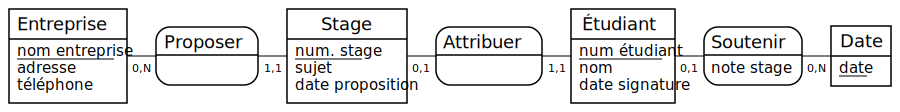

- **Entreprise** (<ins>nom entreprise</ins>, adresse, téléphone)
- **Étudiant** (<ins>num étudiant</ins>, nom, date signature, _#num. stage_, date, note stage)
- **Stage** (<ins>num. stage</ins>, sujet, date proposition, _#nom entreprise_)


In [152]:
%mocodo -i sandbox --mld -t drain

La première version peut être préférée pour des raisons de localité sémantique (_date proposition_ dans PROPOSER), ou honnie parce qu'elle complique la définition d'identifiant d'association. Mocodo n'a pas d'opinion sur la question. Par contre, il se refuse à procéder au drainage _via_ les cardinalités 01. Dans le MCD ci-dessus, le placement de _note stage_ dans SOUTENIR indique qu'un étudiant peut ne pas se voir attribuer de note de stage ; si elle était mise dans ÉTUDIANT, la connaissance du fait que ce champ autorise la valeur `NULL` serait perdue.

### Décomposer les DF n-aires

De même, d'aucuns regardent de travers les dépendances fonctionnelles d'arité $n$ supérieure à 2 :

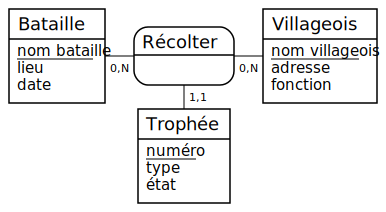

- **Bataille** (<ins>nom bataille</ins>, lieu, date)
- **Trophée** (<ins>numéro</ins>, type, état, _#nom villageois_, _#nom bataille_)
- **Villageois** (<ins>nom villageois</ins>, adresse, fonction)


In [153]:
%%mocodo -t
Bataille: nom bataille, lieu, date
Récolter, 0N Villageois, 0N Bataille, 11 Trophée
Villageois: nom villageois, adresse, fonction

Trophée: numéro, type, état

Toute DF de ce type peut en effet être « fendue » en $n-1$ DF. L'option `-m split` génère le MCD équivalent :

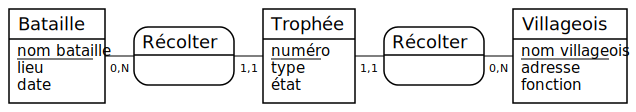

- **Bataille** (<ins>nom bataille</ins>, lieu, date)
- **Trophée** (<ins>numéro</ins>, type, état, _#nom bataille_, _#nom villageois_)
- **Villageois** (<ins>nom villageois</ins>, adresse, fonction)


In [154]:
%mocodo -i sandbox --seed=3 --mld -t split arrange:wide

### Décomposer les associations n-aires non DF

Toute association non DF d'arité $n$ peut être décomposée en un ensemble de $n$ associations DF : elle-même se voit alors remplacée par une entité liée aux $n$ entités originales. Cette nouvelle entité est appelée « entité-intersection », « entité-associative » ou « Gerund », cf. Song, Il-Yeol & Evans, Mary & Park, Eui Kyun. _A Comparative Analysis of Entity-Relationship Diagrams_. Journal of Computer and Software Engineering. 3 (1995). Dans les cours de [Laurent Audibert](https://laurent-audibert.developpez.com/Cours-BD/?page=conception-des-bases-de-donnees-modele-a#L2-3-3-b) ou de [Patrick Bergougnoux](https://gestion.pumbo.fr/boutique/livre/modelisation-conceptuelle-de-donnees), l'opération est illustrée à l'aide du MCD suivant :

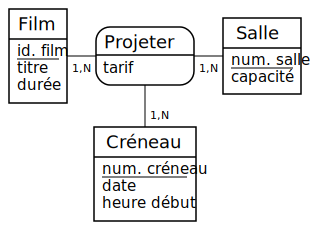

- **Créneau** (<ins>num. créneau</ins>, date, heure début)
- **Film** (<ins>id. film</ins>, titre, durée)
- **Projeter** (<ins>_#num. salle_</ins>, <ins>_#num. créneau_</ins>, <ins>_#id. film_</ins>, tarif)
- **Salle** (<ins>num. salle</ins>, capacité)


In [155]:
%%mocodo -t
Film: id. film, titre, durée
Projeter, 1N Salle, 1N Créneau, 1N Film: tarif
Salle: num. salle, capacité

Créneau: num. créneau, date, heure début

La décomposition est invoquée par l'option `-t explode` :

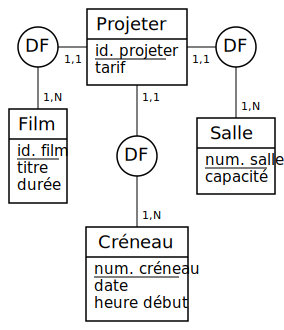

- **Créneau** (<ins>num. créneau</ins>, date, heure début)
- **Film** (<ins>id. film</ins>, titre, durée)
- **Projeter** (<ins>id. projeter</ins>, tarif, _#id. film_, _#num. salle_, _#num. créneau_)
- **Salle** (<ins>num. salle</ins>, capacité)


In [156]:
%mocodo -i sandbox --seed=8 --mld -t explode arrange:balanced

Le nouveau MCD a vocation à être retouché pour :
- se rapprocher du plongement initial ;
- nommer judicieusement les nouveaux identifiant, entité et associations créés.

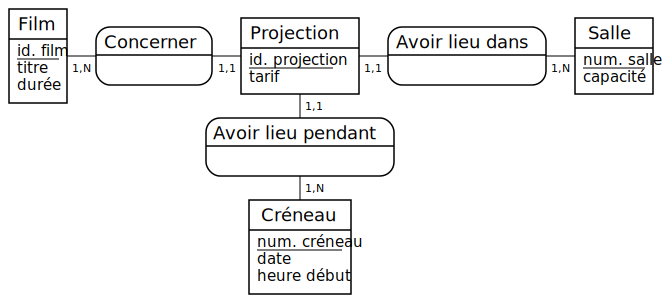

- **Créneau** (<ins>num. créneau</ins>, date, heure début)
- **Film** (<ins>id. film</ins>, titre, durée)
- **Projection** (<ins>id. projection</ins>, tarif, _#id. film_, _#num. salle_, _#num. créneau_)
- **Salle** (<ins>num. salle</ins>, capacité)


In [157]:
%%mocodo -t
Film: id. film, titre, durée
Concerner, 11 Projection, 1N Film
Projection: id. projection, tarif
Avoir lieu dans, 11 Projection, 1N Salle
Salle: num. salle, capacité

Avoir lieu pendant, 11 Projection, 1N Créneau

Créneau: num. créneau, date, heure début

### Décomposer les associations binaires non DF

Considérons le MCD suivant, qui comporte deux associations binaires non DF, l'une porteuse d'attribut, l'autre non :

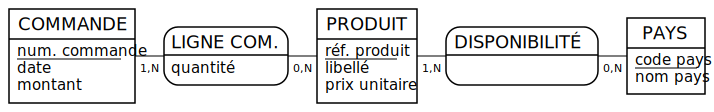

- **COMMANDE** (<ins>num. commande</ins>, date, montant)
- **DISPONIBILITÉ** (<ins>_#réf. produit_</ins>, <ins>_#code pays_</ins>)
- **LIGNE COM.** (<ins>_#num. commande_</ins>, <ins>_#réf. produit_</ins>, quantité)
- **PAYS** (<ins>code pays</ins>, nom pays)
- **PRODUIT** (<ins>réf. produit</ins>, libellé, prix unitaire)


In [158]:
%%mocodo -t
COMMANDE: num. commande, date, montant
LIGNE COM., 1N COMMANDE, 0N PRODUIT: quantité
PRODUIT: réf. produit, libellé, prix unitaire
DISPONIBILITÉ, 1N PRODUIT, 0N PAYS
PAYS: code pays, nom pays

Par souci de concision, quand on parle d'associations $n$-aires dans ce document, c'est par opposition aux associations binaires ; mais bien sûr, la règle de décomposition énoncée à la section précédente est également valable pour $n=2$, même si par défaut elle ne s'applique qu'aux associations d'arité minimale 3. En réduisant la valeur de `arity` à 2, toutes les associations binaires non DF seront également décomposées :

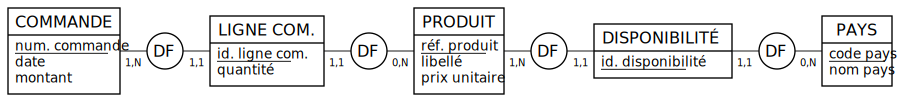

- **COMMANDE** (<ins>num. commande</ins>, date, montant)
- **DISPONIBILITÉ** (<ins>id. disponibilité</ins>, _#réf. produit_, _#code pays_)
- **LIGNE COM.** (<ins>id. ligne com.</ins>, quantité, _#num. commande_, _#réf. produit_)
- **PAYS** (<ins>code pays</ins>, nom pays)
- **PRODUIT** (<ins>réf. produit</ins>, libellé, prix unitaire)


In [159]:
%mocodo -i=sandbox --seed=1 --scale=0.9 --mld -t explode:arity=2 arrange:wide=9

Cette décomposition devient un peu extrême ! Vous pouvez conserver certaines associations binaires non DF, à savoir celles qui ne portent aucun attribut, en mettant `arity` à `2.5` (à lire comme « intermédiaire entre `2` et `3` ») :

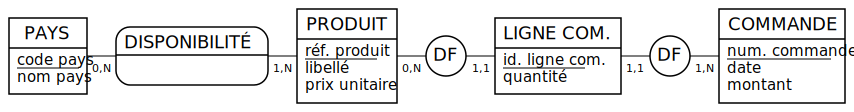

- **COMMANDE** (<ins>num. commande</ins>, date, montant)
- **DISPONIBILITÉ** (<ins>_#réf. produit_</ins>, <ins>_#code pays_</ins>)
- **LIGNE COM.** (<ins>id. ligne com.</ins>, quantité, _#réf. produit_, _#num. commande_)
- **PAYS** (<ins>code pays</ins>, nom pays)
- **PRODUIT** (<ins>réf. produit</ins>, libellé, prix unitaire)


In [160]:
%mocodo -i=sandbox --mld -t explode:arity=2.5 arrange:wide --seed=1

### Décomposer en créant des entités faibles

Ci-dessus, le processus de modification a créé un identifiant _id. ligne com._ qui peut sembler superfétatoire. Si l'on a introduit la notion d'entité faible, on aura ici avantage à utiliser l'option `weak` :

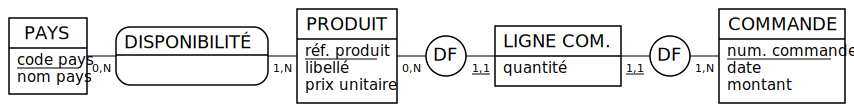

- **COMMANDE** (<ins>num. commande</ins>, date, montant)
- **DISPONIBILITÉ** (<ins>_#réf. produit_</ins>, <ins>_#code pays_</ins>)
- **LIGNE COM.** (<ins>_#num. commande_</ins>, <ins>_#réf. produit_</ins>, quantité)
- **PAYS** (<ins>code pays</ins>, nom pays)
- **PRODUIT** (<ins>réf. produit</ins>, libellé, prix unitaire)


In [161]:
%mocodo -i=sandbox --mld -t explode:arity=2.5,weak arrange:wide --seed=1

**Cas des agrégats.** Comme on sait, la notion d'entité faible peut souvent permettre de se passer de celle d'agrégat. Ainsi, le MCD ci-dessous :

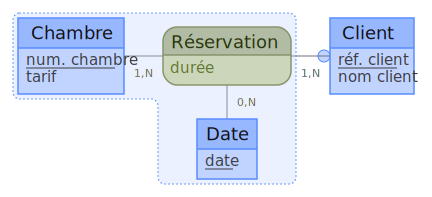

- **Chambre** (<ins>num. chambre</ins>, tarif)
- **Client** (<ins>réf. client</ins>, nom client)
- **Réservation** (<ins>_#num. chambre_</ins>, <ins>date</ins>, _#réf. client_, durée)


In [162]:
%%mocodo -t --colors ocean
Chambre: num. chambre, tarif
Réservation, /1N Client, 1N Chambre, 0N Date: durée
Client: réf. client, nom client

Date: date

... se verra décomposé de la même façon que sans agrégat, à ceci près que la patte distinguée par le `"/"` produira une cardinalité `11` au lieu d'une cardinalité `_11` :

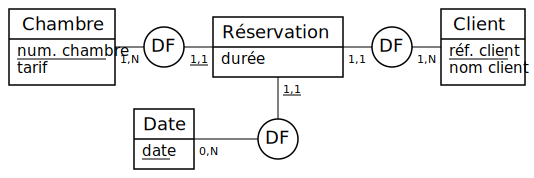

- **Chambre** (<ins>num. chambre</ins>, tarif)
- **Client** (<ins>réf. client</ins>, nom client)
- **Réservation** (<ins>date</ins>, <ins>_#num. chambre_</ins>, durée, _#réf. client_)


In [163]:
%mocodo -i sandbox --mld -t explode:weak arrange:wide=5 --seed 21

Cette décomposition peut quelquefois se simplifier. Ici, on remarque que l'entité DATE est indépendante et réduite à son identifiant. Si l'on anticipe sur le passage au relationnel, on peut donc la supprimer, après avoir pris soin, bien sûr, de déplacer dans RÉSERVATION son unique attribut. Celui-ci renforçant une entité faible, il doit garder son caractère identifiant.

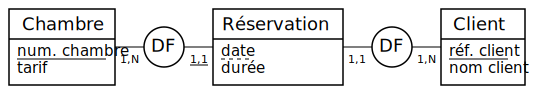

- **Chambre** (<ins>num. chambre</ins>, tarif)
- **Client** (<ins>réf. client</ins>, nom client)
- **Réservation** (<ins>_#num. chambre_</ins>, <ins>date</ins>, durée, _#réf. client_)


In [164]:
%%mocodo -t
Chambre: num. chambre, tarif
DF, _11 Réservation, 1N Chambre
Réservation: date, durée
DF, 11 Réservation, 1N Client
Client: réf. client, nom client

### Conclusion sur ces décompositions

Comme l'indique le nom que nous leur avons malicieusement attribué, certaines de ces décompositions peuvent littéralement faire _exploser_ la taille du MCD. Cependant :

- elles sont intéressantes d'un point de vue <s>terroriste</s> théorique ;
- elles peuvent permettre la détection d'erreurs de conception ;
- elles peuvent conduire à des améliorations fines du MCD (c'est ce qu'on a fait sur celui des réservations de chambre) ;
- elles décrivent le MCD dans un langage volontairement appauvri, ce qui le rendra plus aisément portable dans une autre notation, comme UML ou _crow's foot_.

## Équivalences avec la convention _Look Across_

La convention _Look Across_ s'oppose à la convention _Look Here_ de Merise. Elle est plus répandue internationalement. 
Nous allons l'étudier par le biais du formalisme graphique de Chen, auquel cette section pourra du même coup servir d'introduction pour les personnes familières avec Merise.

### Associations binaires en _Look Across_

#### Cardinalités minimale et maximale

Considérons un MCD Merise avec une association de dépendance fonctionnelle :

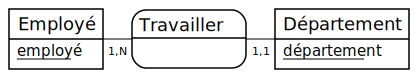

In [165]:
%%mocodo
Employé: employé
Travailler, 11 Département, 1N Employé
Département: département

Dans le formalisme graphique de Chen, cela donnera :

In [166]:
%mocodo -i sandbox -t chen:layout=circo --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


Le 1 et le N correspondent aux cardinalités maximales du MCD Merise. Comme on voit, elles sont permutées. Merise suit la convention _Look Here_ (LH) ; la notation de Chen, _Look Across_ (LA). Comme cette dernière est la plus répandue dans le monde anglo-saxon, nous parlerons par commodité d'« ERD » (_Entity-relationship diagram_) pour les modèles conceptuels selon Chen, et toujours de « MCD » pour ceux de Merise.

Considérons maintenant les deux versions d'une association avec des cardinalités minimales distinctes :

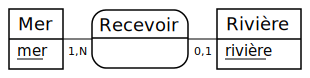

In [167]:
%%mocodo
Mer: mer
Recevoir, 01 Rivière, 1N Mer
Rivière: rivière

In [168]:
%mocodo -i sandbox -t chen:layout=circo --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


Les cardinalités maximales sont toujours permutées ; par contre, les cardinalités minimales ne le sont pas. Dans l'ERD, elles sont figurées par un trait simple (0) ou double (1). On les appelle aussi des « participations » : une rivière peut ne participer (directement) à l'alimentation d'aucune mer (ce n'est pas un fleuve) ; toute mer participe à la réception d'une rivière (un fleuve) minimum. Les conventions sont donc les suivantes :

| Cardinalités | MCD Merise | ERD Chen |
|:--|:--:|:--:|
| minimale | LH | LH |
| maximale | LH | LA |

La notation Merise a l'avantage de la cohérence ; celle de Chen en a d'autres, que nous verrons un peu plus loin.

Avant cela, voyons un dernier point de détail : lorsque deux cardinalités N se trouvent de part et d'autre d'une association binaire, l'une est notée M :

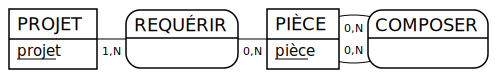

In [169]:
%%mocodo
PROJET: projet
REQUÉRIR, 1N PROJET, 0N PIÈCE
PIÈCE: pièce
COMPOSER, 0N PIÈCE, 0N PIÈCE

In [170]:
%mocodo -i sandbox -t chen:layout=circo --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


#### Entités faibles et entités associatives

Maintenant examinons le cas des entités faibles :

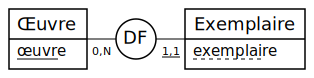

In [171]:
%%mocodo
Œuvre: œuvre
DF, 0N Œuvre, _11 Exemplaire
Exemplaire: exemplaire

In [172]:
%mocodo -i sandbox -t chen:layout=circo --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


L'entité faible, à l'instar de la DF « renforçante », sont entourées d'un double trait.

Le vocabulaire de Chen comporte encore un élément graphique, que Merise ne distingue pas spécialement. Nous avons vu que toute association non DF pouvait être décomposée de façon équivalente par l'insertion d'entités faibles :

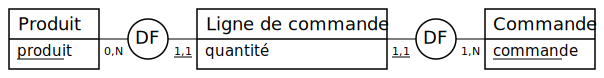

In [173]:
%%mocodo
Produit: produit
DF, _11 Ligne de commande, 0N Produit
Ligne de commande: _quantité
DF, _11 Ligne de commande, 1N Commande
Commande: commande

LIGNE DE COMMANDE est quelquefois qualifiée d'« entité associative », et Chen la figure logiquement par un losange (association) inscrit dans un rectangle (entité). Graphviz ne prend actuellement [pas](https://stackoverflow.com/questions/48046186/is-it-possible-to-have-nested-node-shapes-on-graphviz) en charge cette représentation. Nous l'approximons donc ainsi :

In [174]:
%mocodo -i sandbox -t chen:layout=circo,mindist=2,scale=0.6 --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


### Associations n-aires en _Look Across_

#### Triplet NNN

Passons maintenant aux choses sérieuses. Jusqu'ici, la différence entre les deux notations était purement cosmétique. Qu'en est-il des associations n-aires, et que signifie _Look Across_ quand _across_ peut désigner plusieurs endroits ?

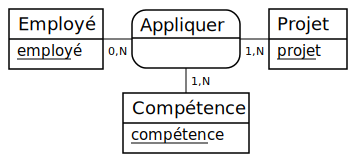

- **Appliquer** (<ins>employé</ins>, <ins>projet</ins>, <ins>compétence</ins>)


In [175]:
%%mocodo -t
Employé: employé
Appliquer, 0N Employé, 1N Projet, 1N Compétence
Projet: projet

Compétence: compétence

Dans ce cas (le plus usuel), la question ne se pose pas vraiment, ou du moins n'est pas tranchée de façon évidente :

In [176]:
%mocodo -i sandbox -t chen:layout=circo,mindist=1,scale=0.4 --defer


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


Quels sont les autres cas ? Il ne s'agit pas de ceux où l'association n-aire est entourée d'une ou plusieurs cardinalités maximale 1, puisqu'on pourrait alors la décomposer en DF binaires (cf. argument `split`). En réalité, on touche ici aux limites de la notation _Look Here_, plus intuitive, mais moins puissante que _Look Across_, et que Merise n'a pu rattraper que dans sa version 2.

Pour répondre progressivement à la question, procédons désormais dans l'ordre inverse, en présentant d'abord l'ERD, et ensuite seulement le MCD équivalent.

Les exemples qui suivent (ainsi d'ailleurs que le précédent), sont adaptés des pages 28 sqq. et 96 sqq. de l'ouvrage de Toby J. Teorey, Sam S. Lightstone, Tom Nadeau, H.V. Jagadish, _Database Modeling and Design - Logical Design_, 5th Edition - February 10, 2011 (Elsevier).

#### Triplet 1NN

Le premier ERD apportant véritablement quelque chose de nouveau a cette structure :

In [177]:
%%mocodo -t chen:layout=circo,mindist=1,scale=0.45 --defer
Ingénieur: ingénieur
Gérer, /1N Responsable, 1N Ingénieur, 1N Projet
Projet: projet

Responsable: responsable


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


Les auteurs explicitent ainsi ses règles de gestion :

> _Chaque ingénieur travaillant sur un projet particulier a exactement un responsable, mais chaque responsable d'un projet peut gérer plusieurs ingénieurs, et chaque responsable d'un ingénieur peut gérer cet ingénieur sur plusieurs projets._

Reprenons ces trois assertions, et faisons-les correspondre au trois cardinalités dans le sens anti-horaire à partir du 1 :

- 1 : pour un couple (ingénieur, projet) donné, un seul responsable possible ;
- N : pour un couple (responsable, projet) donné, plusieurs ingénieurs possibles ;
- N : pour un couple (responsable, ingénieur) donné, plusieurs projets possibles.

Avec Merise, les assertions seraient plutôt du type : « pour un x donné, _tant_ de couples (y, z) possibles ». Il y a donc bien permutation, mais permutation des références au singleton et au $n-1$-uplet.

C'est la réponse à notre question initiale, et nous verrons avec plaisir qu'elle reste valable quel que soit le triplet de cardinalités de l'association ternaire.

Pour l'instant, résumons les règles de gestion par cette **unique** dépendance fonctionnelle :

- (Ingénieur, Projet) $\implies$ Responsable.

Pour exprimer cela en (ou en dépit de) _Look Here_, on doit recourir à un agrégat :

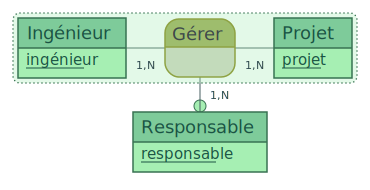

- **Gérer** (<ins>ingénieur</ins>, <ins>projet</ins>, responsable)


In [178]:
%mocodo -i sandbox --mld --colors pond

… ou à une CIF à unicité complète (ici en notation allégée) :

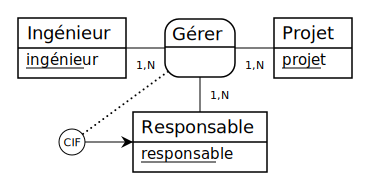

- **Gérer** (<ins>ingénieur</ins>, <ins>projet</ins>, responsable)


In [179]:
%mocodo -i sandbox --mld -t create:cifs=light arrange:balanced --seed=3

... Ou encore à une entité faible :

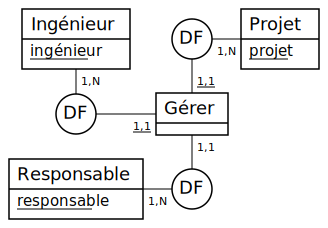

- **Gérer** (<ins>ingénieur</ins>, <ins>projet</ins>, responsable)


In [180]:
%mocodo -i sandbox --mld -t explode:weak,arity=2 arrange:balanced --seed=14

Les schémas relationnels produits permettent de se convaincre que ces différentes variantes respectent bien la dépendance fonctionnelle désirée : (Ingénieur, Projet) $\implies$ Responsable.

#### Triplet 11N

Passons à la deuxième combinaison intéressante :

In [181]:
%%mocodo -t chen:layout=circo,mindist=1,scale=0.45 --defer
Projet: projet
Affecter, /1N Site, /1N Projet, 0N Employé
Site: site

Employé: employé


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


Règles de gestion :

> _Chaque employé affecté à un projet travaille sur un seul site pour ce projet, mais peut se trouver sur différents sites pour différents projets. Sur un site donné, un salarié ne travaille que sur un seul projet. Sur un site donné, il peut y avoir plusieurs employés affectés à un projet donné._

Autrement dit (en partant du bas et dans le sens anti-horaire) :

1 : pour un couple (projet, employé) donné, un seul site possible ;
1 : pour un couple (employé, site) donné, un seul projet possible ;
N : pour un couple (projet, site) donné, plusieurs employés possibles.

En résumé, **deux** dépendances fonctionnelles :

- (Projet, Employé) $\implies$ Site.
- (Employé, Site) $\implies$ Projet.

Voici le MCD correspondant, successivement avec des agrégats et des CIFS (plus de variante possible avec entité faible) :

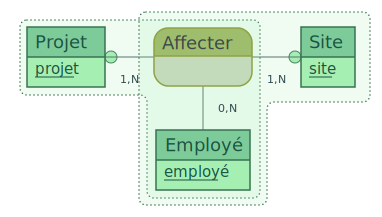


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Affecter** (<ins>projet</ins>, <ins>employé</ins> <sup>u1</sup>, site! <sup>u1</sup>)


In [182]:
%mocodo -i sandbox --select all -t mld:c --colors pond

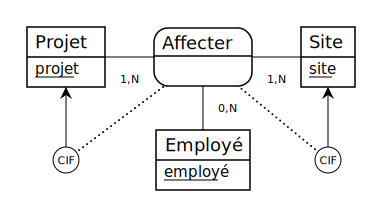


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Affecter** (<ins>projet</ins>, <ins>employé</ins> <sup>u1</sup>, site! <sup>u1</sup>)


In [183]:
%mocodo -i sandbox --select mcd mld -t mld:c create:cifs=light arrange:balanced --seed=3

On voit apparaître dans le schéma relationnel un « u1 » en exposant qui signifie : contrainte d'unicité n°1. Il y a en effet deux clés candidates : (projet, employé) et (employé, site). Seule l'une des deux est devenue clé primaire, mais cela ne veut pas dire qu'on a perdu la contrainte de dépendance fonctionnelle induite par l'autre. En SQL :

In [184]:
%mocodo -i sandbox -t sql


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE Affecter (
  PRIMARY KEY (projet, employe),
  projet  VARCHAR(42) NOT NULL,
  employe VARCHAR(42) NOT NULL,
  site    VARCHAR(42) NOT NULL,
  UNIQUE (employe, site)
);

```

#### Triplet 111

La dernière combinaison obéit à la même logique :

In [185]:
%%mocodo -t chen:layout=circo,mindist=1,scale=0.45 --defer
Technicien: technicien
Utiliser, /1N Technicien, /1N Carnet, /1N Projet
Projet: projet

Carnet: carnet


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_erd_chen.svg
</tt>
</span>
</div>


Règles de gestion :

> _Un technicien utilise exactement un carnet pour chaque projet. Chaque carnet appartient à un technicien pour chaque projet. Notez qu'un technicien peut toujours travailler sur plusieurs projets et gérer différents carnets pour différents projets._

Autrement dit (en partant du haut et dans le sens horaire) :

- 1 : pour un couple (technicien, projet) donné, un seul carnet possible ;
- 1 : pour un couple (carnet, projet) donné, un seul technicien possible ;
- 1 : pour un couple (carnet, technicien) donné, un seul projet possible.

En résumé, **trois** dépendances fonctionnelles :

- (Technicien, Projet) $\implies$ Carnet.
- (Carnet, Technicien) $\implies$ Projet.
- (Carnet, Projet) $\implies$ Technicien.

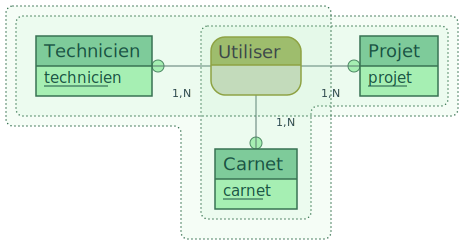


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Utiliser** (<ins>carnet</ins> <sup>u1</sup>, <ins>projet</ins> <sup>u2</sup>, technicien! <sup>u1 u2</sup>)


In [186]:
%mocodo -i sandbox --select all -t mld:c --colors pond

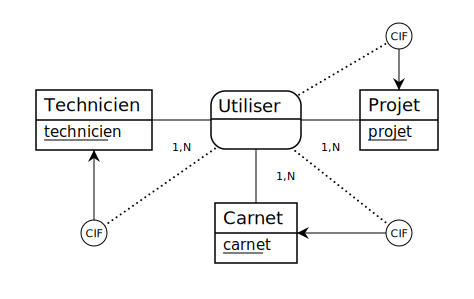


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


- **Utiliser** (<ins>carnet</ins> <sup>u1</sup>, <ins>projet</ins> <sup>u2</sup>, technicien! <sup>u1 u2</sup>)


In [187]:
%mocodo -i sandbox --select mcd mld -t mld:c create:cifs=light arrange:balanced flip:d,v --seed=12

Il y a maintenant trois clés candidates, correspondant à deux contraintes d'unicité. En SQL :

In [188]:
%mocodo -i sandbox -t sql


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE Utiliser (
  PRIMARY KEY (carnet, projet),
  carnet     VARCHAR(42) NOT NULL,
  projet     VARCHAR(42) NOT NULL,
  technicien VARCHAR(42) NOT NULL,
  UNIQUE (carnet, technicien),
  UNIQUE (projet, technicien)
);

```

#### Conclusion sur les agrégats multiples

Notre syntaxe `/1N` pour les agrégats permet d'exprimer simplement toutes les combinaisons possibles de cardinalités d'une association n-aire dans la notation de Chen : il suffit de mettre un `/1N` partout où Chen met un `1`. Chaque `/1N` créera une nouvelle dépendance fonctionnelle, autrement dit, une nouvelle clé candidate.

Plus rigoureusement : supposons une association $n$-aire $A$ exclusivement entourée de 1N (ou 0N). Soient $E_1$, $E_2$, ..., $E_n$ les entités mises en jeu, et $k_1, k_2$, ..., $k_n$ leurs identifiants respectifs. Alors, noter `/1N` (ou `/0N`) la cardinalité de la patte de $E_i$ dénote l'existence de la dépendance fonctionnelle suivante : $(k_1, ..., k_{i-1}, k_{i+1}, ..., k_n) \implies k_i$, autrement dit : que $(k_1, ..., k_{i-1}, k_{i+1}, ..., k_n)$ est une clé candidate de la table $A$.

Notez pour finir que Mocodo permet de spécifier à coût zéro quelle clé candidate sera élue clé primaire. Il suffit pour cela de placer en tête de la liste des entités mises en jeu par $A$ celle dont l'identifiant ne doit **pas** entrer dans la clé primaire. Si c'est $E_1$, la clé primaire sera automatiquement $(k_2, ..., k_n)$.

# Annexe B : La commande `mocodo`

## Paramétrage

### `mocodo --help`

In [189]:
%mocodo --help

usage: mocodo [--language CODE] [--params_path PATH] [--input PATH] [--help]
              [--version] [--restore] [--output_dir PATH]
              [--encodings [STR ...]] [--svg_to {png,pdf} [{png,pdf} ...]]
              [--print_params] [--reuse_geo] [--uid_suffix INT]
              [--select [{all,mcd,rw,source,text,code,mocodo,cv,mld,ddl,sql} ...]]
              [--defer [STR ...]] [--mld] [--transform [STR ...]]
              [--seed [FLOAT]] [--title STR] [--df STR] [--card_format [STR]]
              [--strengthen_card [STR]] [--flex FLOAT] [--colors STEM_OR_PATH]
              [--shapes STEM_OR_PATH] [--scale RATE] [--adjust_width RATE]
              [--detect_overlaps] [--gutters STR [STR ...]]

NOM :
Mocodo - Un générateur de diagrammes entité-association.

DESCRIPTION :
Mocodo est un outil libre destiné à l'enseignement des bases de données relationnelles.
Il prend en entrée une description textuelle des entités et associations d'un diagramme
entité-association (MCD). Il p

### Paramétrage à long terme

Pour éviter d'avoir à invoquer Mocodo répétitivement avec une longue kyrielle d'options, vous pouvez mettre celles-ci dans un fichier `params.json` situé dans le répertoire de lancement de Mocodo. La commande:

    mocodo --restore

... le fait pour vous avec un fichier de paramètres vide, _i.e._, un fichier-texte réduit aux deux caractères `{}`  (attention, elle rétablit aussi le fichier `sandbox.mcd` à son contenu par défaut).

Pour que le style de vos MCD soit maintenu à moindre frais à travers tous vos documents, vous êtes encouragés à modifier ce fichier de paramètres selon vos goûts et vos besoins. Mocodo peut même vous aider à le faire en exécutant la cellule suivante:

```
%mocodo --print_params
```

Son évaluation remplace son propre contenu par des lignes de code similaires à :

In [190]:
# You may edit and run the following lines
import json, pathlib
params = """\
{
  "adjust_width": 1,
  "card_format": "{min_card},{max_card}",
  "colors": "bw",
  "detect_overlaps": false,
  "df": "DF",
  "encodings": [ "utf8", "macroman" ],
  "flex": 0.75,
  "language": "fr",
  "mld": false,
  "output_dir": ".",
  "restore": false,
  "scale": 1,
  "seed": null,
  "shapes": "copperplate",
  "strengthen_card": "_1,1_",
  "svg_to": [],
  "title": "MCD",
  "uid_suffix": 0
}
"""
try:
    json.loads(params)
except:
    raise RuntimeError("Invalid JSON. Check your syntax on https://jsonlint.com.")
pathlib.Path("./params.json").write_text(params);

Ensuite :

1. Modifiez la variable `params` à votre gré en respectant la syntaxe [JSON](http://json.org).
2. Exécutez la cellule pour créer un fichier de nom et emplacement adéquats.

En cas de besoin, vous pourrez toujours ponctuellement passer outre ces réglages en en précisant d'autres en ligne de commande. Plus précisément, chaque paramètre est déterminé:

1. par sa valuation en ligne de commande;
2. à défaut, par sa valuation dans le fichier de paramètres indiqué par `--params_path`;
3. à défaut d'une telle indication, par sa valuation dans le fichier `params.json` du répertoire courant;
4. à défaut, par une valeur défaut éventuellement dépendante de votre système.

### Dissection de la commande

L'API de Mocodo a été revue de façon radicale pour la version 4.0. Le nombre d'options de premier niveau a été réduit ; en contrepartie, certaines sont devenues de véritables mini-commandes, avec leur propre liste d'arguments, et une syntaxe et un comportement uniformes. Voici leur définition en ABNF :

![](examples/option_syntax_2.png)

Introduisons, sur un exemple fictif, un vocabulaire que nous avons essayé d'employer le plus rigoureusement possible tout au long de cette documentation (et dans le code lui-même) :

```
mocodo    --select all    --transform  drain  arrange:wide  explode:weak,arity=2.5
```

- La **commande** `mocodo` est invoquée avec les **options** `--select` et `--transform`.
- On passe à la seconde trois **arguments** de complexité croissante, `drain`, `arrange:wide` et `explode:weak,arity=2.5`. Notez que le séparateur des arguments est l'espace. Par conséquent, un argument ne peut contenir d'espaces qu'entre guillemets.
- Chacun des arguments consiste en un nom de **sous-option** (`drain`, `arrange` ou `explode`), suivi éventuellement d'un deux-points (`:`), suivi d'une liste de **sous-arguments** séparés par des virgules (`,`).
- Chacun des sous-arguments consiste en un nom de **sous-sous-option**, suivi éventuellement d'un signe égal (`=`), suivi d'un **sous-sous-argument** (éventuellement entre guillemets).

On n'ira pas plus loin et, heureusement, la plupart des commandes réelles n'atteignent pas ce degré d'imbrication. La décomposition suivante fixera peut-être les idées, ou pourra du moins servir de référence en cas de doute :

$$
\underbrace{\texttt{mocodo}}_{\text{command}}
\qquad
\texttt{-}\,\texttt{-}
\underbrace{\texttt{select}}_{\text{option}}
\underbrace{
    \texttt{all}
}_{\text{argument}}
\qquad
\texttt{-}\,\texttt{-}
\underbrace{\texttt{transform}}_{\text{option}}
\qquad
\underbrace{
    \underbrace{
        \texttt{drain}
    }_{\text{sub-option}}
}_{\text{argument}}
\qquad
\underbrace{
    \underbrace{
        \texttt{arrange}
    }_{\text{sub-option}}
    \texttt{:}
    \underbrace{
        \underbrace{
            \texttt{wide}
        }_{\text{sub-sub-opt}}
    }_{\text{sub-arg}}
}_{\text{argument}}
\qquad
\underbrace{
    \underbrace{
        \texttt{explode}
    }_{\text{sub-option}}
    \texttt{:}
    \underbrace{
        \underbrace{
            \texttt{weak}
        }_{\text{sub-sub-opt}}
    }_{\text{sub-arg}}
    \texttt{,}
    \underbrace{
        \underbrace{
            \texttt{arity}
        }_{\text{sub-sub-opt}}
        \texttt{=}
        \underbrace{
            \texttt{2.5}
        }_{\text{sub-sub-arg}}
    }_{\text{sub-argument}}
}_{\text{argument}}
$$ 

L'intérêt de cette structuration en arborescence est double. Elle permet :
- de créer des pipelines d'opérations : le résultat de l'application du premier argument est fourni en entrée au second, etc ;
- de regrouper les opérations interdépendantes. Par exemple, avant la version 4.0, l'argument `explode:weak,arity=2.5` aurait dû être mis à plat : `--explode --weak_explosion --explosion_arity=2.5`. Cela donne le même statut à toutes, masquant le fait que certaines n'ont de sens qu'en présence d'une autre.

## L'option `--transform` et ses arguments

### Triage et exécution des transformations

L'option à tout faire est `--transform`, que vous pouvez abréger `-t`. Avant de traiter ses arguments, Mocodo commence par les répartir en deux catégories :

- les **réécritures**, qui transforment le MCD original en un nouveau MCD avec, par exemple, les libellés mis en majuscules, ou les associations n-aires décomposées en DF, ou les boîtes réarrangées ;
- les **conversions**, qui produisent quelque chose qui n'est pas un MCD : ce peut être un dictionnaire des données, un diagramme de classes UML, un ERD dans la notation _crow's foot_, etc.

L'exécution se déroule alors en deux étapes :

1. les réécritures sont opérées en pipeline, c'est-à-dire que le MCD produit par la première réécriture est passé en entrée de la seconde, etc. Leur ordre a donc de l'importance ;
2. les conversions sont alors appliquées au résultat de la dernière réécriture. Leur ordre n'a pas d'importance.

### Aide-mémoire des arguments de `--transform`

Toutes les opérations de conversion ont déjà été décrites dans ce document :

- produits dérivés : `data_dict`, `share` ;
- schémas relationnels textuels : `html`, `latex`, `markdown`, `text` ;
- DDL : `sql` (et ses dialectes) ;
- autres sorties relationnelles : `diagram`, `dbml`, `d2`, `dependencies` ;
- conversions dans d'autres notations : `uml`, `crow`, `chen`.

Certaines opérations de réécriture ont été présentées, d'autres passées sous silence :

- réorganisation du MCD : `arrange`, `flip` ;
- obfuscation et randomisation d'éléments donnés : `randomize`, `drown` ;
- génération de MCD aléatoires : `grow` ;
- décomposition d'associations : `split`, `drain`, `explode` ;
- inférence d'informations manquantes : `create` ;
- suppression d'éléments donnés : `delete` ;
- traitement de chaînes de caractères : `truncate`, `slice`, `prefix`, `suffix`, `replace` ;
- homogénéisation de la mise en forme : `ascii`, `camel`, `snake`, `pascal`, `lower`, `upper`, etc.

L'aide-mémoire suivant devrait vous permettre de prendre en main les opérations qui vous intéressent :

In [8]:
display.Markdown("../fr_cheat_sheet.md")

- Opérations de <span style="color:blue; font-family:monospace; font-weight:600;">conversion en bleu</span> et de <span style="color:green; font-family:monospace; font-weight:600;">réécriture en vert</span>.
- Survolez un nom d'opération pour voir ses éventuels alias.

| Sous-option | Description | Exemples | Explications |
| --: | :-- | :-- | :-- |
| <span style="color:green; font-family:monospace; font-weight:600">add</span> | cf. `create` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">anonymise</span> | cf. `drown` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">anonymize</span> | cf. `drown` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">append</span> | cf. `suffix` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">arrange</span> | réarrange la disposition, soit par Branch & Bound, soit avec un algorithme génétique | `` arrange `` | B&B sans contraintes |
|  |  | `` arrange:timeout=60 `` | B&B limité à une minute |
|  |  | `` arrange:wide `` | B&B privilégiant la largeur |
|  |  | `` arrange:current `` | B&B sur la grille courante |
|  |  | `` arrange:balanced=0 `` | B&B sur la plus petite grille équilibrée |
|  |  | `` arrange:balanced=1 `` | B&B sur la seconde plus petite grille équilibrée |
|  |  | `` arrange:algo=ga `` | algorithme génétique |
| <span style="color:green; font-family:monospace; font-weight:600">ascii</span> | réécrit les éléments donnés en ASCII | `` ascii:roles,labels `` | rôles, libellés des boîtes et des attributs en ASCII |
| <span style="color:blue; font-family:monospace; font-weight:600">ast</span> | crée l'arbre de syntaxe abstraite du texte source (pour le débogage) |  |  |
| <span title="Alias : camelcase, camel_case." style="color:green; font-family:monospace; font-weight:600">camel</span> | réécrit les éléments donnés en camelCase |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">camel_case</span> | cf. `camel` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">camelcase</span> | cf. `camel` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">capitalize</span> | réécrit les éléments donnés en capitalisant la première lettre de chaque mot |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">case_fold</span> | cf. `casefold` |  |  |
| <span title="Alias : case_fold." style="color:green; font-family:monospace; font-weight:600">casefold</span> | réécrit les éléments donnés en minuscules, mais plus agressivement que « lower » |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">chen</span> | convertit le modèle conceptuel dans la notation de Chen | `` chen `` | sans attributs |
|  |  | `` chen:attrs `` | avec attributs |
|  |  | `` chen:attrs --defer `` | calcule le rendu graphique via un service web |
|  |  | `` chen:layout=circo,mindist=2,scale=0.6 `` | ajoute des options arbitraires pour Graphviz |
| <span style="color:blue; font-family:monospace; font-weight:600">class_diagram</span> | cf. `uml` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">complete</span> | cf. `create` |  |  |
| <span title="Alias : add, insert, make, guess, infer, complete, new." style="color:green; font-family:monospace; font-weight:600">create</span> | essaie d'inférer les types, entités, CIFs ou flèches de DF à partir des éléments existants | `` guess:types `` | deviner les types manquants |
|  |  | `` create:types= `` | remplacer les types manquants par `[]` |
|  |  | `` create:types=TODO `` | remplacer les types manquants par `[TODO]` |
|  |  | `` make:entities `` | réparer l'oubli d'entités référencées dans des associations |
|  |  | `` create:dfs `` | mettre des DF partout où c'est possible |
|  |  | `` add:df_arrows `` | ajouter des flèches aux DF |
|  |  | `` add:cifs `` | ajouter les CIF correspondant aux agrégats |
|  |  | `` add:cifs=light `` | même chose en visualisation allégée |
|  |  | `` add:roles `` | mettre comme rôles le nom des associations partout où c'est utile |
| <span title="Alias : crowfoot, crowsfoot." style="color:blue; font-family:monospace; font-weight:600">crow</span> | convertit le modèle conceptuel dans la notation crow's foot | `` crow `` | format Graphviz |
|  |  | `` crow --defer `` | calcule le rendu graphique via un service web |
|  |  | `` crow:mmd `` | format Mermaid |
|  |  | `` crow:mermaid `` | idem |
| <span style="color:blue; font-family:monospace; font-weight:600">crowfoot</span> | cf. `crow` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">crowsfoot</span> | cf. `crow` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">cut</span> | cf. `slice` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">d2</span> | convertit le modèle conceptuel en un schéma relationnel au format D2 |  |  |
| <span title="Alias : data_dictionary." style="color:blue; font-family:monospace; font-weight:600">data_dict</span> | extrait tous les attributs du MCD dans une table | `` data_dict `` | tableau Markdown, trois colonnes |
|  |  | `` data_dict:label `` | liste Markdown, une colonne |
|  |  | `` data_dict:label,type='Description' `` | deux colonnes, un libellé personnalisé |
|  |  | `` data_dict:label='Attribut',type='Description' `` | deux colonnes, deux libellés personnalisés |
|  |  | `` data_dict:**box**='Entité ou<br>association',label,`type`=`'Type de données'` `` | mise en forme de certains libellés |
|  |  | `` data_dict:tsv `` | tableau TSV, trois colonnes |
|  |  | `` data_dict:tsv,label `` | liste des attributs séparés par des retours à la ligne |
| <span style="color:blue; font-family:monospace; font-weight:600">data_dictionary</span> | cf. `data_dict` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">dbml</span> | convertit le modèle conceptuel en un schéma relationnel au format DBML | `` dbml `` | version de base |
|  |  | `` dbml:b `` | avec _boilerplate_ |
| <span style="color:blue; font-family:monospace; font-weight:600">ddl</span> | cf. `sql` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">debug</span> | liste des informations internes relatives à la conversion en schéma relationnel |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">del</span> | cf. `delete` |  |  |
| <span title="Alias : del, suppress, erase, remove, hide, empty." style="color:green; font-family:monospace; font-weight:600">delete</span> | supprime les éléments donnés quand c'est possible | `` empty `` | ne garde que la structure et le nom des boîtes |
|  |  | `` delete:types,notes,attrs,cards `` | idem |
|  |  | `` delete:cards `` | remplace les cardinalités par `XX` |
|  |  | `` delete:card_prefixes `` | supprime les marqueurs d'entités faibles et d'agrégats |
|  |  | `` delete:dfs `` | supprime les entités indépendantes dont tous les attributs sont identifiants (et les DF qui les relient) |
| <span style="color:blue; font-family:monospace; font-weight:600">dependencies</span> | convertit le modèle conceptuel en un graphe de dépendances |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">diagram</span> | convertit le modèle conceptuel en un diagramme relationnel au format Mocodo | `` diagram `` | version de base |
|  |  | `` diagram:c `` | avec contraintes d'unicité et d'optionalité |
| <span style="color:green; font-family:monospace; font-weight:600">drain</span> | déplace tout attribut d'association (1,1) vers l'entité appropriée |  |  |
| <span title="Alias : drown_by_numbers, anonymize, anonymise." style="color:green; font-family:monospace; font-weight:600">drown</span> | remplace tous les noms d'éléments par un libellé générique numéroté |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">drown_by_numbers</span> | cf. `drown` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">echo</span> | réécrit le texte source tel quel |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">empty</span> | cf. `delete` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">erase</span> | cf. `delete` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">explode</span> | décompose toute association n-aire (*,N) en n associations binaires | `` explode arrange `` | décomposer les non-DF ternaires et plus, puis réarranger |
|  |  | `` explode:arity=3 arrange `` | idem |
|  |  | `` explode:weak arrange `` | idem, avec création d'entités faibles |
|  |  | `` explode:arity=2.5 arrange `` | étendre aux non-DF binaires porteuses d'attributs |
|  |  | `` explode:arity=2 arrange `` | étendre à toutes les non-DF binaires |
| <span style="color:green; font-family:monospace; font-weight:600">fix</span> | essaie de corriger les erreurs courantes dans les éléments donnés | `` fix:cards `` | normaliser les cardinalités en 01, 11, 0N et 1N |
| <span title="Alias : mirror, reflect." style="color:green; font-family:monospace; font-weight:600">flip</span> | applique au diagramme une symétrie verticale, horizontale ou diagonale | `` flip:v `` | symétrie verticale |
|  |  | `` flip:h `` | symétrie horizontale |
|  |  | `` flip:d `` | symétrie selon la seconde diagonale |
|  |  | `` flip:vhd `` | symétrie selon la première diagonale |
|  |  | `` flip:dhv `` | idem (ordre indifférent) |
| <span style="color:green; font-family:monospace; font-weight:600">grow</span> | ajoute des entités et associations aléatoires (par défaut : 10 nouvelles associations) | `` grow arrange `` | ajouter des éléments avec les paramètres par défaut, puis réarranger |
|  |  | `` grow:n=10 `` | nombre total d'associations à ajouter (défaut) |
|  |  | `` grow:arity_1=2 `` | nombre d'associations réflexives (défaut) |
|  |  | `` grow:arity_3=2 `` | nombre d'associations ternaires (défaut) |
|  |  | `` grow:arity_4=0 `` | nombre d'associations quaternaires (défaut) |
|  |  | `` grow:doubles=1 `` | nombre d'associations liant deux mêmes entités (défaut) |
|  |  | `` grow:composite_ids=1 `` | nombre d'identifiants composites (défaut) |
|  |  | `` grow:ent_attrs=4 `` | nombre maximal d'attributs par entité (défaut) |
|  |  | `` grow:assoc_attrs=2 `` | nombre maximal d'attributs par association (défaut) |
|  |  | `` grow:'*1-*N'=3 `` | nombre d'associations `*1-*N` (défaut) |
|  |  | `` grow:'01-11'=1 `` | nombre d'associations `01-11` (défaut) |
|  |  | `` grow:'_11-*N'=1 `` | une entité faible (zéro par défaut) |
|  |  | `` grow:'/1N-*N'=1 `` | un agrégat (zéro par défaut) |
|  |  | `` grow:from_scratch arrange `` | à partir d'un MCD vide |
|  |  | `` grow:grow:n=9,from_scratch,ent_attrs=3 obfuscate:labels=en4 create:roles lower:roles arrange `` | créer un MCD d'entraînement à la conversion en relationnel |
| <span style="color:green; font-family:monospace; font-weight:600">guess</span> | cf. `create` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">hide</span> | cf. `delete` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">html</span> | convertit le modèle conceptuel en un schéma relationnel au format HTML | `` html `` | version de base |
|  |  | `` html:b `` | avec _boilerplate_ |
|  |  | `` html:c `` | avec contraintes d'unicité et d'optionalité |
|  |  | `` html:e `` | avec explications |
|  |  | `` html:bce `` | avec _boilerplate_, contraintes et explications |
| <span style="color:green; font-family:monospace; font-weight:600">infer</span> | cf. `create` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">insert</span> | cf. `create` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">interval</span> | cf. `slice` |  |  |
| <span title="Alias : tex." style="color:blue; font-family:monospace; font-weight:600">latex</span> | convertit le modèle conceptuel en un schéma relationnel au format LaTeX | `` latex `` | version de base |
|  |  | `` latex:b `` | avec _boilerplate_ |
|  |  | `` latex:c `` | avec contraintes d'unicité et d'optionalité |
|  |  | `` latex:e `` | avec explications |
|  |  | `` latex:bce `` | avec _boilerplate_, contraintes et explications |
| <span style="color:blue; font-family:monospace; font-weight:600">link</span> | cf. `share` |  |  |
| <span title="Alias : lowercase, lower_case." style="color:green; font-family:monospace; font-weight:600">lower</span> | réécrit les éléments donnés en minuscules | `` lower:attrs,roles `` | attributs et rôles en minuscules |
| <span style="color:green; font-family:monospace; font-weight:600">lower_case</span> | cf. `lower` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">lowercase</span> | cf. `lower` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">make</span> | cf. `create` |  |  |
| <span title="Alias : md, mld." style="color:blue; font-family:monospace; font-weight:600">markdown</span> | convertit le modèle conceptuel en un schéma relationnel au format Markdown | `` markdown `` | version de base |
|  |  | `` markdown:c `` | avec contraintes d'unicité et d'optionalité |
|  |  | `` markdown:e `` | avec explications |
|  |  | `` markdown:ce `` | avec contraintes et explications |
| <span style="color:blue; font-family:monospace; font-weight:600">md</span> | cf. `markdown` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">mirror</span> | cf. `flip` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">mld</span> | cf. `markdown` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">ms_sql</span> | cf. `mssql` |  |  |
| <span title="Alias : ms_sql, sql_server, sqlserver." style="color:blue; font-family:monospace; font-weight:600">mssql</span> | convertit le modèle conceptuel en un modèle physique pour Microsoft SQL Server | `` mssql `` | version de base |
|  |  | `` mssql:b `` | avec _boilerplate_ |
| <span style="color:blue; font-family:monospace; font-weight:600">mysql</span> | convertit le modèle conceptuel en un modèle physique pour MySQL | `` mysql `` | version de base |
|  |  | `` mysql:b `` | avec _boilerplate_ |
| <span style="color:green; font-family:monospace; font-weight:600">new</span> | cf. `create` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">obfuscate</span> | cf. `randomize` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">obscure</span> | cf. `randomize` |  |  |
| <span title="Alias : oracle_db." style="color:blue; font-family:monospace; font-weight:600">oracle</span> | convertit le modèle conceptuel en un modèle physique pour Oracle DB | `` oracle `` | version de base |
|  |  | `` oracle:b `` | avec _boilerplate_ |
| <span style="color:blue; font-family:monospace; font-weight:600">oracle_db</span> | cf. `oracle` |  |  |
| <span title="Alias : pascalcase, pascal_case." style="color:green; font-family:monospace; font-weight:600">pascal</span> | rewrite the given elements in PascalCase |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">pascal_case</span> | cf. `pascal` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">pascalcase</span> | cf. `pascal` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">postgres</span> | cf. `postgresql` |  |  |
| <span title="Alias : postgres." style="color:blue; font-family:monospace; font-weight:600">postgresql</span> | convertit le modèle conceptuel en un modèle physique pour PostgreSQL | `` postgresql `` | version de base |
|  |  | `` postgresql:b `` | avec _boilerplate_ |
| <span title="Alias : prepend." style="color:green; font-family:monospace; font-weight:600">prefix</span> | préfixe les éléments donnés avec la chaîne donnée | `` prefix:roles='-' `` | force les rôles à remplacer le nom des clés étrangères lors du passage au relationnel |
| <span style="color:green; font-family:monospace; font-weight:600">prepend</span> | cf. `prefix` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">qr</span> | cf. `share` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">qr_code</span> | cf. `share` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">rand</span> | cf. `randomize` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">random</span> | cf. `randomize` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">randomise</span> | cf. `randomize` |  |  |
| <span title="Alias : rand, random, randomise, obfuscate, obscure." style="color:green; font-family:monospace; font-weight:600">randomize</span> | garde la structure, mais randomise les éléments donnés quand c'est possible | `` obfuscate `` | libellés remplacés par du Lorem Ipsum |
|  |  | `` obfuscate:labels=lorem `` | idem |
|  |  | `` obfuscate:labels=disparition `` | idem, lexique du roman de Perec |
|  |  | `` obfuscate:labels=en4 `` | idem, mots anglais de 4 lettres (SFW) |
|  |  | `` obfuscate:attrs=fr,boxes=fr5 `` | idem, mots français de longueur quelconque pour les attributs, de 5 lettres pour les boîtes |
|  |  | `` randomize:types `` | types randomisés avec les fréquences de `default_datatypes_fr.tsv`. |
| <span style="color:green; font-family:monospace; font-weight:600">reflect</span> | cf. `flip` |  |  |
| <span title="Alias : template, relation_template." style="color:blue; font-family:monospace; font-weight:600">relation</span> | convertit le modèle conceptuel en schéma relationnel avec le gabarit donné | `` relation:path/to/my_template.yaml `` | chemin relatif, extension obligatoire |
| <span style="color:blue; font-family:monospace; font-weight:600">relation_template</span> | cf. `relation` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">remove</span> | cf. `delete` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">repl</span> | cf. `replace` |  |  |
| <span title="Alias : substitute, sub, repl." style="color:green; font-family:monospace; font-weight:600">replace</span> | réécrit les éléments donnés en appliquant le motif « recherche/remplacement » donné | `` replace:boxes='DIRIGER/RÉPONDRE DE' `` | renomme une boîte |
|  |  | `` replace:texts='personel/personnel' `` | corrige une faute d'orthographe |
|  |  | `` replace:replace:texts='_/ ' `` | remplace les tirets bas par des espaces |
|  |  | `` replace:types='VARCHAR/VARCHAR2' `` | modifie un nom de type |
|  |  | `` replace:cards=0N/1N `` | remplace toutes les cardinalités 0N par 1N |
|  |  | `` replace:cards=1N//1N `` | crée des agrégats un peu partout |
|  |  | `` replace:cards='0/X' replace:cards='11/X1' replace:cards='1N/XN' `` | masque les cardinalités minimales |
|  |  | `` delete:card_prefixes replace:cards=11/_11 `` | ajoute des marqueurs d'entités faibles |
| <span title="Alias : url, link, qr, qr_code." style="color:blue; font-family:monospace; font-weight:600">share</span> | encode le MCD dans une URL pour Mocodo online | `` qr --defer `` | génère un QR code via un service web |
| <span style="color:green; font-family:monospace; font-weight:600">shorten</span> | cf. `truncate` |  |  |
| <span title="Alias : cut, interval." style="color:green; font-family:monospace; font-weight:600">slice</span> | réécrit les éléments donnés en n'en gardant qu'une tranche donnée | `` slice:boxes=5:10 `` | de l'indice 5 (inclus) à l'indice 10 (exclu) |
|  |  | `` slice:boxes=5: `` | supprime les 5 premiers caractères |
|  |  | `` slice:boxes=:5 `` | ne garde que les 5 premiers caractères |
|  |  | `` slice:boxes=:-5 `` | supprime les 5 derniers caractères |
|  |  | `` slice:boxes=: `` | équivalent de `echo` |
|  |  | `` slice:boxes= `` | idem |
|  |  | `` slice:boxes `` | idem |
| <span title="Alias : snakecase, snake_case." style="color:green; font-family:monospace; font-weight:600">snake</span> | réécrit les éléments donnés en snake_case |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">snake_case</span> | cf. `snake` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">snakecase</span> | cf. `snake` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">split</span> | décompose toute association n-aire (*,1) en n-1 associations binaires | `` split arrange `` | décomposer, puis réarranger |
| <span title="Alias : ddl." style="color:blue; font-family:monospace; font-weight:600">sql</span> | convertit le modèle conceptuel en un modèle physique pour SQL |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">sql_server</span> | cf. `mssql` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">sqlite</span> | convertit le modèle conceptuel en un modèle physique pour SQLite | `` sqlite `` | version de base |
|  |  | `` sqlite:b `` | avec _boilerplate_ |
| <span style="color:blue; font-family:monospace; font-weight:600">sqlserver</span> | cf. `mssql` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">sub</span> | cf. `replace` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">substitute</span> | cf. `replace` |  |  |
| <span title="Alias : append." style="color:green; font-family:monospace; font-weight:600">suffix</span> | suffixe les éléments donnés avec la chaîne donnée | `` suffix:boxes=1 `` | Ajoute un suffixe numérique au nom des boîtes en vue de mettre un MCD et sa copie sur le même diagramme. |
| <span style="color:green; font-family:monospace; font-weight:600">suppress</span> | cf. `delete` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">swap_case</span> | cf. `swapcase` |  |  |
| <span title="Alias : swap_case." style="color:green; font-family:monospace; font-weight:600">swapcase</span> | réécrit les éléments donnés en inversant la casse de chaque lettre |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">template</span> | cf. `relation` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">tex</span> | cf. `latex` |  |  |
| <span title="Alias : txt." style="color:blue; font-family:monospace; font-weight:600">text</span> | convertit le modèle conceptuel en un schéma relationnel au format texte | `` text `` | version de base |
|  |  | `` text:c `` | avec contraintes d'unicité et d'optionalité |
|  |  | `` html:e `` | avec explications |
|  |  | `` html:ce `` | avec contraintes et explications |
| <span title="Alias : titlecase, title_case." style="color:green; font-family:monospace; font-weight:600">title</span> | réécrit les éléments donnés en mettant la première lettre de chaque mot en majuscule |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">title_case</span> | cf. `title` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">titlecase</span> | cf. `title` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">trunc</span> | cf. `truncate` |  |  |
| <span title="Alias : trunc, shorten." style="color:green; font-family:monospace; font-weight:600">truncate</span> | tronque les éléments donnés à la longueur donnée (par défaut : 64) | `` truncate:boxes=10 `` | tronque les noms des boîtes à 10 caractères |
| <span style="color:blue; font-family:monospace; font-weight:600">txt</span> | cf. `text` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">uml</span> | cf. `uml` |  |  |
| <span title="Alias : uppercase, upper_case." style="color:green; font-family:monospace; font-weight:600">upper</span> | réécrit les éléments donnés en majuscules | `` upper:boxes `` | noms des boîtes en majuscules |
| <span style="color:green; font-family:monospace; font-weight:600">upper_case</span> | cf. `upper` |  |  |
| <span style="color:green; font-family:monospace; font-weight:600">uppercase</span> | cf. `upper` |  |  |
| <span style="color:blue; font-family:monospace; font-weight:600">url</span> | cf. `share` |  |  |


### Réécriture d'éléments donnés

Dans l'aide-mémoire, de nombreuses opérations de réécriture sont décrites comme s'appliquant à des « éléments donnés ». Il s'agit de certains ensembles de _tokens_ produits par l'analyse syntaxique. Plus précisément :

- `arrows` : flèches de pattes (suffixes `<` ou `>` des cardinalités).
- `attrs` : libellés des attributs d'entités ou d'associations.
- `boxes` : libellés des entités et associations.
- `cards` : cardinalités (`11`, `1N`, etc., sans préfixe ni suffixe).
- `card_prefixes` : préfixes de cardinalités (`_` pour les entités faibles, `/` pour les agrégats).
- `constraint_notes` : messages affichés au survol d'une contrainte.
- `labels` : libellés des entités, des associations et des attributs.
- `leg_notes` : notes de pattes (rôles ou messages affichés au survol).
- `notes` : équivalent de `roles` + `constraint_notes`.
- `roles` : alias de `leg_notes`.
- `texts` : équivalent de `labels` + `notes`.
- `types` : types de données.

## Fonctionnement de la commande magique

Il peut être utile de comprendre ce qui se passe en coulisses lorsque l'on invoque la commande magique sur une cellule d'un notebook Jupyter :

- dans le répertoire courant est créé au besoin un sous-répertoire `mocodo_notebook` ;
- le texte d'entrée y est sauvegardé sous le nom de `sandbox.mcd` ;
- la commande est lancée sur ce fichier avec tous les paramètres donnés par l'utilisateur. Cela signifie que tous les fichiers générés le seront au même endroit sous les noms de `sandbox.svg`, `sandbox.html`, etc. (relisez-les avec la commande magique `%load`) ;
- certains des fichiers générés sont affichés dans la sortie de la cellule, d'autres pas, selon les règles suivantes (`rw` et `cv` dénotent respectivement une opération de réécriture et de conversion) :

| commande | tracé<br>du MCD | résultat des<br>réécritures | résultats des<br>conversions |
|:---|:---:|:---:|:---:|
| `mocodo` | initial | - | - |
| `mocodo -t` ou `mocodo --mld` | initial | - | MLD en<br>Markdown |
| `mocodo -t rw1 rw2 ...` | final | final | - |
| `mocodo -t             cv1 cv2 ...` | - | - | tous |
| `mocodo -t rw1 rw2 ... cv1 cv2 ...` | final | - | tous |

Ces règles d'affichage par défaut devraient répondre aux besoins les plus courants, mais l'option `--select` peut prendre le pas :

- sans arguments, rien n'est affiché ;
- l'argument `mcd` affiche le diagramme conceptuel ;
- l'argument `rw` (ou un alias de commodité parmi `source`, `text`, `code`, `mocodo`) affiche le résultat de la _dernière_ réécriture ;
- l'argument `cv` (ou un alias de commodité parmi `mld`, `ddl`, `sql`) affiche les résultats des conversions ;
- ces arguments peuvent être librement combinés et ordonnés ;
- l'argument `all` affiche tout ce qui est disponible, dans l'ordre `mcd`, `rw` et `cv` ;

Les conversions génèrent par défaut un fichier-texte. Un dessin s'affichera à la place :
- pour l'argument `diagram` ;
- avec l'option `--defer`, pour autant qu'un web-service de rendu soit défini pour le fichier en question.

Il est possible de mettre `-t` en majuscule. Dans ce cas :

- s'il y a une ou plusieurs opérations de réécriture, le résultat de la dernière réécriture remplace le contenu de la cellule et la sortie est effacée ;
- sinon, s'il y a une ou plusieurs opérations de conversion et que pyperclip est installé (`pip install pyperclip`), le résultat de la dernière conversion est copié dans le presse-papier.

## Gabarits de passage au relationnel

L'algorithme convertissant la représentation interne d'un schéma relationnel en une représentation externe dans tel ou tel format est totalement découplé dudit format. Cela signifie que vous pouvez modifier ou créer un format sans écrire une seule ligne de code, mais en remplissant une espèce de formulaire, ou gabarit (_template_ en anglais).

Si vous n'avez aucune velléité de le faire ou que vous n'êtes pas ami avec les expressions régulières, vous pouvez sauter cette section. Sinon, accrochez-vous, ça va devenir un peu technique.

### Format des gabarits

Les gabarits de Mocodo étaient à l'origine écrits en JSON. Par conséquent, un grand nombre des caractères utilisés dans les expressions régulières devaient être échappés, ce qui rendait celles-ci (encore) plus difficiles à écrire, à relire et à tester. La version 4 passe à YAML, qui n'a pas cet inconvénient. Voici par exemple un extrait de gabarit dans l'ancienne syntaxe :

```json
    {
      "order": 400,
      "comment": "Move all foreign keys constraints at the end of the document",
      "search": "(?sm)(CREATE TABLE ([^\n]+) \\(\n(?:[^\n]+\n)*)  (FOREIGN KEY[^\n]+),\n(.*)",
      "replace": "\\1\\4\nALTER TABLE \\2 ADD \\3;",
      "iterated": true
    },
```

... et le même dans la nouvelle :

```yaml
  - order: 400
    comment: 'Move all foreign keys constraints at the end of the document'
    search: '(?sm)(CREATE TABLE ([^\n]+) \(\n(?:[^\n]+\n)*)  (FOREIGN KEY[^\n]+),\n(.*)'
    replace: '\1\4\nALTER TABLE \2 ADD \3;'
    iterated: true
```

Si vous avez écrit vos propres gabarits JSON, vous pouvez les convertir automatiquement en YAML à l'aide du script `json_to_yaml_templates.py` fourni dans le répertoire `dev`.

**Remarque.** Si les gabarits de Mocodo constituent des fichiers YAML valides, l'inverse n'est pas forcément vrai. Mocodo utilise un sous-ensemble sain de YAML adapté à ses besoins. Il a son propre _parser_ avec les particularités suivantes :

- Un gabarit est un dictionnaire dont les valeurs sont :
  - soit des types scalaires (chaînes, nombres, booléens, `null`) ;
  - soit des listes de dictionnaires à valeurs scalaires.
- Toute _valeur_ chaîne doit être délimitée par des simples quotes (`'`). Les quotes internes sont échappées en les doublant (`''`).
- Les expressions régulières de recherche et de remplacement suivent les mêmes règles d'échappement que les r-strings de Python.
- Les autres chaînes (notamment les chaînes de composition) ne demandent pas à échapper les anti-slashes, mais à doubler les accolades (règles des fr-strings). Exception : pour les distinguer du retour-chariot et de la tabulation, il faudra échapper les `\n` et les `\t` si on veut les laisser littéralement. Vous en avez un exemple pour `\newcommand` et `\title` dans le [_boilerplate_ du gabarit pour $\LaTeX$](https://github.com/laowantong/mocodo/blob/53ba0fce41aaf7b8156821a50dd3d3f1051f8af0/mocodo/resources/relation_templates/latex-bce.yaml#L2).

### Dérivation de gabarits

Depuis la version 3.1, il est possible de définir un gabarit dérivé d'un autre (qui lui-même peut dériver d'un autre, etc.). Dans le but de réduire les redondances et de faciliter les tests et la maintenance, la version 4.0 fait un usage intensif de cette fonctionnalité :

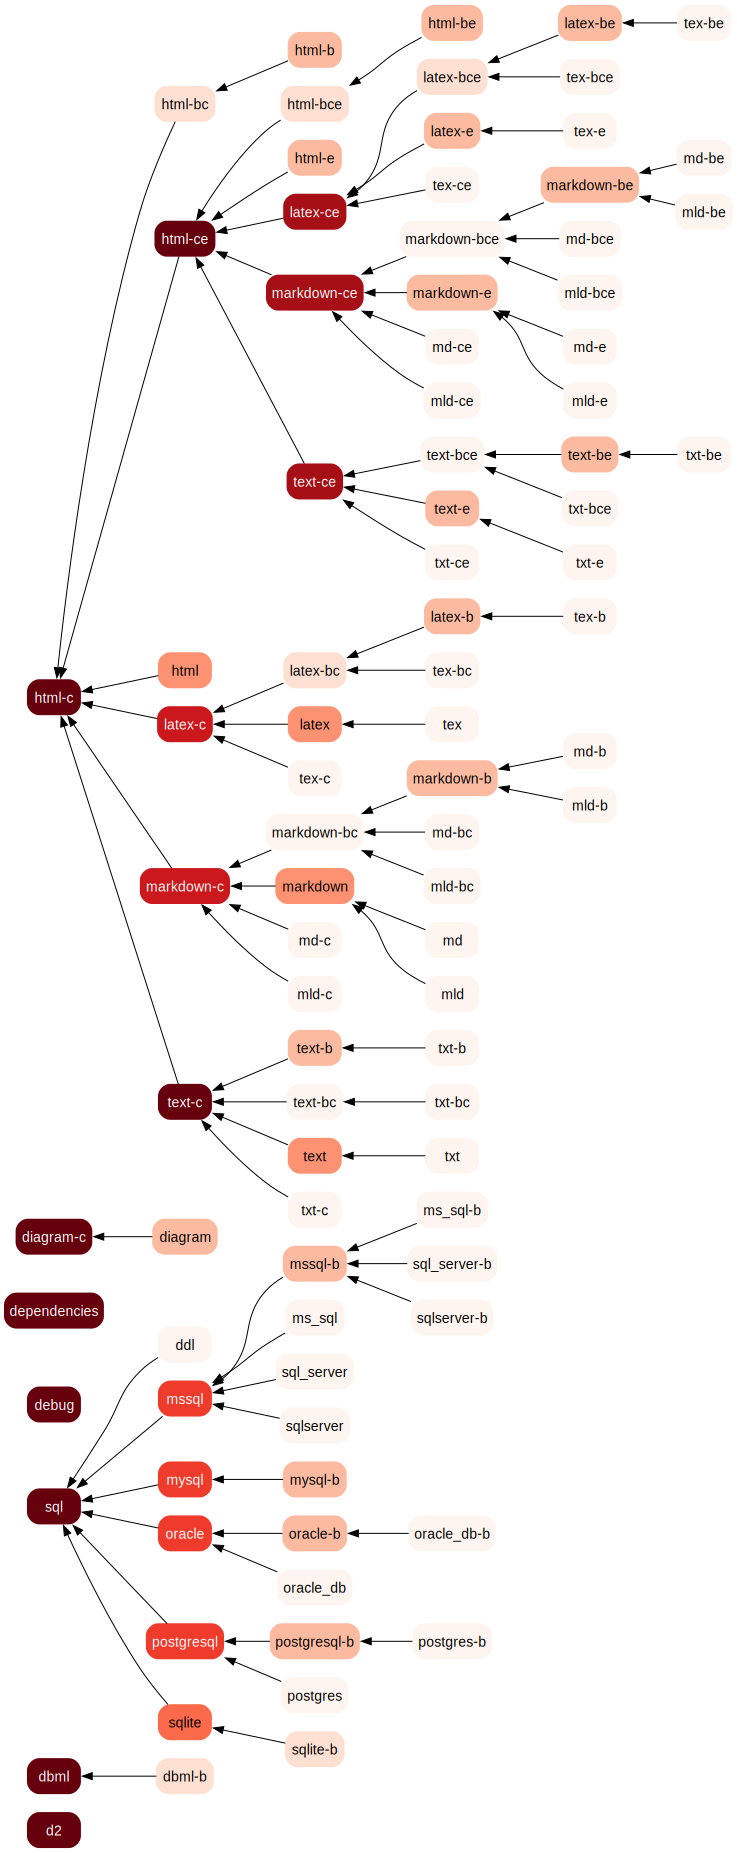

In [3]:
display.SVG("../../mocodo/resources/relation_templates/_graph.svg")

Les teintes les plus foncées correspondent approximativement aux gabarits les plus complexes. Les autres ne sont souvent que des alias, par exemple, `tex.yaml` renvoie directement à `latex.yaml` :

In [193]:
display.Code("../../mocodo/resources/relation_templates/tex.yaml")

parent: 'latex'

La clé `"parent"` donne le chemin ou le nom du gabarit dont on souhaite créer une version dérivée :

- une chaîne terminée par `.yaml` est interprétée comme un chemin ;
- sinon, comme le nom d'un gabarit de la distribution.

Tous les gabarits textuels (`text.yaml`, `latex.yaml`, `markdown.yaml`, `html.yaml` et leurs alias) dérivent des gabarits `html-c.yaml` (version avec affichage des contraintes) et `html-ce.yaml` (version avec affichage des contraintes et des explications).

Par exemple, le gabarit `latex` se borne à ajouter un message d'aide pour la ligne de commande et à empêcher l'ajout des contraintes d'unicité et d'optionalité :

In [194]:
display.Code("../../mocodo/resources/relation_templates/latex.yaml")

help_en: 'convert the conceptual model into a relational schema in LaTeX format'
help_fr: 'convertit le modèle conceptuel en un schéma relationnel au format LaTeX'
fr_examples:
  - order: 1
    example: 'latex'
    explanation: 'version de base'
  - order: 2
    example: 'latex:b'
    explanation: 'avec _boilerplate_'
  - order: 3
    example: 'latex:c'
    explanation: 'avec contraintes d''unicité et d''optionalité'
  - order: 4
    example: 'latex:e'
    explanation: 'avec explications'
  - order: 5
    example: 'latex:bce'
    explanation: 'avec _boilerplate_, contraintes et explications'
parent: 'latex-c'
add_unicity_constraints:
add_optionality_constraints:

Si maintenant on regarde le contenu de son parent `latex-c` :

In [195]:
display.Code("../../mocodo/resources/relation_templates/latex-c.yaml")

parent: 'html-c'
extension: 'tex'
highlight: 'latex'
column_separator: ', '
compose_relation: '  \item \relat{{{this_relation_name}}} ({columns})'
compose_relational_schema: '% Generated by Mocodo {version}\n\n\begin{{itemize}}\n{relations}\n\end{{itemize}}\n'
transform_relation:
  - order: 1000
    comment: 'Compose normal attributes'
    search: '<span class=''normal''>(.+?)</span>'
    replace: '\\attr{\1}'
  - order: 1100
    comment: 'Compose primary keys'
    search: '<span class=''primary''>(.+?)</span>'
    replace: '\\prim{\1}'
  - order: 1200
    comment: 'Compose foreign primary keys'
    search: '<span class=''foreign primary''>(.+?)</span>'
    replace: '\\foreign{\\prim{\1}}'
  - order: 1300
    comment: 'Compose foreign attributes'
    search: '<span class=''foreign''>(.+?)</span>'
    replace: '\\foreign{\1}'
  - order: 1400
    comment: 'Exponents'
    search: '(<sup>.*u)(\d)(.*</sup>)'
    replace: '\1_\2\3'
    iterated: true
  - order: 1500
    comment: 'Exponents'
    search: ' <sup>(.+?)</sup>'
    replace: '$^{\1}$'

... on voit que les opérations consistent simplement à modifier le séparateur de colonne, à composer les tables et le schéma relationnel complet avec un _boilerplate_, et enfin à remplacer les balises HTML par leur équivalent en  $\LaTeX$. Toute la logique complexe est traitée dans le gabarit `html-c`.

### Exemples de création de gabarit dérivé <a id="t_relation"></a>

Le gabarit SQL par défaut rend explicite la contrainte `NOT NULL` des clés primaires :

In [196]:
%%mocodo -t sql
PERSONNE: id. personne [VARCHAR(8)], nom [VARCHAR(255)]


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE PERSONNE (
  PRIMARY KEY (id_personne),
  id_personne VARCHAR(8) NOT NULL,
  nom         VARCHAR(255)
);

```

Supposons que cette redondance nous défrise, et voyons comment l'éliminer. Pour cela, examinons le contenu du gabarit `sql.yaml` :

![](examples/sql_template_1.png)

La contrainte d'optionalité `{optionality}` apparaît à côté de `PRIMARY KEY` en lignes 28 et 31. Nous pouvons donc simplement remplacer les valeurs associées à `compose_primary_key` et `compose_primary_foreign_key` par des copies supprimant cette mention :

In [197]:
%%file new_sql.yaml
parent: 'sql'
compose_primary_key: '{label} {datatype}\nPRIMARY KEY ({label})'
compose_primary_foreign_key: '{label} {datatype}\nPRIMARY KEY ({label})\nFOREIGN KEY ({label}) REFERENCES {outer_source} ({non_disambiguated_label})'

Overwriting new_sql.yaml


Pour tester ce nouveau gabarit, nous devons ajouter la sous-option `-t relation` avec en sous-argument le chemin complet du fichier créé :

In [198]:
%mocodo -i sandbox -t relation:new_sql.yaml


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE PERSONNE (
  PRIMARY KEY (id_personne),
  id_personne VARCHAR(8),
  nom         VARCHAR(255)
);

```

Mission accomplie !

Nous aurions pu procéder autrement. Reprenons le gabarit original :
    
![](examples/sql_template_2.png)

Le dictionnaire `transform_relation` spécifie une séquence de réécritures à appliquer à chacune des clauses `CREATE TABLE` (composées ligne 37). La première accumule toutes les lignes contenant `PRIMARY KEY` en fin de table (où elles seront concaténées avant d'être ramenées au début). Nous devons donc intervenir _avant_ que `NOT NULL` ne soit séparé de `PRIMARY KEY`. Pour cela, définissons un gabarit qui se borne à **insérer** avant cette transformation (de numéro d'ordre 100) une suppression des `NOT NULL` incriminés :

In [199]:
%%file new_sql.yaml
parent: 'sql'
transform_relation:
  - order: 50
    comment: 'Suppress PK NN redundancy.'
    search: ' NOT NULL\nPRIMARY KEY'
    replace: '\nPRIMARY KEY'

Overwriting new_sql.yaml


Le résultat est le même :

In [200]:
%mocodo -i sandbox -t relation:new_sql.yaml


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
CREATE TABLE PERSONNE (
  PRIMARY KEY (id_personne),
  id_personne VARCHAR(8),
  nom         VARCHAR(255)
);

```

### Mécanisme de mise à jour

Le mécanisme de mise à jour des clés dépend de la scalarité de leur valeur associée.

**Cas scalaire.**

Pour les valeurs scalaires (chaînes, nombres, booléens, `null`), selon la présence d'une entrée donnée dans le gabarit enfant et/ou le gabarit parent, l'association clé-valeur correspondante sera créée, mise à jour ou conservée :

| enfant | parent | résultat     |
|--------|--------|--------------|
| oui    | non    | création     |
| oui    | oui    | mise à jour  |
| non    | oui    | conservation |

Il n'y a pas de moyen de supprimer une association clé-valeur, mais étant donné que toutes celles qui sont absentes se voient substituer une association par défaut, il est équivalent de spécifier explicitement la valeur-défaut.

**Cas non scalaire.**

Dans les gabarits de relations de Mocodo, une seule catégorie de valeur non scalaire est possible : la liste de dictionnaires. Dans l'exemple précédent, c'est le cas de `transform_relation`.

Une clé `"order"` est systématiquement présente dans chacun des dictionnaires de la liste. Selon la présence d'un dictionnaire de numéro d'ordre donné dans le gabarit enfant et/ou le gabarit parent, ce dictionnaire sera inséré, supprimé, mis à jour ou conservé :

| enfant | parent | résultat     |
|--------|--------|--------------|
| oui    | non    | insertion    |
| oui    | oui    | s'il y a une seule clé : suppression<br> s'il y a plusieurs clés : [mise à jour](https://docs.python.org/3/library/stdtypes.html#dict.update) |
| non    | oui    | conservation |

**Nouveauté de la version 4.0.** Si une clé d'un gabarit enfant est associée à une liste vide, cette association remplace l'éventuelle association existante.

**Remarque.** Les numéros d'ordre utilisés dans les dictionnaires sont des multiples de 100. Si vous voulez créer des gabarits dérivés, évitez par précaution les multiples de 10 : cela augmentera les chances que votre gabarit survive à une mise à jour de l'un de ses ancêtres. Vous pouvez aussi partir d'une copie de ceux-ci, sachant que vous renoncez alors aux bénéfices de leurs éventuelles mises à jour.

# Annexe C : Crédits

- **Auteur**
  - Aristide Grange, Université de Lorraine, Metz, [LCOMS](http://lcoms.univ-lorraine.fr).
- **Administration système**
  - Cyril Minette.
- **Outils**
  - Aspect visuel
    - [Color Brewer](http://colorbrewer2.org) (Cynthia Brewer).
    - [Real Favicon Generator](http://realfavicongenerator.net) (Philippe Bernard).
    - [reset.css](http://meyerweb.com/eric/tools/css/reset/) (Eric Meyer).
  - JavaScript
    - [JQuery](http://jquery.com/) (John Resig).
    - [JS-Cookie](https://github.com/js-cookie/js-cookie) (Klaus Hartl).
    - [Ace Editor](https://ace.c9.io) ([Cloud9 IDE](https://c9.io/) et [Mozilla](https://mozilla.org/)).
  - Python
    - [Distance de Damerau-Levenshtein](http://mwh.geek.nz/2009/04/26/python-damerau-levenshtein-distance/) (Michael Homer).
    - [Lark Parser](https://github.com/lark-parser/lark) (Erez Shinan).
    - [CairoSVG](https://cairosvg.org) ([CourtBouillon](https://www.courtbouillon.org)).
    - [Pyperclip](https://github.com/asweigart/pyperclip) (Al Sweigart).
  - Services de rendu
    - [Kroki.io](https://kroki.io) (Guillaume Grossetie).
    - [QR Code Generator](https://goqr.me/api/) (Foundata GmbH).
- **Divers**
  - [Modern SQL](https://modern-sql.com) (Markus Winand).
  - [DBML](https://dbml.dbdiagram.io/home/) ([Holistics](https://www.holistics.io)).
  - [D2](https://d2lang.com) ([Terrastruct](https://terrastruct.com))